In [1]:
from geoband.API import *
import folium
import json
import geopandas as gpd
import pandas as pd
from folium import plugins
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
import pyecharts
from urllib.request import urlopen
import plotly.express as px
import pydeck as pdk

In [ ]:
GetCompasData('SBJ_2102_001', '1', '1.세종시_전유부.csv')
GetCompasData('SBJ_2102_001', '2', '2.세종시_표제부.csv')
GetCompasData('SBJ_2102_001', '3', '3.세종시_아파트(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '4', '4.세종시_연립다세대(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '5', '5.세종시_단독다가구(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '6', '6.세종시_오피스텔(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '7', '7.세종시_아파트(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '8', '8.세종시_연립다세대(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '9', '9.세종시_단독다가구(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '10', '10.세종시_오피스텔(전월세)_실거래가.csv')
GetCompasData('SBJ_2102_001', '11', '11.세종시_상업업무용(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '12', '12.세종시_토지(매매)_실거래가.csv')
GetCompasData('SBJ_2102_001', '13', '13.세종시_분양권_실거래가.csv')
GetCompasData('SBJ_2102_001', '14', '14.세종시_상권정보.csv')
GetCompasData('SBJ_2102_001', '15', '15.세종시_상권정보_업종코드.csv')
GetCompasData('SBJ_2102_001', '16', '16.세종시_사업체_매출정보.geojson')
GetCompasData('SBJ_2102_001', '17', '17.세종시_사업체_매출정보.csv')
GetCompasData('SBJ_2102_001', '18', '18.세종시_개별공시지가(2017~2020).csv')
GetCompasData('SBJ_2102_001', '19', '19.세종시_연령별_거주인구정보_격자.geojson')
GetCompasData('SBJ_2102_001', '20', '20.세종시_전입자수.csv')
GetCompasData('SBJ_2102_001', '21', '21.세종시_전출자수.csv')
GetCompasData('SBJ_2102_001', '22', '22.세종시_연령별_인구현황.csv')
GetCompasData('SBJ_2102_001', '23', '23.세종시_도로명주소_건물.geojson')
GetCompasData('SBJ_2102_001', '24', '24.세종시_건축물연면적_격자.geojson')
GetCompasData('SBJ_2102_001', '25', '25.세종시_가구_월평균_소비지출액.csv')
GetCompasData('SBJ_2102_001', '26', '26.세종시_거주기간.csv')
GetCompasData('SBJ_2102_001', '27', '27.세종시_월평균_가구소득.csv')
GetCompasData('SBJ_2102_001', '28', '28.세종시_지역별_세대원수별_세대수.csv')
GetCompasData('SBJ_2102_001', '29', '29.세종시_거주의사(향후).csv')
GetCompasData('SBJ_2102_001', '30', '30.세종시_법정경계(시군구).geojson')
GetCompasData('SBJ_2102_001', '31', '31.세종시_법정경계(읍면동).geojson')
GetCompasData('SBJ_2102_001', '32', '32.세종시_행정경계(읍면동).geojson')
GetCompasData('SBJ_2102_001', '33', '33.세종시_지적도.geojson')
GetCompasData('SBJ_2102_001', '34', '34.세종시_건물분포_이미지.zip')
GetCompasData('SBJ_2102_001', '35', '35.코드정의서.xlsx')

In [2]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

## 전입전출

### 전입

In [4]:
전입자수=pd.read_csv('20.세종시_전입자수.csv')
전입자수['년월']=전입자수['년월'].astype('str')
전입자수

년월  전입자수 세종전입행정동   전출시   전출시군구   전출읍면동
0       201701     1    조치원읍   강원도     강릉시     교1동
1       201701     6    조치원읍   강원도     동해시     천곡동
2       201701    14    조치원읍   강원도     속초시      교동
3       201701    21    조치원읍   강원도     양양군      서면
4       201701     2    조치원읍   강원도     원주시     원인동
...        ...   ...     ...   ...     ...     ...
108077  202101     3     다정동  충청북도  청주시흥덕구    복대1동
108078  202101    56     다정동  충청북도  청주시흥덕구     오송읍
108079  202101    32     다정동  충청북도  청주시흥덕구     옥산면
108080  202101     8     다정동  충청북도     충주시  교현·안림동
108081  202101     9     다정동  충청북도     충주시    중앙탑면

[108082 rows x 6 columns]

In [5]:
전입자수_조치원읍=전입자수[전입자수['세종전입행정동']=='조치원읍']
전입자수_조치원읍

년월  전입자수 세종전입행정동   전출시   전출시군구    전출읍면동
0       201701     1    조치원읍   강원도     강릉시      교1동
1       201701     6    조치원읍   강원도     동해시      천곡동
2       201701    14    조치원읍   강원도     속초시       교동
3       201701    21    조치원읍   강원도     양양군       서면
4       201701     2    조치원읍   강원도     원주시      원인동
...        ...   ...     ...   ...     ...      ...
105888  202101     5    조치원읍  충청북도  청주시흥덕구     복대1동
105889  202101     1    조치원읍  충청북도  청주시흥덕구     봉명1동
105890  202101     4    조치원읍  충청북도  청주시흥덕구  봉명2·송정동
105891  202101   266    조치원읍  충청북도  청주시흥덕구      오송읍
105892  202101     6    조치원읍  충청북도  청주시흥덕구   운천·신봉동

[11749 rows x 6 columns]

In [6]:
전입자수_조치원읍=전입자수_조치원읍.groupby(['년월','전출시'],as_index=False).sum()[['년월','전출시','전입자수']]

In [7]:
전입자수_조치원읍_세종시제외=전입자수_조치원읍[전입자수_조치원읍['전출시']!='세종특별자치시']

In [8]:
전입자수_전출시=전입자수_조치원읍.groupby(['전출시'],as_index=False).sum().sort_values(by=['전입자수'], axis=0,ascending=False)

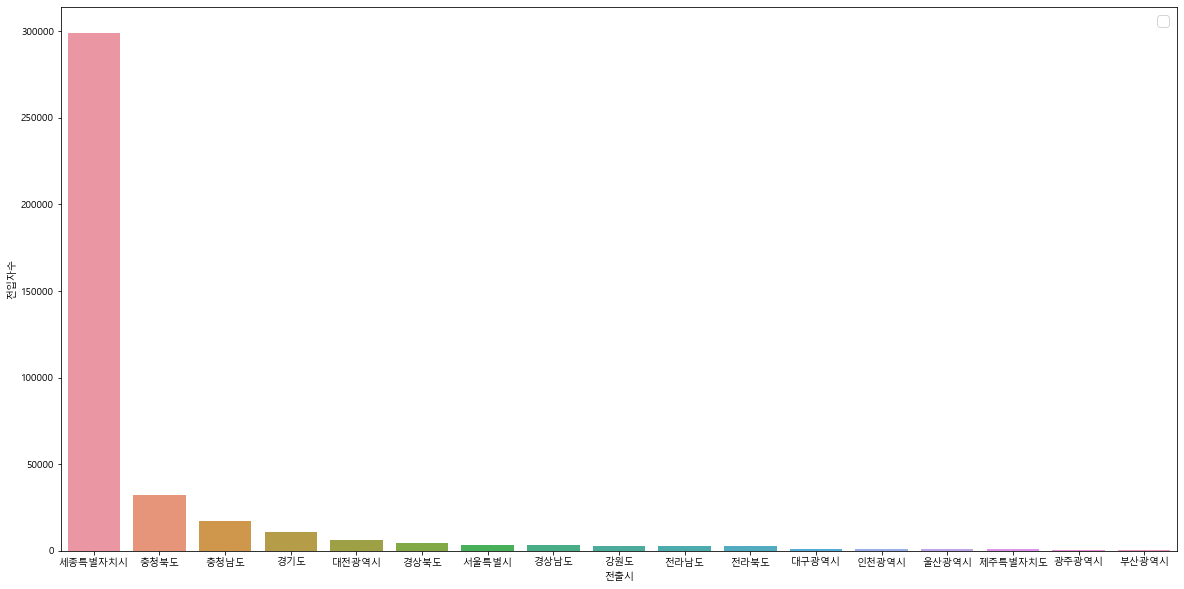

In [9]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="전출시", y="전입자수",
                   data=전입자수_전출시)

plt.legend(fontsize=15, loc='best')

In [10]:
전입자수_전출시_세종시제외=전입자수_전출시[전입자수_전출시['전출시']!='세종특별자치시'].sort_values(by=['전입자수'], axis=0,ascending=False)

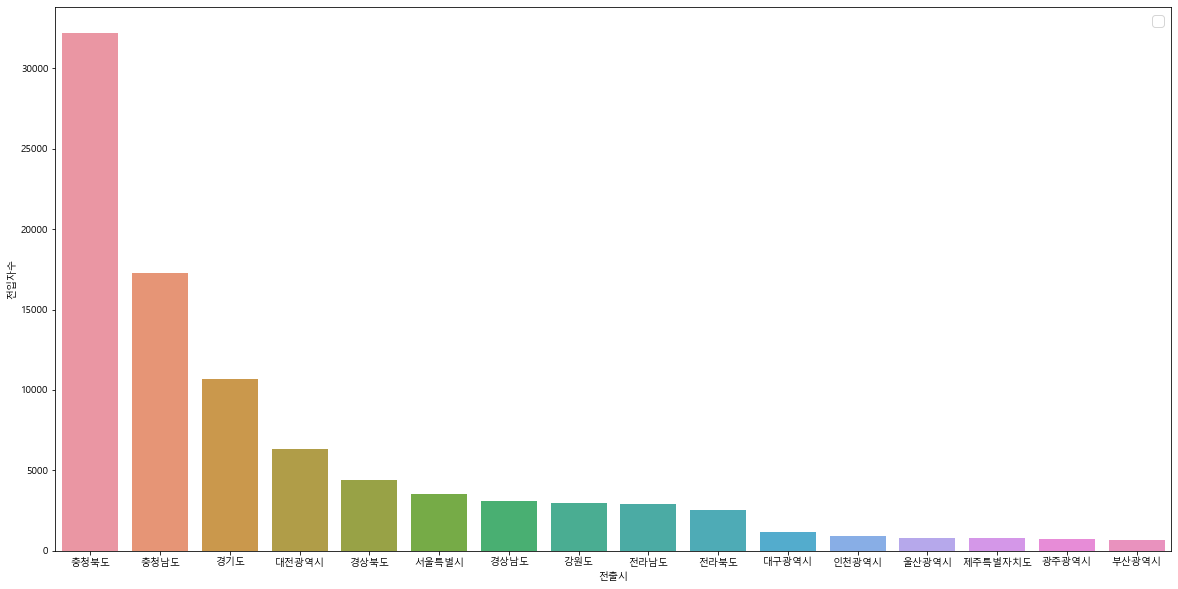

In [11]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="전출시", y="전입자수",
                   data=전입자수_전출시_세종시제외)

plt.legend(fontsize=15, loc='best')

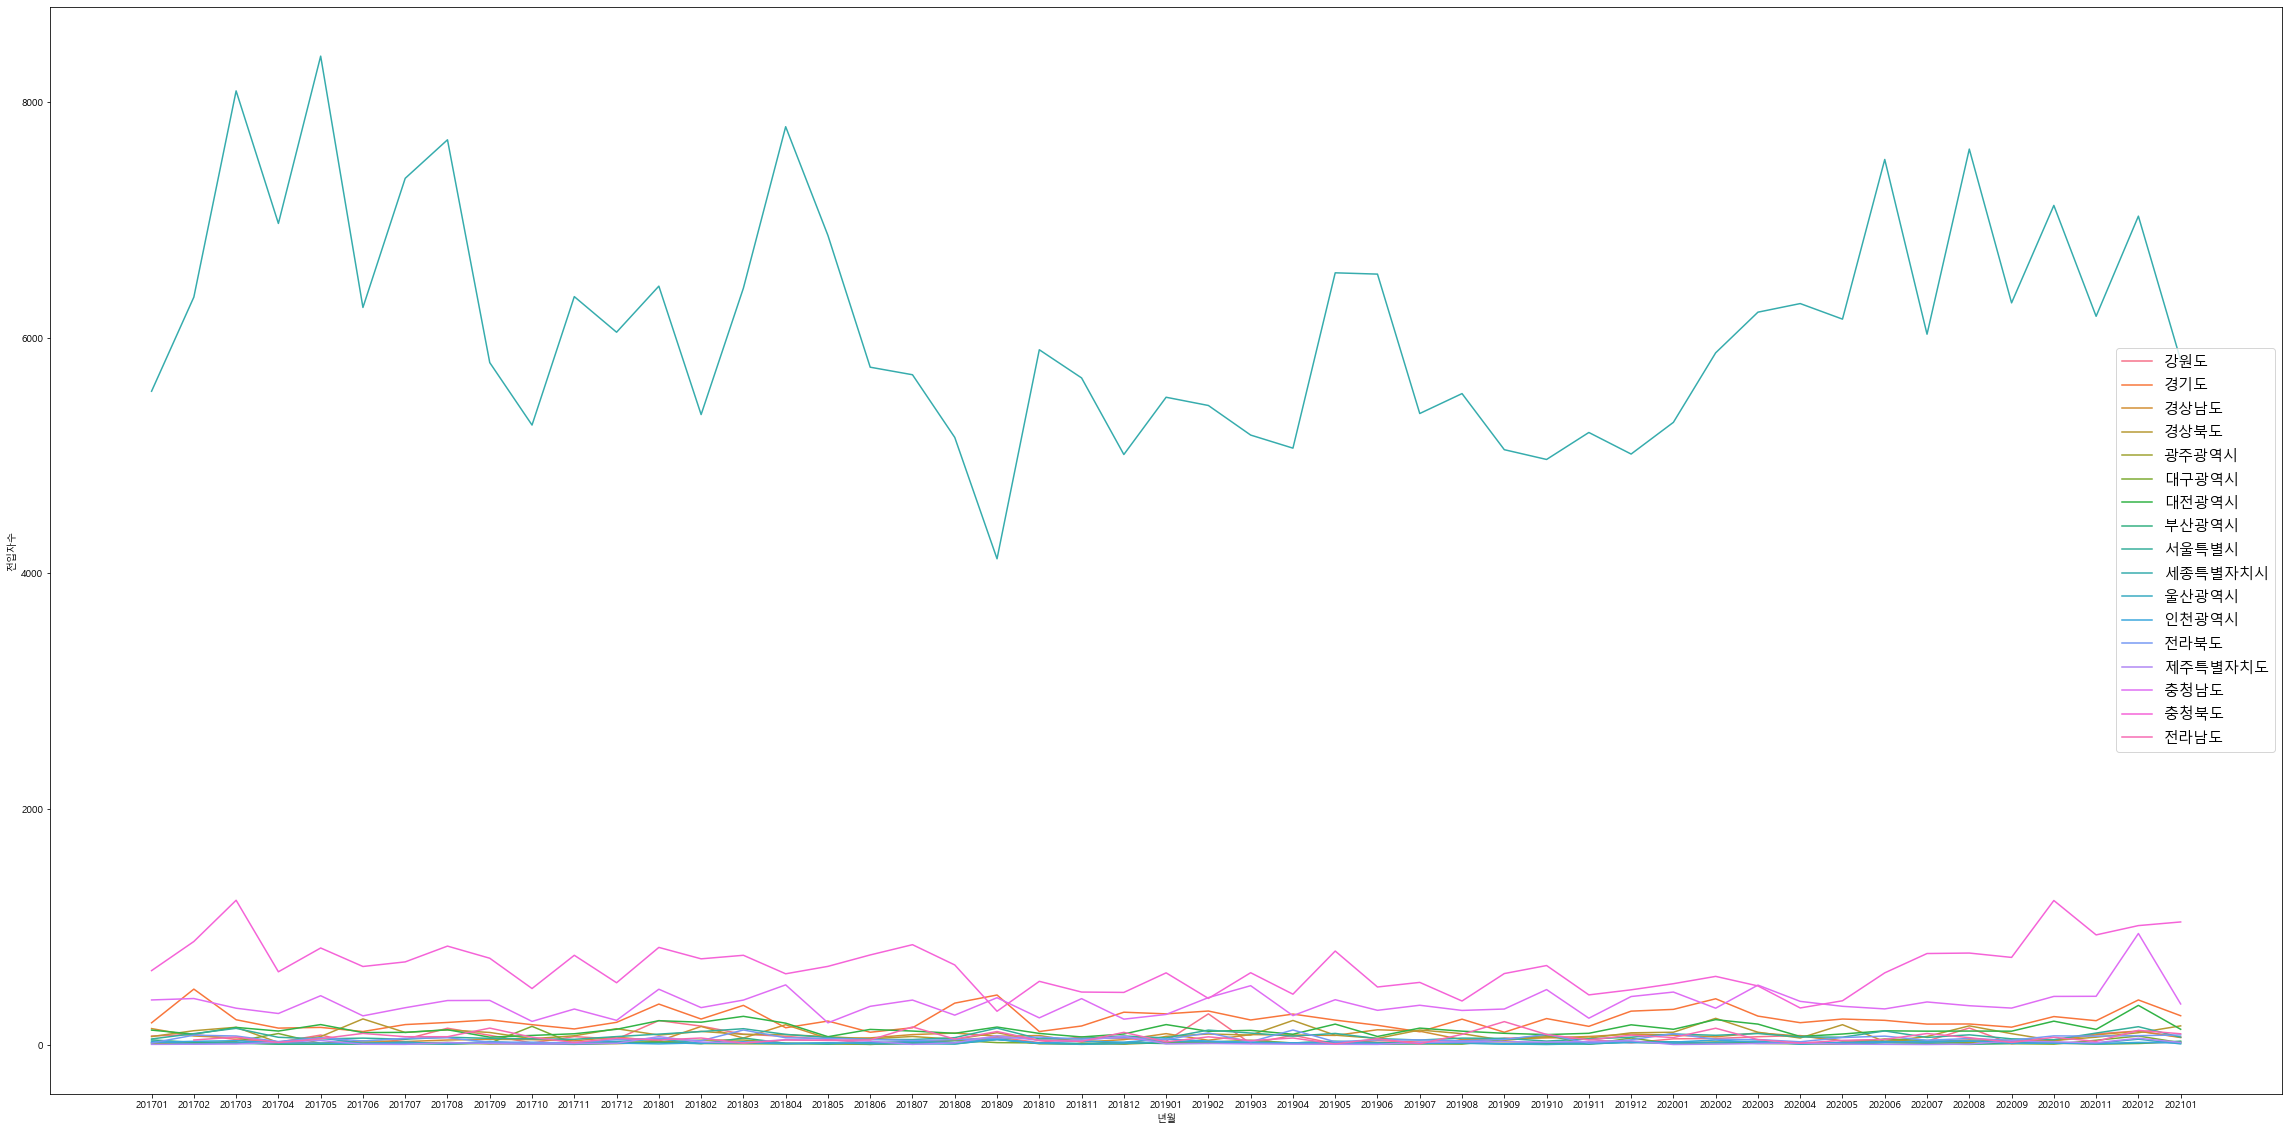

In [12]:
plt.figure(figsize=(40,20))
ax = sns.lineplot(x="년월", y="전입자수",
                  hue="전출시", data=전입자수_조치원읍)

plt.legend(fontsize=15, loc='best')

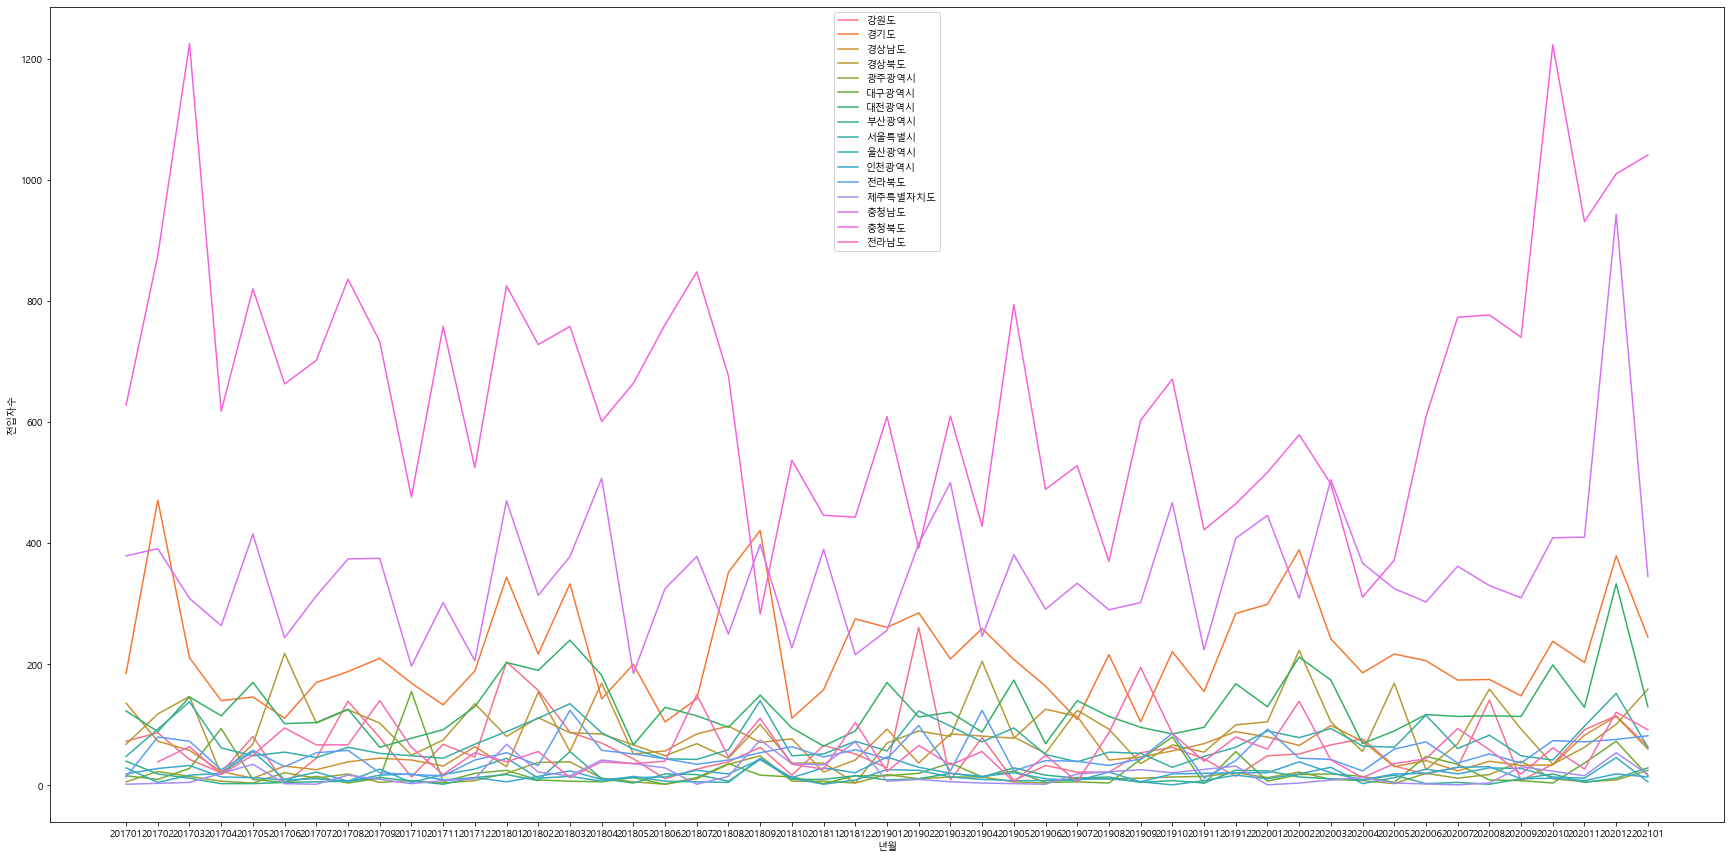

In [13]:
plt.figure(figsize=(30,15))
ax = sns.lineplot(x="년월", y="전입자수",
                  hue="전출시", data=전입자수_조치원읍_세종시제외)

plt.legend(fontsize=10, loc='best')

In [14]:
전입자수_월별수=전입자수_조치원읍.groupby(['년월'],as_index=False).sum()
전입자수_월별수['구분']='전입'
전입자수_월별수['수']=전입자수_월별수['전입자수']
전입자수_월별수

년월   전입자수  구분      수
0   201701   7311  전입   7311
1   201702   8745  전입   8745
2   201703  10618  전입  10618
3   201704   8412  전입   8412
4   201705  10379  전입  10379
5   201706   7863  전입   7863
6   201707   9050  전입   9050
7   201708   9755  전입   9755
8   201709   7684  전입   7684
9   201710   6604  전입   6604
10  201711   7934  전입   7934
11  201712   7598  전입   7598
12  201801   8959  전입   8959
13  201802   7523  전입   7523
14  201803   8789  전입   8789
15  201804   9819  전입   9819
16  201805   8381  전입   8381
17  201806   7387  전입   7387
18  201807   7653  전입   7653
19  201808   6974  전입   6974
20  201809   6186  전입   6186
21  201810   7238  전입   7238
22  201811   7053  전입   7053
23  201812   6504  전입   6504
24  201901   7229  전입   7229
25  201902   7396  전입   7396
26  201903   7055  전입   7055
27  201904   6690  전입   6690
28  201905   8486  전입   8486
29  201906   7953  전입   7953
30  201907   6880  전입   6880
31  201908   6909  전입   6909
32  201909   6676  전입   6676
33  201910   6942  전입   6942
34  201911   6410  전입   6410
35  201912   6897  전입   6897
36  202001   7227  전입   7227
37  202002   8080  전입   8080
38  202003   8185  전입   8185
39  202004   7587  전입   7587
40  202005   7613  전입   7613
41  202006   9183  전입   9183
42  202007   7869  전입   7869
43  202008   9624  전입   9624
44  202009   7975  전입   7975
45  202010   9533  전입   9533
46  202011   8373  전입   8373
47  202012  10588  전입  10588
48  202101   8198  전입   8198

### 전출

In [15]:
전출자수=pd.read_csv('21.세종시_전출자수.csv')
전출자수['년월']=전출자수['년월'].astype('str')
전출자수

년월  전출자수 세종전출행정동   전입시    전입시군구  전입읍면동
0      201701     3    조치원읍   강원도      원주시    단계동
1      201701     9    조치원읍   강원도      춘천시   신사우동
2      201701    13    조치원읍   강원도      홍천군     서면
3      201701     3    조치원읍   경기도  고양시 덕양구    행주동
4      201701     1    조치원읍   경기도  고양시 덕양구   화정1동
...       ...   ...     ...   ...      ...    ...
80987  202101    22     다정동  충청북도      옥천군    옥천읍
80988  202101     2     다정동  충청북도   청주시상당구   용암1동
80989  202101    35     다정동  충청북도   청주시청원구    오창읍
80990  202101    13     다정동  충청북도   청주시흥덕구  강서제1동
80991  202101    84     다정동  충청북도   청주시흥덕구    오송읍

[80992 rows x 6 columns]

In [16]:
전출자수_조치원읍=전출자수[전출자수['세종전출행정동']=='조치원읍']
전출자수_조치원읍

년월  전출자수 세종전출행정동   전입시    전입시군구   전입읍면동
0      201701     3    조치원읍   강원도      원주시     단계동
1      201701     9    조치원읍   강원도      춘천시    신사우동
2      201701    13    조치원읍   강원도      홍천군      서면
3      201701     3    조치원읍   경기도  고양시 덕양구     행주동
4      201701     1    조치원읍   경기도  고양시 덕양구    화정1동
...       ...   ...     ...   ...      ...     ...
79361  202101     2    조치원읍  충청북도   청주시흥덕구  운천·신봉동
79362  202101    13    조치원읍  충청북도      충주시    대소원면
79363  202101     5    조치원읍  충청북도      충주시     산척면
79364  202101     2    조치원읍  충청북도      충주시     지현동
79365  202101     2    조치원읍  충청북도      충주시   호암·직동

[10494 rows x 6 columns]

In [17]:
전출자수_조치원읍=전출자수_조치원읍.groupby(['년월','전입시'],as_index=False).sum()[['년월','전입시','전출자수']]

In [18]:
전출자수_조치원읍_세종시제외=전출자수_조치원읍[전출자수_조치원읍['전입시']!='세종특별자치시']

In [19]:
전출자수_전입시=전출자수_조치원읍.groupby(['전입시'],as_index=False).sum().sort_values(by=['전출자수'], axis=0,ascending=False)

In [20]:
전출자수_전입시_세종시제외=전출자수_전입시[전출자수_전입시['전입시']!='세종특별자치시'].sort_values(by=['전출자수'], axis=0,ascending=False)

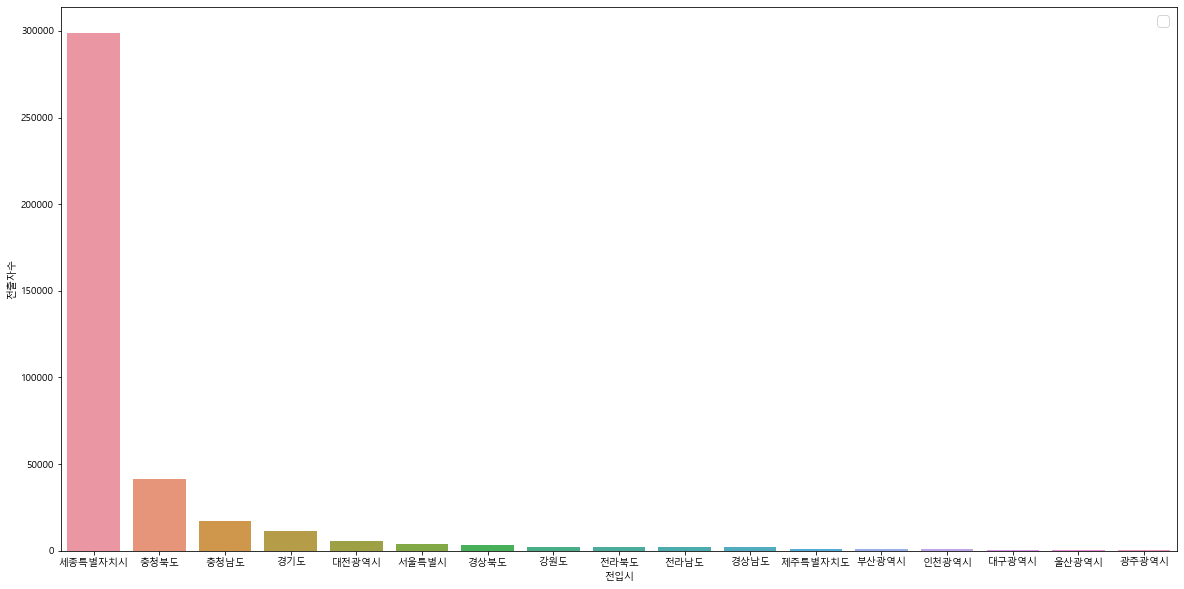

In [21]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="전입시", y="전출자수",
                   data=전출자수_전입시)

plt.legend(fontsize=15, loc='best')

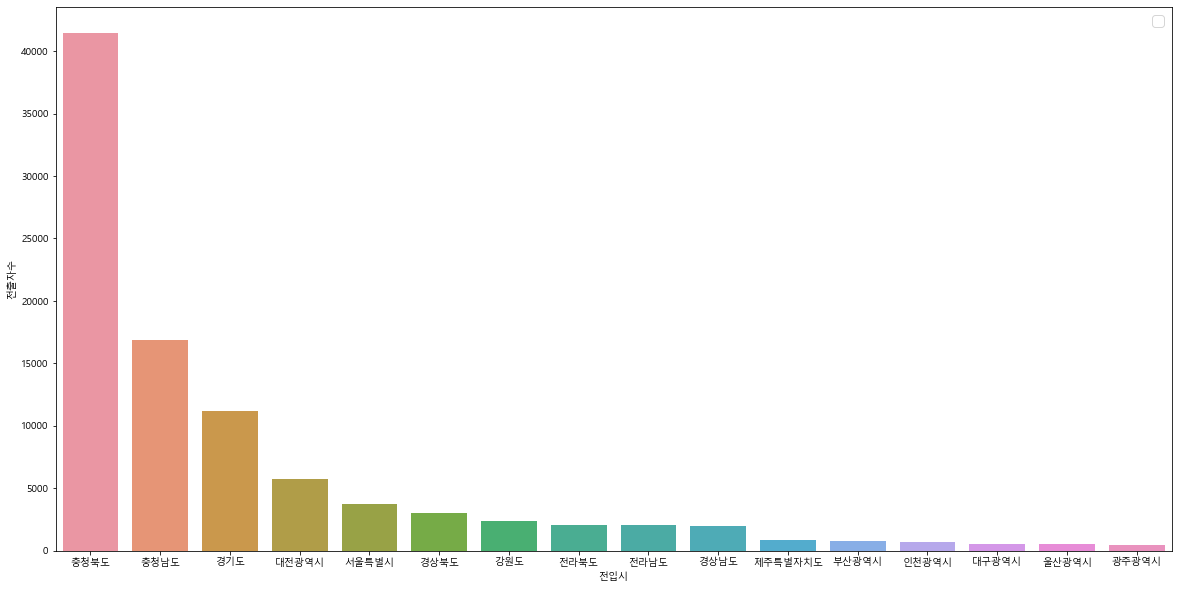

In [22]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="전입시", y="전출자수",
                   data=전출자수_전입시_세종시제외)

plt.legend(fontsize=15, loc='best')

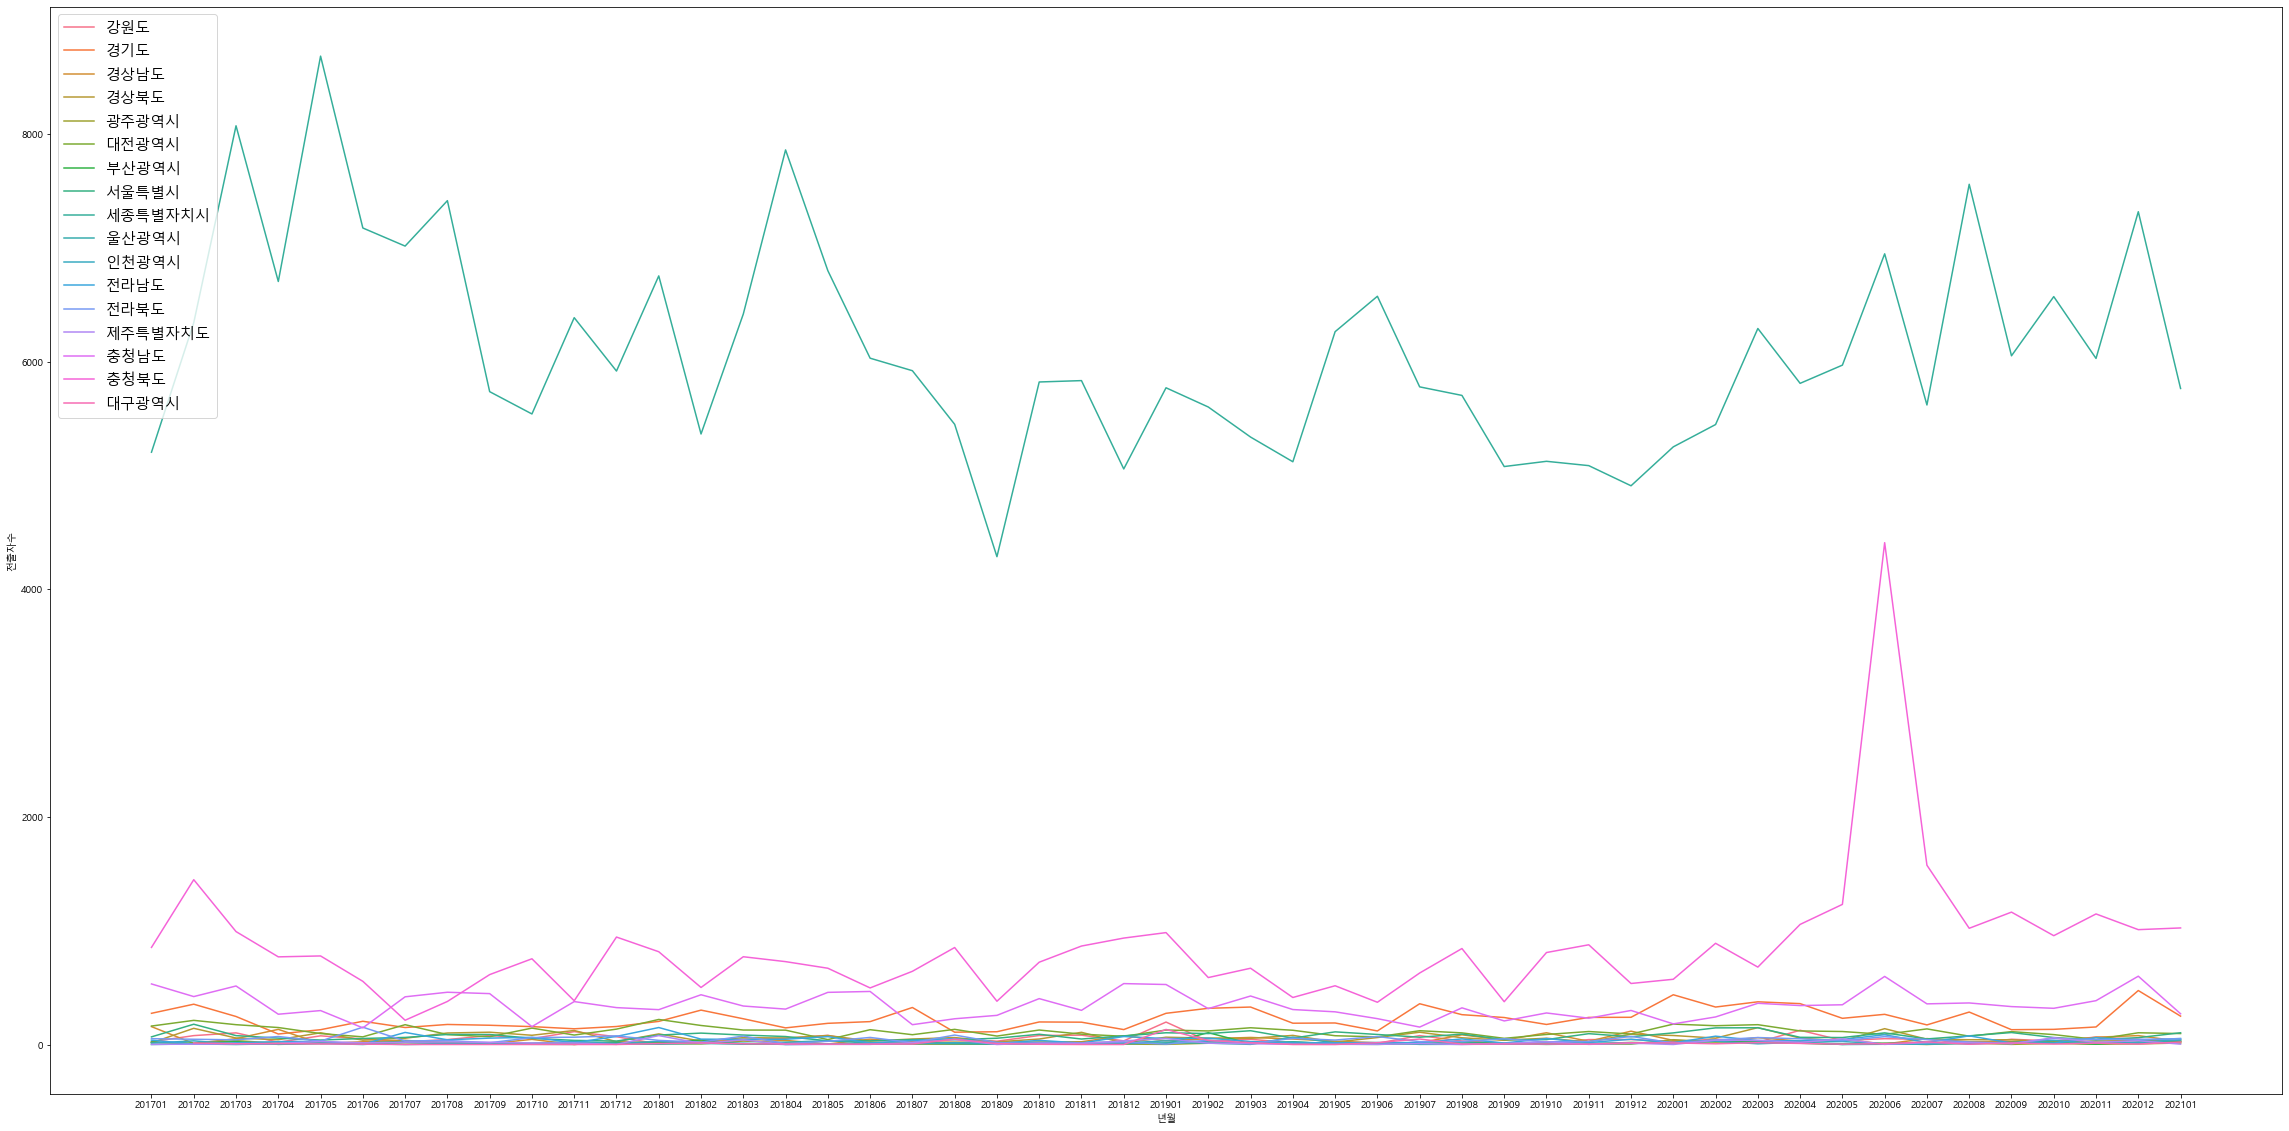

In [23]:
plt.figure(figsize=(40,20))
ax = sns.lineplot(x="년월", y="전출자수",
                  hue="전입시", data=전출자수_조치원읍)

plt.legend(fontsize=15, loc='best')

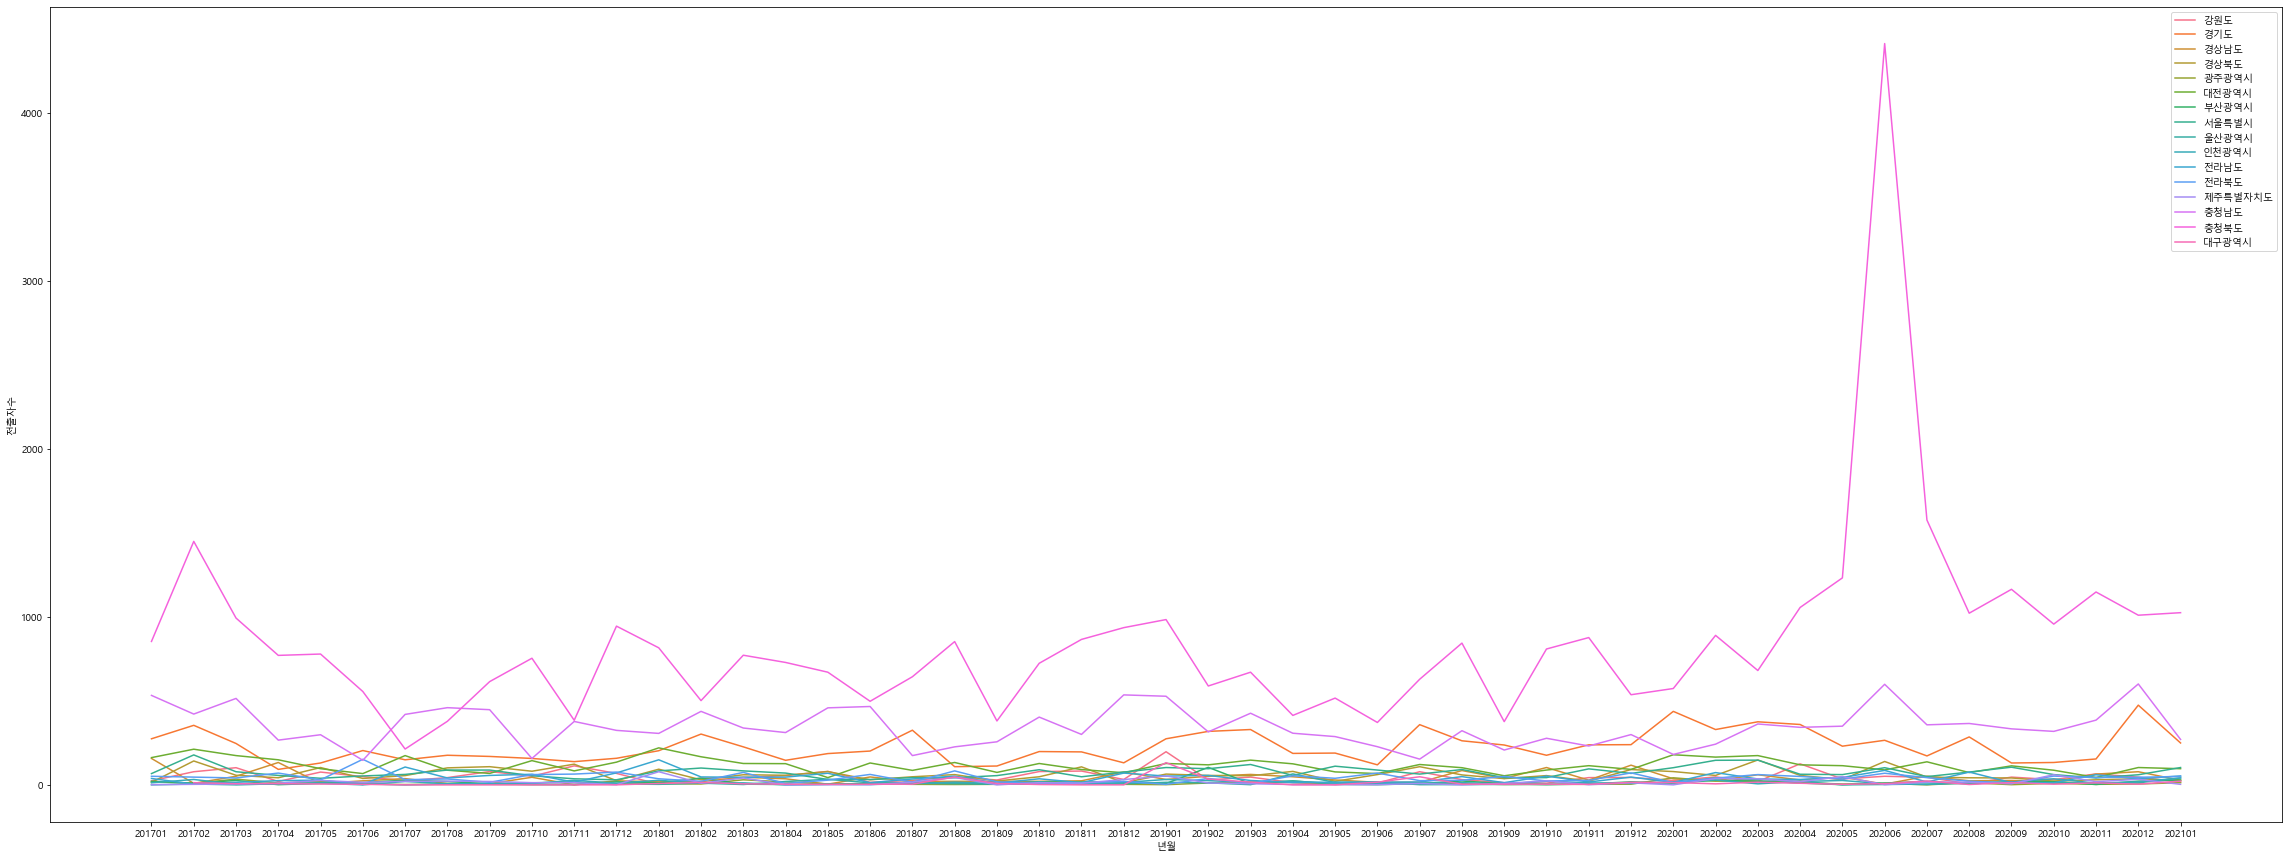

In [24]:
plt.figure(figsize=(40,15))
ax = sns.lineplot(x="년월", y="전출자수",
                  hue="전입시", data=전출자수_조치원읍_세종시제외)

plt.legend(fontsize=10, loc='best')

In [25]:
전출자수_월별수=전출자수_조치원읍.groupby(['년월'],as_index=False).sum()
전출자수_월별수['구분']='전출'
전출자수_월별수['수']=전출자수_월별수['전출자수']
전출자수_월별수

년월   전출자수  구분      수
0   201701   7446  전출   7446
1   201702   9272  전출   9272
2   201703  10434  전출  10434
3   201704   8376  전출   8376
4   201705  10370  전출  10370
5   201706   8515  전출   8515
6   201707   8373  전출   8373
7   201708   8903  전출   8903
8   201709   7447  전출   7447
9   201710   7147  전출   7147
10  201711   7794  전출   7794
11  201712   7828  전출   7828
12  201801   8832  전출   8832
13  201802   7134  전출   7134
14  201803   8342  전출   8342
15  201804   9485  전출   9485
16  201805   8513  전출   8513
17  201806   7559  전출   7559
18  201807   7398  전출   7398
19  201808   7209  전출   7209
20  201809   5286  전출   5286
21  201810   7624  전출   7624
22  201811   7629  전출   7629
23  201812   7077  전출   7077
24  201901   8390  전출   8390
25  201902   7482  전출   7482
26  201903   7297  전출   7297
27  201904   6561  전출   6561
28  201905   7602  전출   7602
29  201906   7690  전출   7690
30  201907   7445  전출   7445
31  201908   7638  전출   7638
32  201909   6184  전출   6184
33  201910   6832  전출   6832
34  201911   6823  전출   6823
35  201912   6599  전출   6599
36  202001   7005  전출   7005
37  202002   7639  전출   7639
38  202003   8504  전출   8504
39  202004   8139  전출   8139
40  202005   8245  전출   8245
41  202006  12812  전출  12812
42  202007   8189  전출   8189
43  202008   9625  전출   9625
44  202009   8117  전출   8117
45  202010   8407  전출   8407
46  202011   8124  전출   8124
47  202012   9915  전출   9915
48  202101   7844  전출   7844

### 전입전출 비교

In [26]:
통합_월별=pd.concat([전입자수_월별수,전출자수_월별수],axis=0).reset_index()
통합_월별

index      년월     전입자수  구분      수    전출자수
0       0  201701   7311.0  전입   7311     NaN
1       1  201702   8745.0  전입   8745     NaN
2       2  201703  10618.0  전입  10618     NaN
3       3  201704   8412.0  전입   8412     NaN
4       4  201705  10379.0  전입  10379     NaN
..    ...     ...      ...  ..    ...     ...
93     44  202009      NaN  전출   8117  8117.0
94     45  202010      NaN  전출   8407  8407.0
95     46  202011      NaN  전출   8124  8124.0
96     47  202012      NaN  전출   9915  9915.0
97     48  202101      NaN  전출   7844  7844.0

[98 rows x 6 columns]

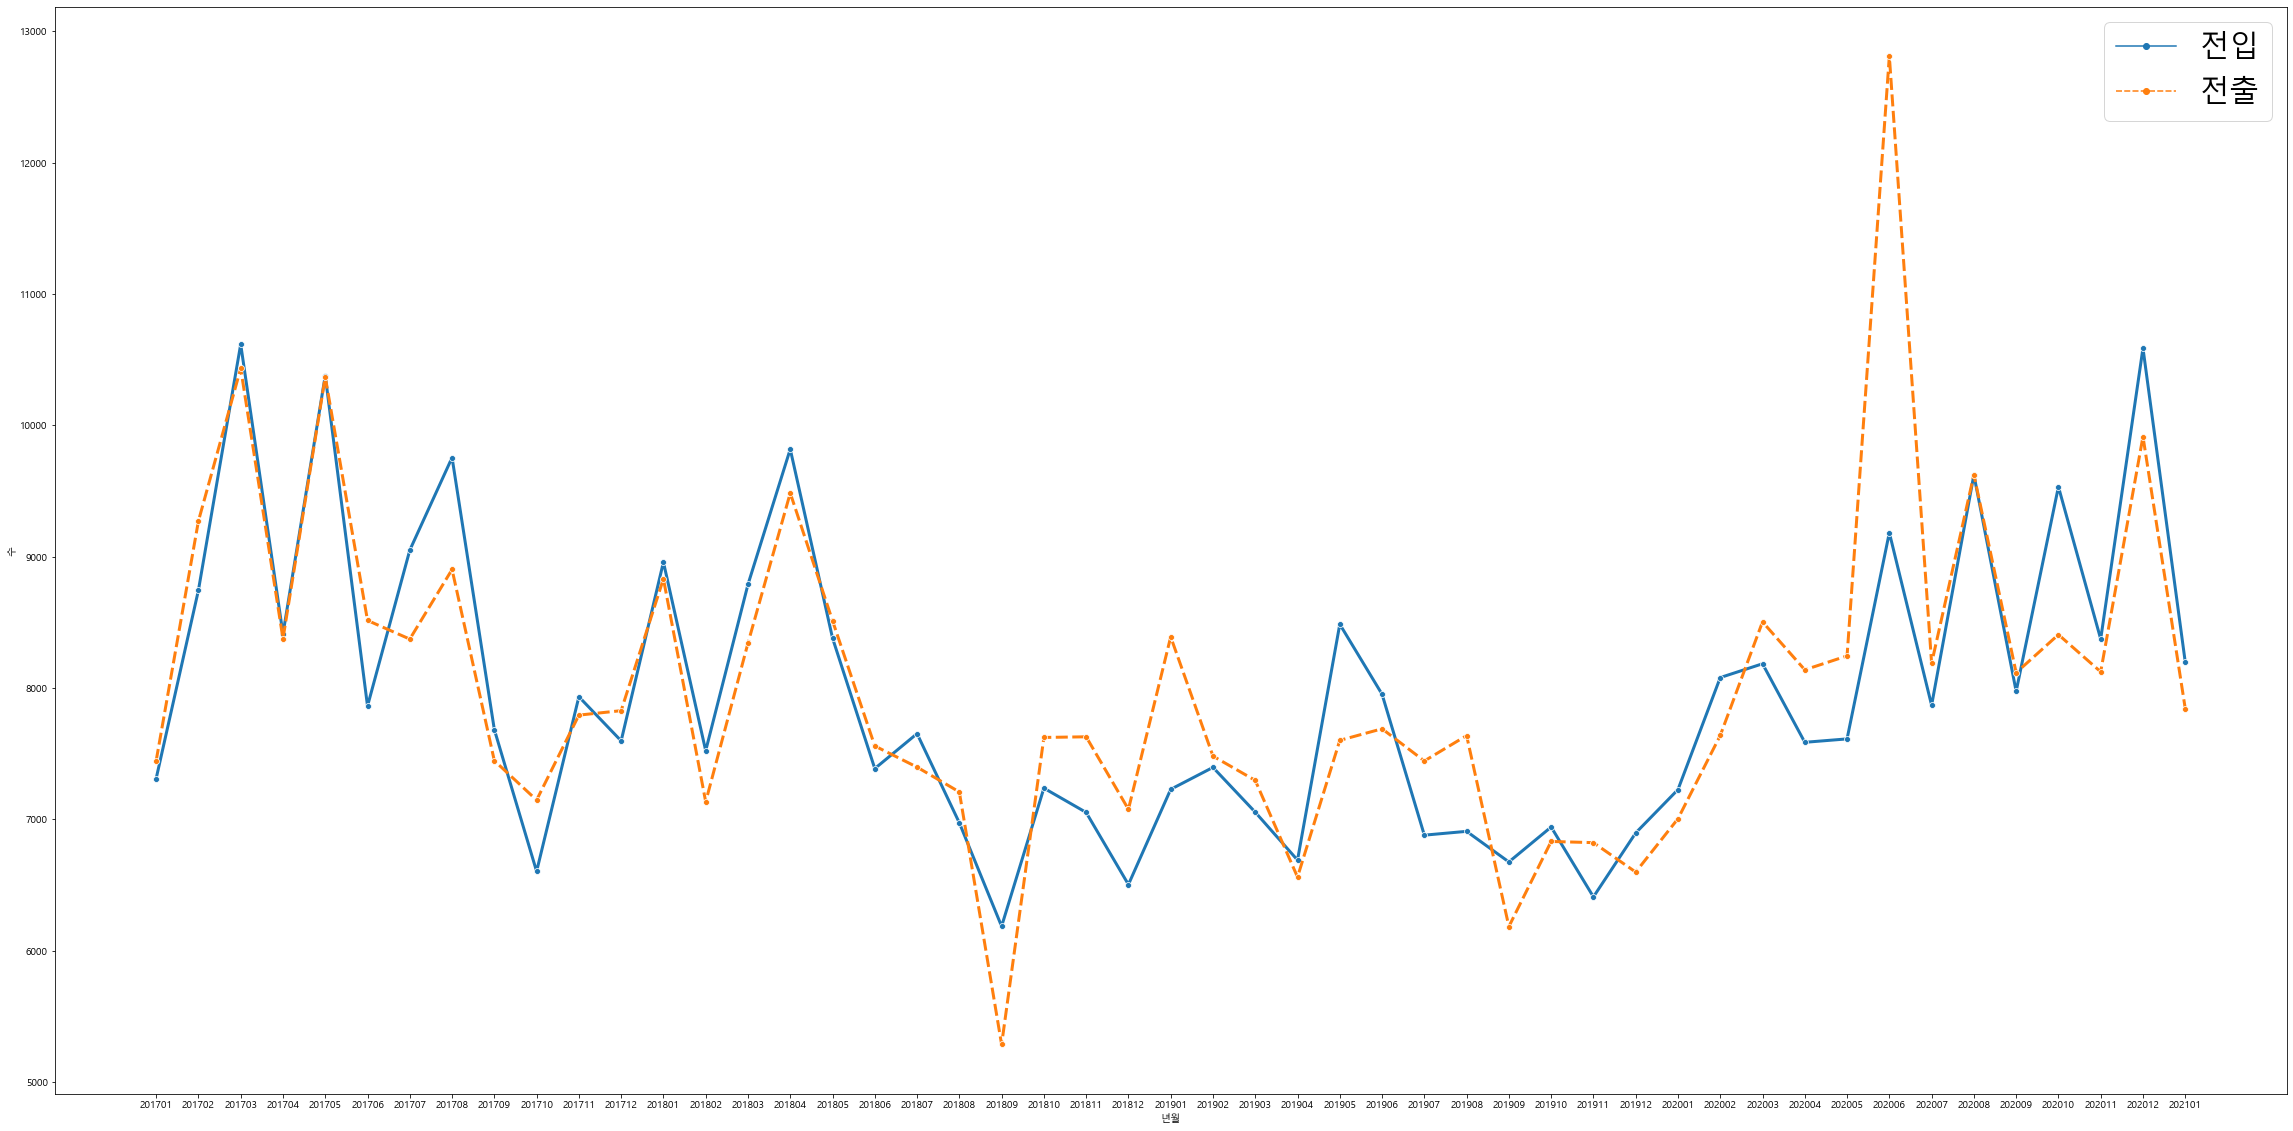

In [27]:
plt.figure(figsize=(40,20))
ax = sns.lineplot(x="년월", y="수", style='구분', markers=["o", "o"], linewidth='3',
                  hue="구분", data=통합_월별)

plt.legend(fontsize=30, loc='best')

#### 2020 5,6,7,8 월 사이 전출자수 급증한 것을 확인 할 수 있음

## 인구

### 조치원읍

In [3]:
인구=pd.read_csv('22.세종시_연령별_인구현황.csv')
조치원읍_인구=인구[인구['읍면동']== '조치원읍']
조치원읍_인구

읍면동  201701_남자(총_거주자_수)  201701_남자(연령구간인구수)  201701_남자(0~9세)  \
1  조치원읍               23529               23529             2525   

   201701_남자(10~19세)  201701_남자(20~29세)  201701_남자(30~39세)  201701_남자(40~49세)  \
1               2473               3461               3783               4126   

   201701_남자(50~59세)  201701_남자(60~69세)  ...  202012_여자(10~19세)  \
1               3393               2131  ...               2050   

   202012_여자(20~29세)  202012_여자(30~39세)  202012_여자(40~49세)  202012_여자(50~59세)  \
1               2811               2436               3186               3110   

   202012_여자(60~69세)  202012_여자(70~79세)  202012_여자(80~89세)  202012_여자(90~99세)  \
1               2676               1725                930                162   

   202012_여자(100세_이상)  
1                   7  

[1 rows x 1249 columns]

In [4]:
조치원읍_인구=조치원읍_인구.T.reset_index()
조치원읍_인구

index      1
0                    읍면동   조치원읍
1     201701_남자(총_거주자_수)  23529
2     201701_남자(연령구간인구수)  23529
3        201701_남자(0~9세)   2525
4      201701_남자(10~19세)   2473
...                  ...    ...
1244   202012_여자(60~69세)   2676
1245   202012_여자(70~79세)   1725
1246   202012_여자(80~89세)    930
1247   202012_여자(90~99세)    162
1248  202012_여자(100세_이상)      7

[1249 rows x 2 columns]

In [5]:
조치원읍_인구=조치원읍_인구.drop(조치원읍_인구.index[0])
조치원읍_인구

index      1
1     201701_남자(총_거주자_수)  23529
2     201701_남자(연령구간인구수)  23529
3        201701_남자(0~9세)   2525
4      201701_남자(10~19세)   2473
5      201701_남자(20~29세)   3461
...                  ...    ...
1244   202012_여자(60~69세)   2676
1245   202012_여자(70~79세)   1725
1246   202012_여자(80~89세)    930
1247   202012_여자(90~99세)    162
1248  202012_여자(100세_이상)      7

[1248 rows x 2 columns]

In [6]:
name_split = 조치원읍_인구["index"].str.split("_")
조치원읍_인구["기준년월"] = name_split.str.get(0)
조치원읍_인구["성별_연령대"] = name_split.str.get(1)
조치원읍_인구['인구수']=조치원읍_인구[1]
조치원읍_인구

index      1    기준년월       성별_연령대    인구수
1     201701_남자(총_거주자_수)  23529  201701         남자(총  23529
2     201701_남자(연령구간인구수)  23529  201701  남자(연령구간인구수)  23529
3        201701_남자(0~9세)   2525  201701     남자(0~9세)   2525
4      201701_남자(10~19세)   2473  201701   남자(10~19세)   2473
5      201701_남자(20~29세)   3461  201701   남자(20~29세)   3461
...                  ...    ...     ...          ...    ...
1244   202012_여자(60~69세)   2676  202012   여자(60~69세)   2676
1245   202012_여자(70~79세)   1725  202012   여자(70~79세)   1725
1246   202012_여자(80~89세)    930  202012   여자(80~89세)    930
1247   202012_여자(90~99세)    162  202012   여자(90~99세)    162
1248  202012_여자(100세_이상)      7  202012      여자(100세      7

[1248 rows x 5 columns]

In [7]:
조치원읍_총인구_월별=조치원읍_인구[조치원읍_인구['index'].str.contains('연령구간인구수')] 
조치원읍_총인구_월별['기준년월']==조치원읍_총인구_월별['기준년월'].astype('str')
조치원읍_총인구_월별

index      1    기준년월       성별_연령대    인구수
2     201701_남자(연령구간인구수)  23529  201701  남자(연령구간인구수)  23529
15    201701_여자(연령구간인구수)  22496  201701  여자(연령구간인구수)  22496
28    201702_남자(연령구간인구수)  23526  201702  남자(연령구간인구수)  23526
41    201702_여자(연령구간인구수)  22495  201702  여자(연령구간인구수)  22495
54    201703_남자(연령구간인구수)  23534  201703  남자(연령구간인구수)  23534
...                  ...    ...     ...          ...    ...
1185  202010_여자(연령구간인구수)  20681  202010  여자(연령구간인구수)  20681
1198  202011_남자(연령구간인구수)  22071  202011  남자(연령구간인구수)  22071
1211  202011_여자(연령구간인구수)  20649  202011  여자(연령구간인구수)  20649
1224  202012_남자(연령구간인구수)  22136  202012  남자(연령구간인구수)  22136
1237  202012_여자(연령구간인구수)  20653  202012  여자(연령구간인구수)  20653

[96 rows x 5 columns]

In [8]:
조치원읍_여자인구=조치원읍_총인구_월별[조치원읍_총인구_월별['성별_연령대'].str.contains('여자')] 

In [9]:
총인구_월별=조치원읍_총인구_월별.groupby(['기준년월'],as_index=False).sum()[['기준년월','인구수']]

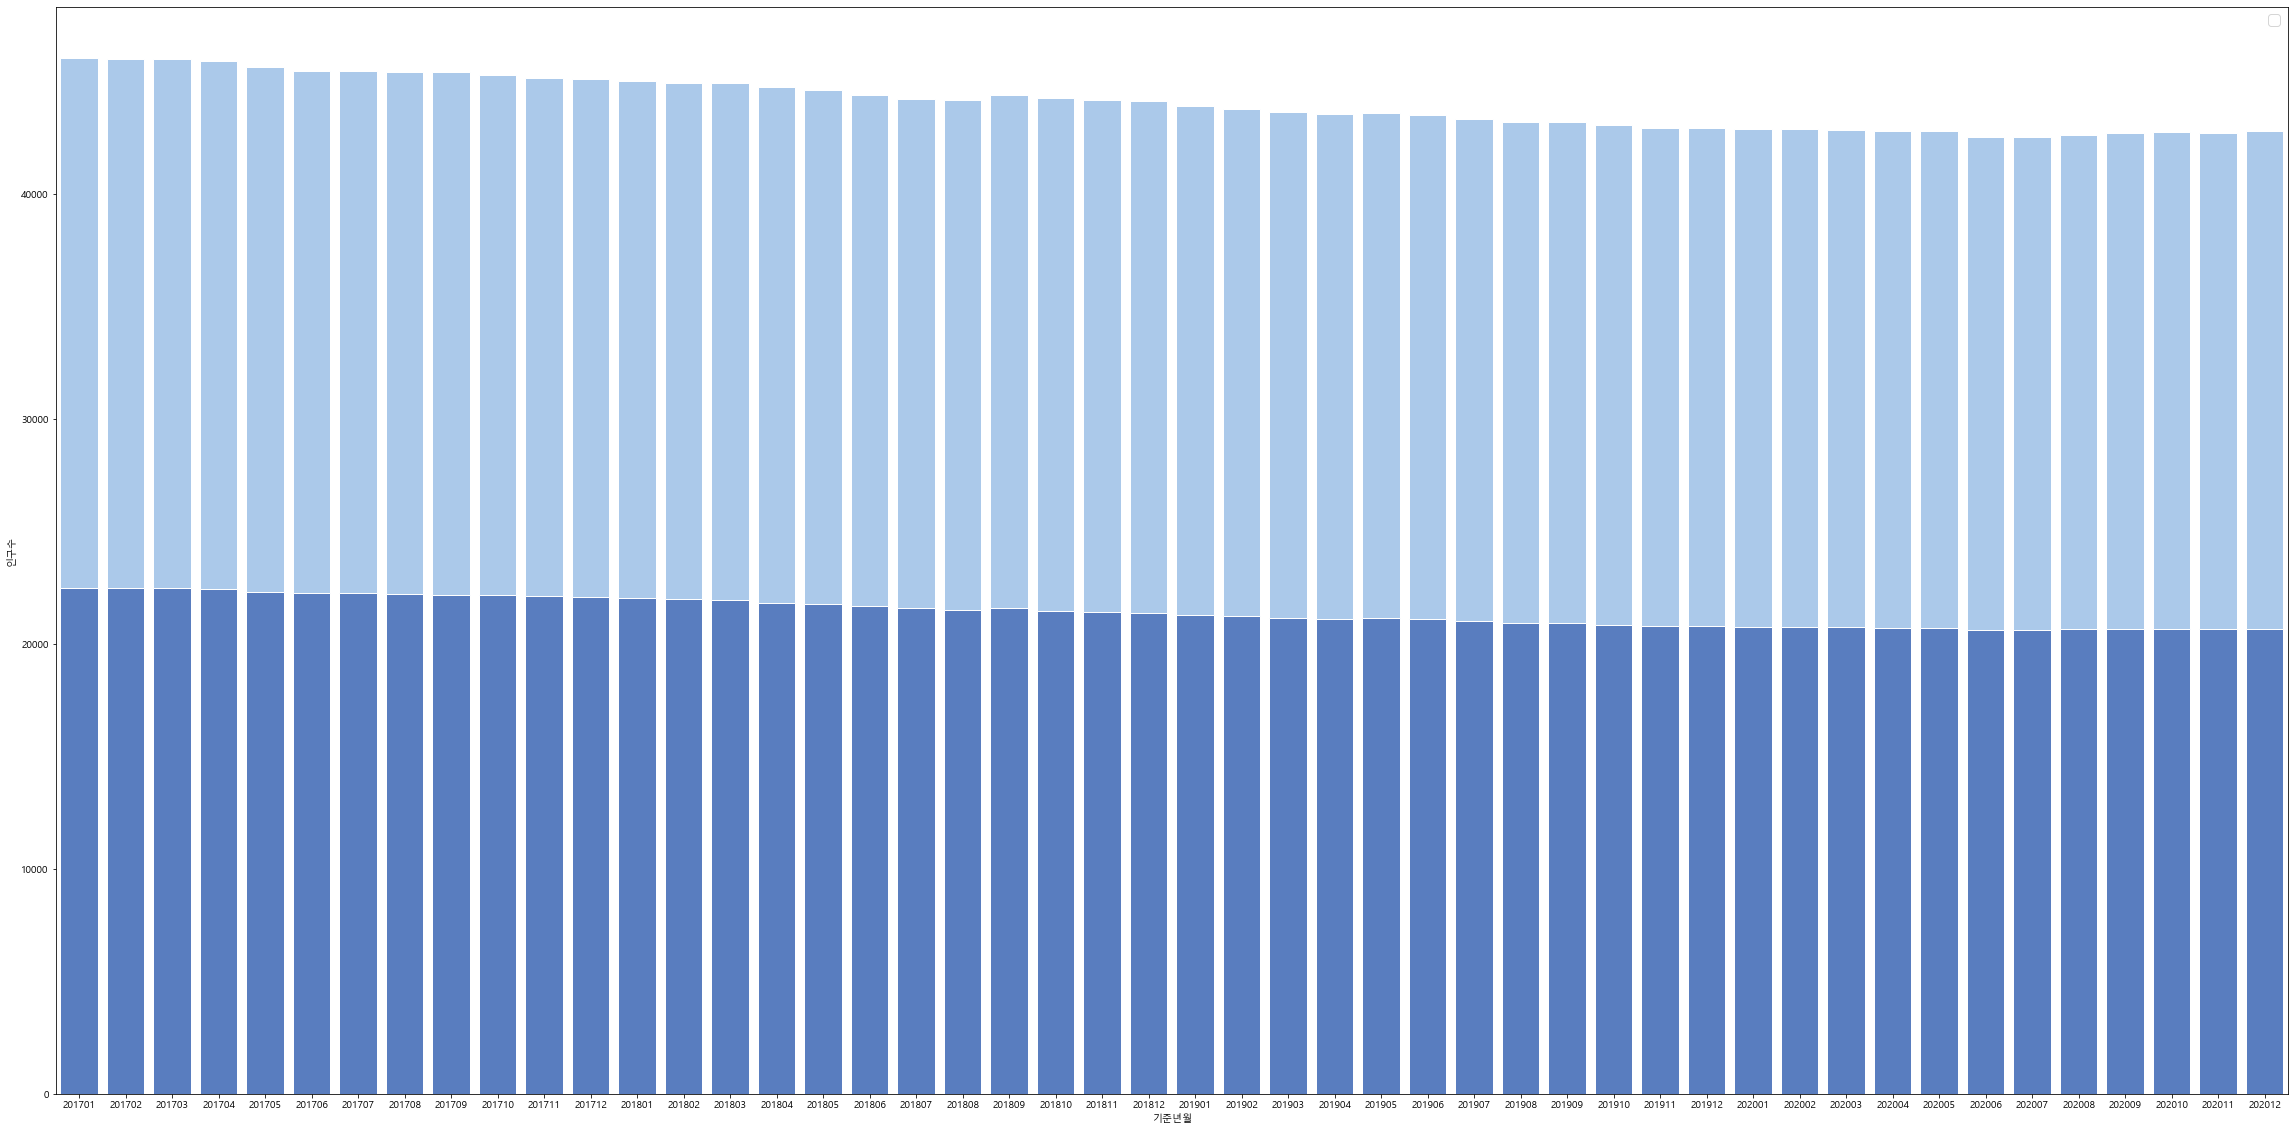

In [10]:
plt.figure(figsize=(40,20))

sns.set_color_codes('pastel')
sns.barplot(x = '기준년월', y = '인구수', data = 총인구_월별,
             color = 'b', edgecolor = 'w')

sns.set_color_codes('muted')
sns.barplot(x = '기준년월', y = '인구수', data = 조치원읍_여자인구,
             color = 'b', edgecolor = 'w')

plt.legend(fontsize=15, loc='best')

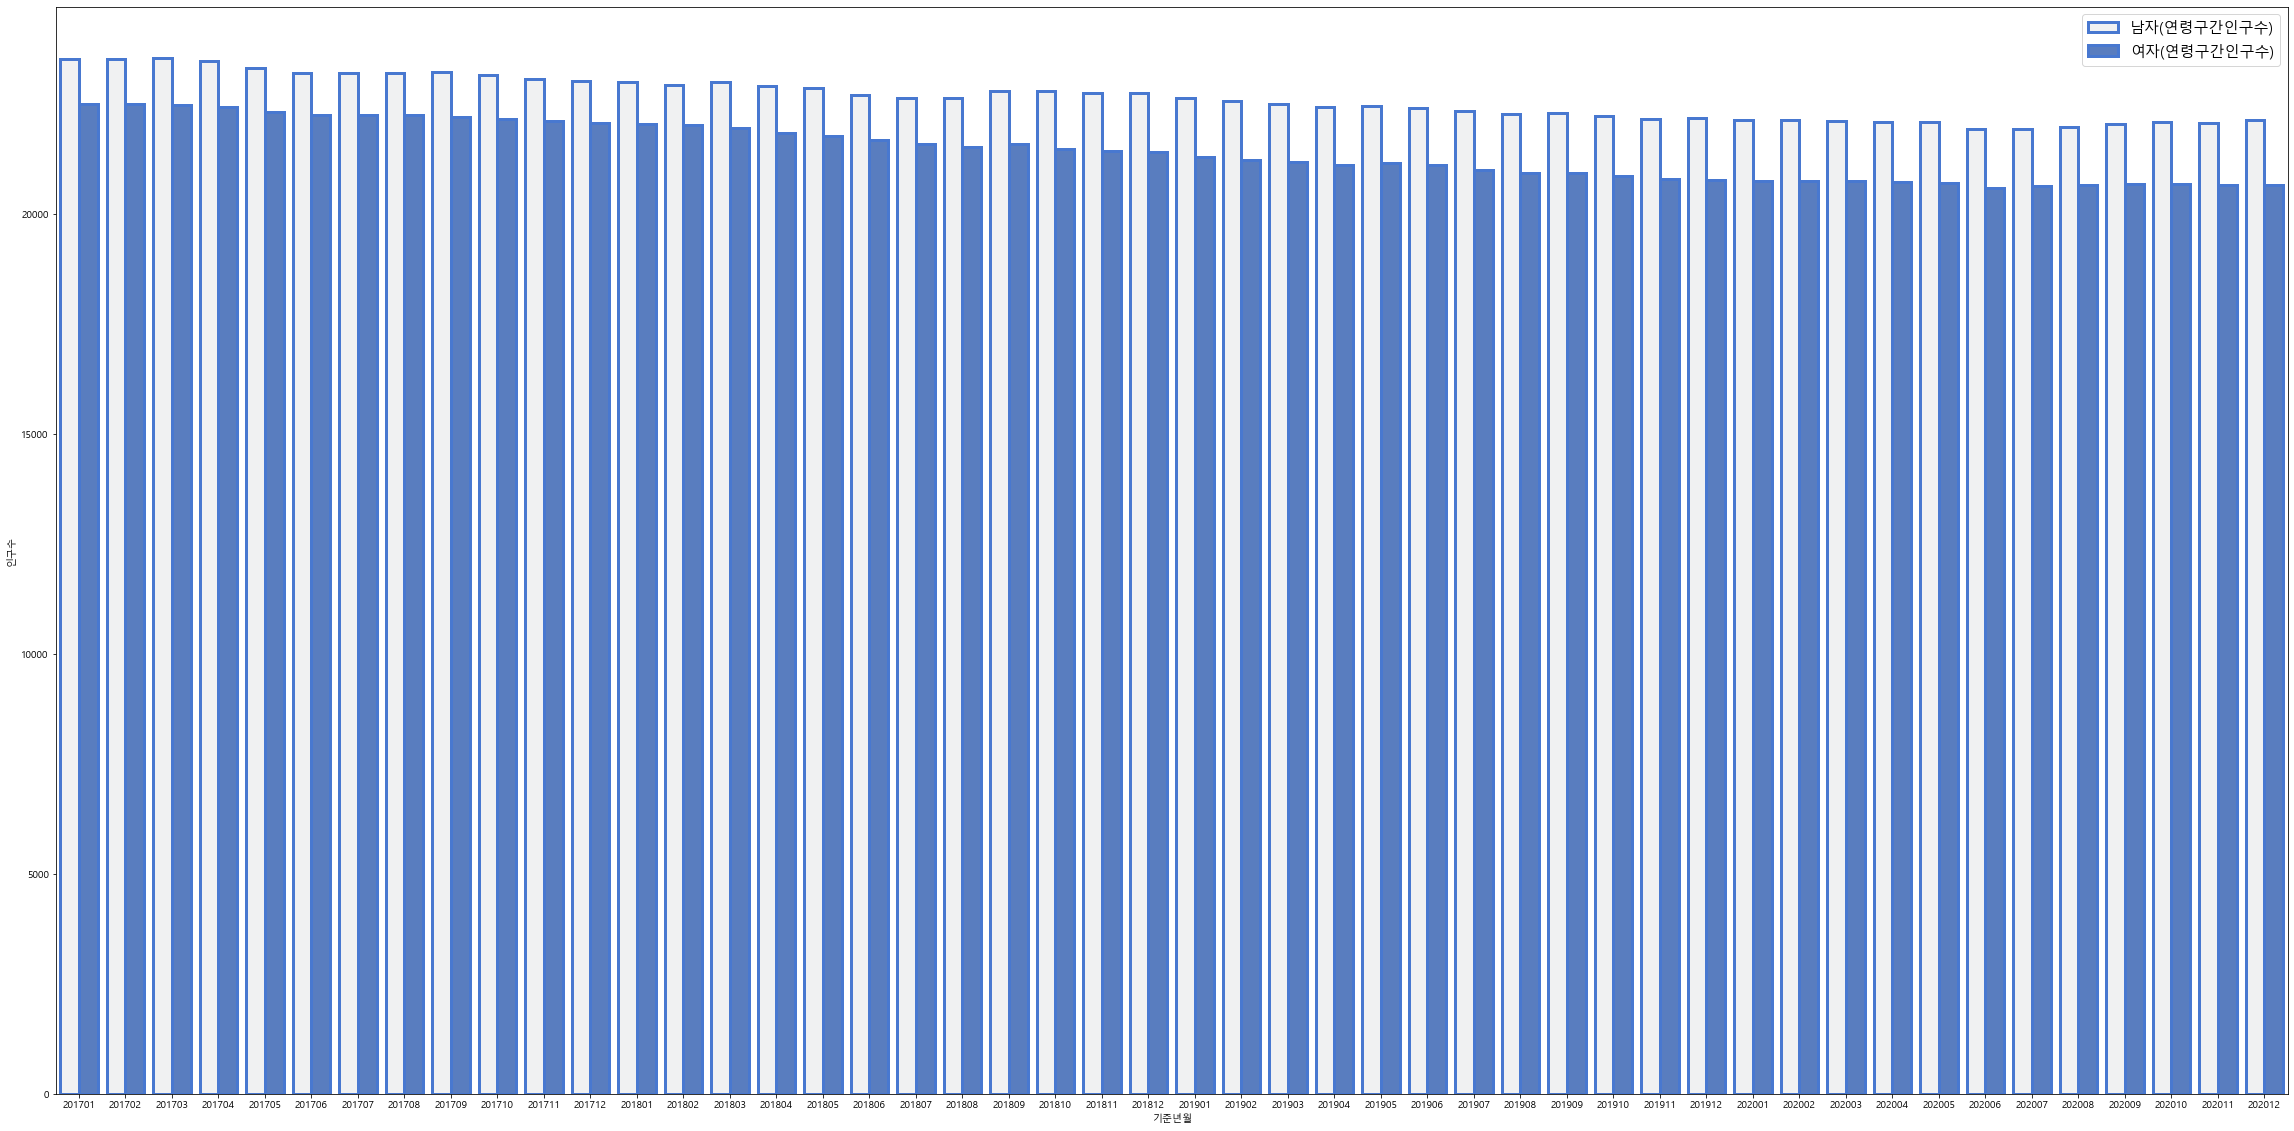

In [11]:
plt.figure(figsize=(40,20))

sns.set_color_codes('muted')
sns.barplot(x="기준년월", y="인구수",linewidth='3',hue='성별_연령대',
                data=조치원읍_총인구_월별,color = 'b', edgecolor = 'b')

plt.legend(fontsize=15, loc='best')

#### 남자 인구가 여자 인구보다 더 많고 통합 인구수가 감소하는 것 확인

In [12]:
연령대별_인구=조치원읍_인구[~조치원읍_인구['index'].str.contains('총')] 
연령대별_인구=연령대별_인구[~연령대별_인구['index'].str.contains('구간')]
연령대별_인구

index     1    기준년월      성별_연령대   인구수
3        201701_남자(0~9세)  2525  201701    남자(0~9세)  2525
4      201701_남자(10~19세)  2473  201701  남자(10~19세)  2473
5      201701_남자(20~29세)  3461  201701  남자(20~29세)  3461
6      201701_남자(30~39세)  3783  201701  남자(30~39세)  3783
7      201701_남자(40~49세)  4126  201701  남자(40~49세)  4126
...                  ...   ...     ...         ...   ...
1244   202012_여자(60~69세)  2676  202012  여자(60~69세)  2676
1245   202012_여자(70~79세)  1725  202012  여자(70~79세)  1725
1246   202012_여자(80~89세)   930  202012  여자(80~89세)   930
1247   202012_여자(90~99세)   162  202012  여자(90~99세)   162
1248  202012_여자(100세_이상)     7  202012     여자(100세     7

[1056 rows x 5 columns]

In [13]:
name_split = 연령대별_인구["성별_연령대"].str.split("자")
연령대별_인구["연령대"] = name_split.str.get(1)
연령대별_인구


index     1    기준년월      성별_연령대   인구수       연령대
3        201701_남자(0~9세)  2525  201701    남자(0~9세)  2525    (0~9세)
4      201701_남자(10~19세)  2473  201701  남자(10~19세)  2473  (10~19세)
5      201701_남자(20~29세)  3461  201701  남자(20~29세)  3461  (20~29세)
6      201701_남자(30~39세)  3783  201701  남자(30~39세)  3783  (30~39세)
7      201701_남자(40~49세)  4126  201701  남자(40~49세)  4126  (40~49세)
...                  ...   ...     ...         ...   ...       ...
1244   202012_여자(60~69세)  2676  202012  여자(60~69세)  2676  (60~69세)
1245   202012_여자(70~79세)  1725  202012  여자(70~79세)  1725  (70~79세)
1246   202012_여자(80~89세)   930  202012  여자(80~89세)   930  (80~89세)
1247   202012_여자(90~99세)   162  202012  여자(90~99세)   162  (90~99세)
1248  202012_여자(100세_이상)     7  202012     여자(100세     7     (100세

[1056 rows x 6 columns]

In [14]:
통합_연령대별_인구=연령대별_인구.groupby(['기준년월','연령대'],as_index=False).sum()[['기준년월','연령대','인구수']]
통합_연령대별_인구

기준년월       연령대   인구수
0    201701    (0~9세)  4911
1    201701     (100세     7
2    201701  (10~19세)  4851
3    201701  (20~29세)  6411
4    201701  (30~39세)  7139
..      ...       ...   ...
523  202012  (50~59세)  6618
524  202012  (60~69세)  5302
525  202012  (70~79세)  3076
526  202012  (80~89세)  1493
527  202012  (90~99세)   224

[528 rows x 3 columns]

In [15]:
원그래프용=통합_연령대별_인구.groupby(['연령대'],as_index=False).mean().round()
원그래프용

연령대     인구수
0     (0~9세)  3969.0
1      (100세     7.0
2   (10~19세)  4529.0
3   (20~29세)  6426.0
4   (30~39세)  6044.0
5   (40~49세)  7213.0
6   (50~59세)  6651.0
7   (60~69세)  4792.0
8   (70~79세)  2931.0
9   (80~89세)  1316.0
10  (90~99세)   182.0

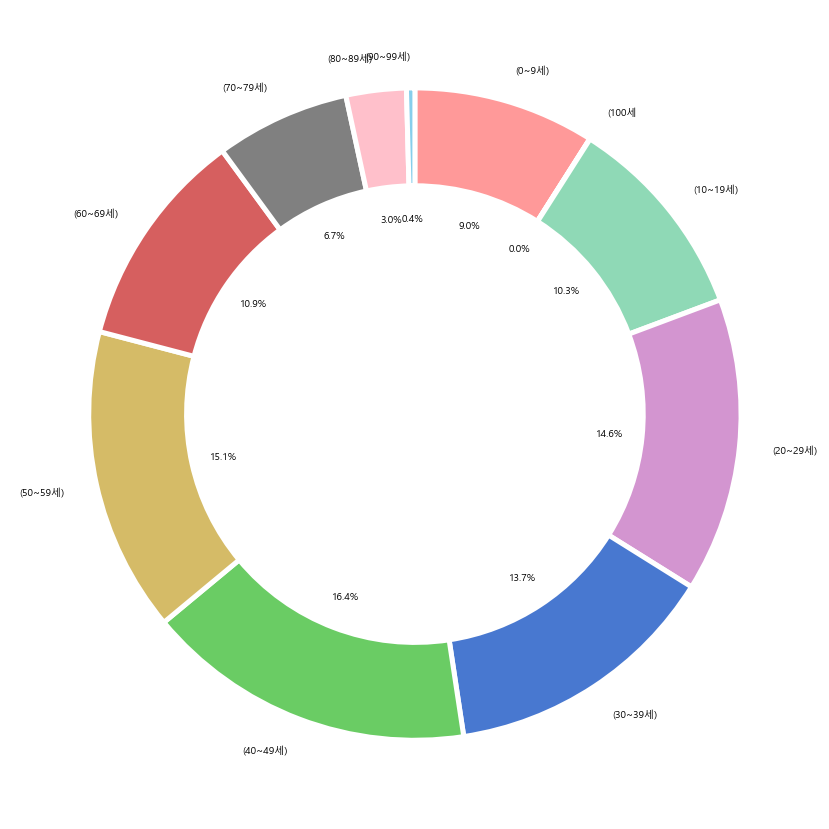

In [19]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','b','g','y','r','grey','pink','skyblue']
plt.figure(figsize=(15,15))

wedgeprops={'width': 0.30, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(원그래프용['인구수'], labels=원그래프용['연령대'], autopct='%.1f%%', counterclock=False, wedgeprops=wedgeprops,
        colors=colors, startangle=90)
plt.show()

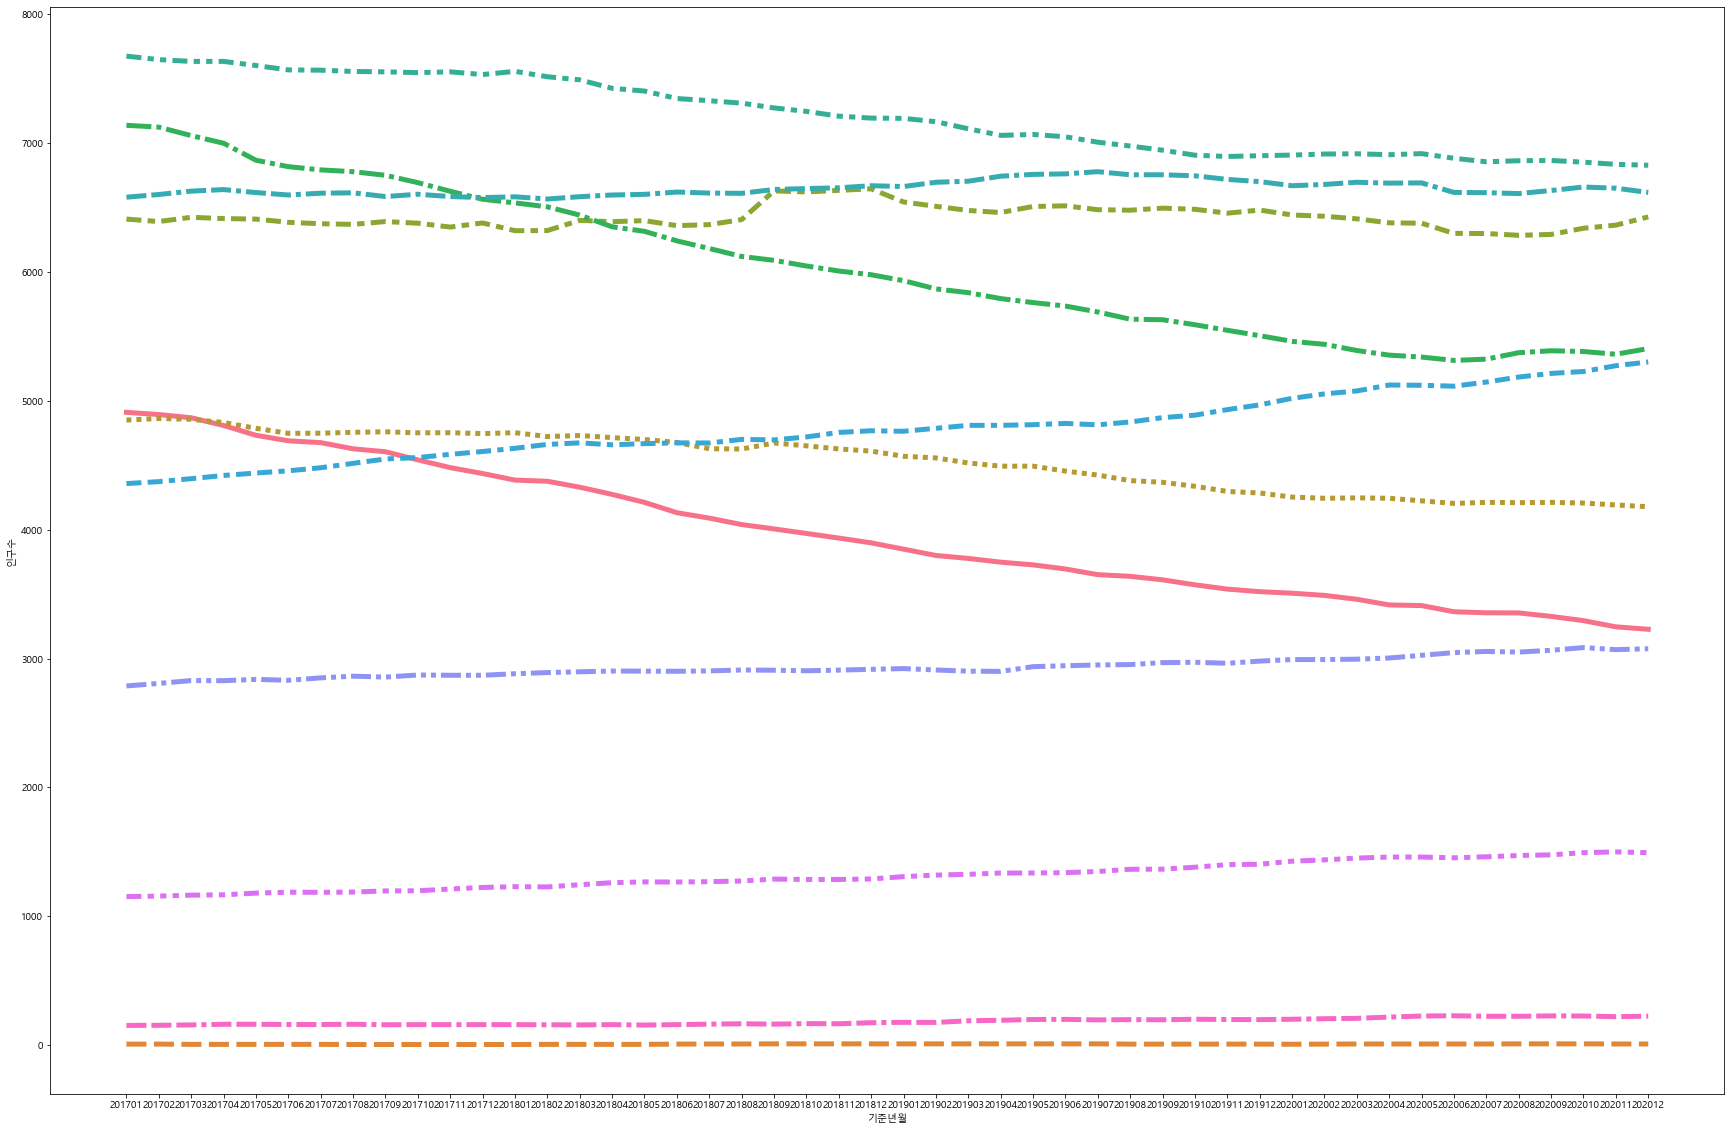

In [18]:
plt.figure(figsize=(30,20))

ax = sns.lineplot(x="기준년월", y="인구수",hue="연령대", style='연령대',linewidth='5',
                data=통합_연령대별_인구)

plt.legend(fontsize=20, loc='best')

ax.legend_.remove()

## 아파트 매매가

In [57]:
아파트_매매=pd.read_csv('3.세종시_아파트(매매)_실거래가.csv',thousands=',')
아파트_매매['계약년월']=아파트_매매['계약년월'].astype('str')

In [58]:
아파트_매매['읍면동']=아파트_매매['시군구'].str.split(" ").str[1]
아파트_매매

계약년월  계약일               시군구    본번  부번              단지명   전용면적(㎡)  \
0      201701    1       세종특별자치시 보람동   743   0           스타힐타워Ⅰ   16.9849   
1      201701    1       세종특별자치시 종촌동   683   0          가재마을2단지   59.8652   
2      201701    2       세종특별자치시 고운동  1393   0  가락마을15단지(중흥파크뷰)   84.9894   
3      201701    2       세종특별자치시 고운동  1706   0  가락마을8단지(고운뜰아파트)   84.9800   
4      201701    2       세종특별자치시 아름동  1284   0  범지기마을7단지 호반에코시티   84.9280   
...       ...  ...               ...   ...  ..              ...       ...   
23592  202012   31  세종특별자치시 조치원읍 신흥리   398   0         신흥대우푸르지오  126.6976   
23593  202012   31  세종특별자치시 조치원읍 죽림리   396   0          조치원죽림자이  128.9491   
23594  202012   31       세종특별자치시 종촌동   656   0         가재마을10단지   84.9365   
23595  202012   31       세종특별자치시 종촌동   644   0          가재마을6단지   84.6799   
23596  202012   31       세종특별자치시 한솔동   947   0   첫마을3단지(퍼스트프라임)   59.8300   

       거래금액(만원)   층  건축년도  해제사유발생일   읍면동  
0          8600   7  2016      NaN   보람동  
1         27300   7  2014      NaN   종촌동  
2         32000   3  2015      NaN   고운동  
3         30500  20  2015      NaN   고운동  
4         31300   6  2014      NaN   아름동  
...         ...  ..   ...      ...   ...  
23592     50000  10  2006      NaN  조치원읍  
23593     44000   2  2008      NaN  조치원읍  
23594     73500   4  2014      NaN   종촌동  
23595     60000   6  2016      NaN   종촌동  
23596     52800   3  2011      NaN   한솔동  

[23597 rows x 12 columns]

In [59]:
아파트_매매['면적당_금액']=pd.to_numeric((아파트_매매['거래금액(만원)'])/pd.to_numeric(아파트_매매['전용면적(㎡)'])*10000).round()
아파트_매매

계약년월  계약일               시군구    본번  부번              단지명   전용면적(㎡)  \
0      201701    1       세종특별자치시 보람동   743   0           스타힐타워Ⅰ   16.9849   
1      201701    1       세종특별자치시 종촌동   683   0          가재마을2단지   59.8652   
2      201701    2       세종특별자치시 고운동  1393   0  가락마을15단지(중흥파크뷰)   84.9894   
3      201701    2       세종특별자치시 고운동  1706   0  가락마을8단지(고운뜰아파트)   84.9800   
4      201701    2       세종특별자치시 아름동  1284   0  범지기마을7단지 호반에코시티   84.9280   
...       ...  ...               ...   ...  ..              ...       ...   
23592  202012   31  세종특별자치시 조치원읍 신흥리   398   0         신흥대우푸르지오  126.6976   
23593  202012   31  세종특별자치시 조치원읍 죽림리   396   0          조치원죽림자이  128.9491   
23594  202012   31       세종특별자치시 종촌동   656   0         가재마을10단지   84.9365   
23595  202012   31       세종특별자치시 종촌동   644   0          가재마을6단지   84.6799   
23596  202012   31       세종특별자치시 한솔동   947   0   첫마을3단지(퍼스트프라임)   59.8300   

       거래금액(만원)   층  건축년도  해제사유발생일   읍면동     면적당_금액  
0          8600   7  2016      NaN   보람동  5063321.0  
1         27300   7  2014      NaN   종촌동  4560245.0  
2         32000   3  2015      NaN   고운동  3765175.0  
3         30500  20  2015      NaN   고운동  3589080.0  
4         31300   6  2014      NaN   아름동  3685475.0  
...         ...  ..   ...      ...   ...        ...  
23592     50000  10  2006      NaN  조치원읍  3946405.0  
23593     44000   2  2008      NaN  조치원읍  3412199.0  
23594     73500   4  2014      NaN   종촌동  8653524.0  
23595     60000   6  2016      NaN   종촌동  7085507.0  
23596     52800   3  2011      NaN   한솔동  8825004.0  

[23597 rows x 13 columns]

In [60]:
# 날짜형식으로 데이터 변환

아파트_매매['계약날짜']=아파트_매매['계약일']

for i in range(0,23597):
    
    if int(아파트_매매["계약일"][i]) <10 :
        아파트_매매[['계약년월','계약일']]=아파트_매매[['계약년월','계약일']].astype(str)
        아파트_매매["계약날짜"][i] = 아파트_매매["계약년월"][i] + "0" +아파트_매매["계약일"][i]
    else:
        아파트_매매[['계약년월','계약일']]=아파트_매매[['계약년월','계약일']].astype(str)
        아파트_매매["계약날짜"][i] = 아파트_매매["계약년월"][i] +아파트_매매["계약일"][i]


아파트_매매

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일               시군구    본번  부번              단지명   전용면적(㎡)  \
0      201701   1       세종특별자치시 보람동   743   0           스타힐타워Ⅰ   16.9849   
1      201701   1       세종특별자치시 종촌동   683   0          가재마을2단지   59.8652   
2      201701   2       세종특별자치시 고운동  1393   0  가락마을15단지(중흥파크뷰)   84.9894   
3      201701   2       세종특별자치시 고운동  1706   0  가락마을8단지(고운뜰아파트)   84.9800   
4      201701   2       세종특별자치시 아름동  1284   0  범지기마을7단지 호반에코시티   84.9280   
...       ...  ..               ...   ...  ..              ...       ...   
23592  202012  31  세종특별자치시 조치원읍 신흥리   398   0         신흥대우푸르지오  126.6976   
23593  202012  31  세종특별자치시 조치원읍 죽림리   396   0          조치원죽림자이  128.9491   
23594  202012  31       세종특별자치시 종촌동   656   0         가재마을10단지   84.9365   
23595  202012  31       세종특별자치시 종촌동   644   0          가재마을6단지   84.6799   
23596  202012  31       세종특별자치시 한솔동   947   0   첫마을3단지(퍼스트프라임)   59.8300   

       거래금액(만원)   층  건축년도  해제사유발생일   읍면동     면적당_금액      계약날짜  
0          8600   7  2016      NaN   보람동  5063321.0  20170101  
1         27300   7  2014      NaN   종촌동  4560245.0  20170101  
2         32000   3  2015      NaN   고운동  3765175.0  20170102  
3         30500  20  2015      NaN   고운동  3589080.0  20170102  
4         31300   6  2014      NaN   아름동  3685475.0  20170102  
...         ...  ..   ...      ...   ...        ...       ...  
23592     50000  10  2006      NaN  조치원읍  3946405.0  20201231  
23593     44000   2  2008      NaN  조치원읍  3412199.0  20201231  
23594     73500   4  2014      NaN   종촌동  8653524.0  20201231  
23595     60000   6  2016      NaN   종촌동  7085507.0  20201231  
23596     52800   3  2011      NaN   한솔동  8825004.0  20201231  

[23597 rows x 14 columns]

In [61]:
아파트_매매['계약날짜']=아파트_매매['계약날짜'].astype('str')
아파트_매매['계약날짜']=pd.to_datetime(아파트_매매['계약날짜'])
아파트_매매

계약년월 계약일               시군구    본번  부번              단지명   전용면적(㎡)  \
0      201701   1       세종특별자치시 보람동   743   0           스타힐타워Ⅰ   16.9849   
1      201701   1       세종특별자치시 종촌동   683   0          가재마을2단지   59.8652   
2      201701   2       세종특별자치시 고운동  1393   0  가락마을15단지(중흥파크뷰)   84.9894   
3      201701   2       세종특별자치시 고운동  1706   0  가락마을8단지(고운뜰아파트)   84.9800   
4      201701   2       세종특별자치시 아름동  1284   0  범지기마을7단지 호반에코시티   84.9280   
...       ...  ..               ...   ...  ..              ...       ...   
23592  202012  31  세종특별자치시 조치원읍 신흥리   398   0         신흥대우푸르지오  126.6976   
23593  202012  31  세종특별자치시 조치원읍 죽림리   396   0          조치원죽림자이  128.9491   
23594  202012  31       세종특별자치시 종촌동   656   0         가재마을10단지   84.9365   
23595  202012  31       세종특별자치시 종촌동   644   0          가재마을6단지   84.6799   
23596  202012  31       세종특별자치시 한솔동   947   0   첫마을3단지(퍼스트프라임)   59.8300   

       거래금액(만원)   층  건축년도  해제사유발생일   읍면동     면적당_금액       계약날짜  
0          8600   7  2016      NaN   보람동  5063321.0 2017-01-01  
1         27300   7  2014      NaN   종촌동  4560245.0 2017-01-01  
2         32000   3  2015      NaN   고운동  3765175.0 2017-01-02  
3         30500  20  2015      NaN   고운동  3589080.0 2017-01-02  
4         31300   6  2014      NaN   아름동  3685475.0 2017-01-02  
...         ...  ..   ...      ...   ...        ...        ...  
23592     50000  10  2006      NaN  조치원읍  3946405.0 2020-12-31  
23593     44000   2  2008      NaN  조치원읍  3412199.0 2020-12-31  
23594     73500   4  2014      NaN   종촌동  8653524.0 2020-12-31  
23595     60000   6  2016      NaN   종촌동  7085507.0 2020-12-31  
23596     52800   3  2011      NaN   한솔동  8825004.0 2020-12-31  

[23597 rows x 14 columns]

In [63]:
조치원읍_아파트=아파트_매매[아파트_매매['읍면동']=='조치원읍']
조치원읍_아파트

계약년월 계약일               시군구   본번  부번       단지명   전용면적(㎡)  거래금액(만원)  \
7      201701   2  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상   84.7067     19000   
8      201701   2  세종특별자치시 조치원읍 신흥리  398   0  신흥대우푸르지오   84.9228     13000   
9      201701   2  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     22500   
10     201701   2  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이   84.6682     19850   
14     201701   4  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상   99.6514     21400   
...       ...  ..               ...  ...  ..       ...       ...       ...   
23562  202012  29  세종특별자치시 조치원읍 죽림리  389   0  죽림대우푸르지오  104.9044     42700   
23578  202012  30  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     50000   
23591  202012  31  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상  101.6828     34500   
23592  202012  31  세종특별자치시 조치원읍 신흥리  398   0  신흥대우푸르지오  126.6976     50000   
23593  202012  31  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     44000   

        층  건축년도  해제사유발생일   읍면동     면적당_금액       계약날짜  
7      11  2013      NaN  조치원읍  2243034.0 2017-01-02  
8       8  2006      NaN  조치원읍  1530802.0 2017-01-02  
9       8  2008      NaN  조치원읍  1744875.0 2017-01-02  
10      4  2008      NaN  조치원읍  2344446.0 2017-01-02  
14      7  2013      NaN  조치원읍  2147486.0 2017-01-04  
...    ..   ...      ...   ...        ...        ...  
23562   9  2007      NaN  조치원읍  4070373.0 2020-12-29  
23578   6  2008      NaN  조치원읍  3877499.0 2020-12-30  
23591   3  2013      NaN  조치원읍  3392904.0 2020-12-31  
23592  10  2006      NaN  조치원읍  3946405.0 2020-12-31  
23593   2  2008      NaN  조치원읍  3412199.0 2020-12-31  

[3889 rows x 14 columns]

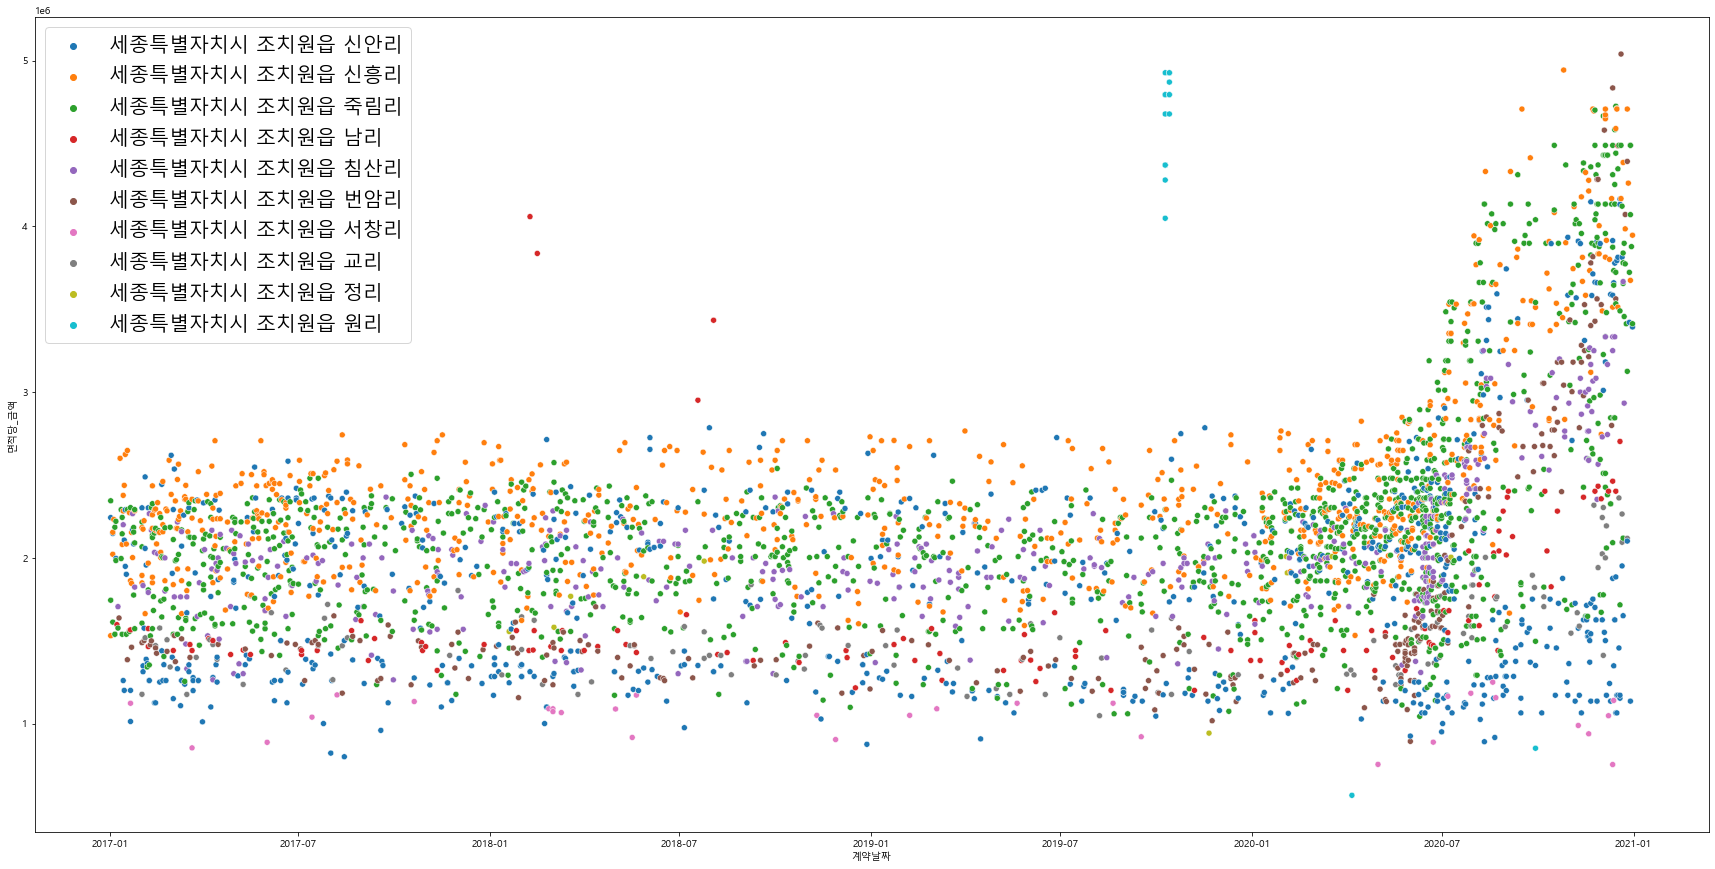

In [76]:
plt.figure(figsize=(30,15))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=조치원읍_아파트)

plt.legend(fontsize=20, loc='best')

/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:1639: FutureWarning:

Use `x` and `y` rather than `data` `and `data2`



Text(0.5, 1.0, '조치원읍 면적당 금액')

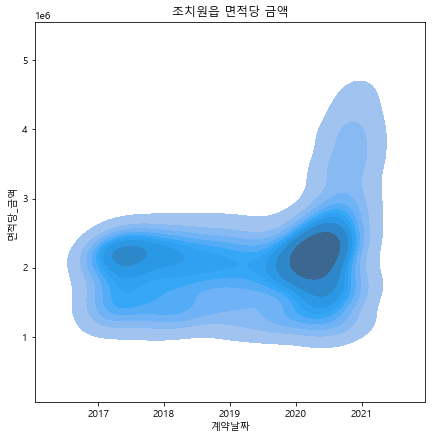

In [78]:
figure, ((ax1)) = plt.subplots(nrows = 1, ncols =1 ) 
figure.set_size_inches(7,7) 

sns.kdeplot(data=조치원읍_아파트['계약날짜'],data2=조치원읍_아파트['면적당_금액'],shade=True, ax=ax1) # shade=True 
ax1.set_title('조치원읍 면적당 금액')

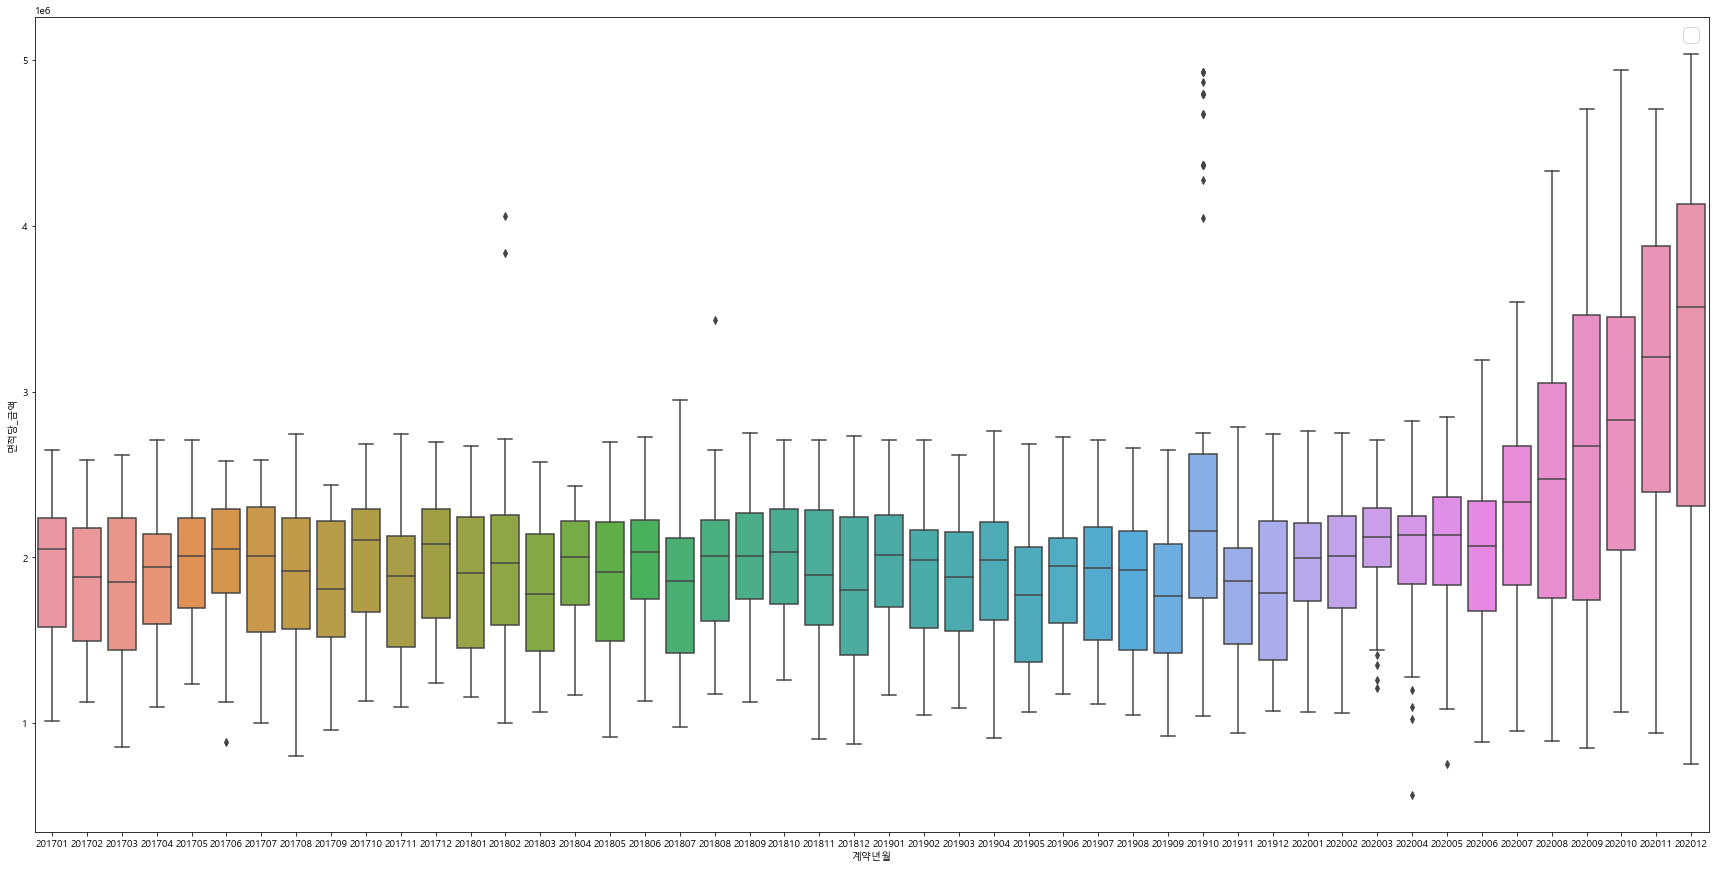

In [81]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(x="계약년월", y="면적당_금액",
                data=조치원읍_아파트)

plt.legend(fontsize=20, loc='best')

## 아파트 전월세

In [82]:
아파트_전월세=pd.read_csv('7.세종시_아파트(전월세)_실거래가.csv',thousands=",")
아파트_전월세

계약년월  계약일          시군구    본번  부번                  단지명 전월세구분  \
0      201701   13  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   
1      201701   14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   
2      201701   14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   
3      201701   15  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   
4      201702    4  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    월세   
...       ...  ...          ...   ...  ..                  ...   ...   
38890  202011   21  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   
38891  202012    8  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   
38892  202012   11  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   
38893  202012   12  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   
38894  202012   13  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   

        전용면적(㎡)  보증금(만원)  월세(만원)   층  건축년도  
0       84.9895    10000       0  13  2015  
1       84.9895    18000       0  19  2015  
2       59.8338    17000       0  10  2015  
3       84.9895    17000       0   2  2015  
4       84.9895    10000      30  13  2015  
...         ...      ...     ...  ..   ...  
38890  102.8300    10000     100   5  2020  
38891  102.5300    10000      95  14  2020  
38892   84.9500    30000       0  18  2020  
38893   84.9500    34000       0  18  2020  
38894   84.9500     8000      85  16  2020  

[38895 rows x 12 columns]

In [83]:
# 날짜형식으로 데이터 변환

아파트_전월세['계약날짜']=아파트_전월세['계약일']

for i in range(0,38895):
    
    if int(아파트_전월세["계약일"][i]) <10 :
        아파트_전월세[['계약년월','계약일']]=아파트_전월세[['계약년월','계약일']].astype(str)
        아파트_전월세["계약날짜"][i] = 아파트_전월세["계약년월"][i] + "0" +아파트_전월세["계약일"][i]
    else:
        아파트_전월세[['계약년월','계약일']]=아파트_전월세[['계약년월','계약일']].astype(str)
        아파트_전월세["계약날짜"][i] = 아파트_전월세["계약년월"][i] +아파트_전월세["계약일"][i]


아파트_전월세

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일          시군구    본번  부번                  단지명 전월세구분   전용면적(㎡)  \
0      201701  13  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
1      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
2      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   59.8338   
3      201701  15  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
4      201702   4  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    월세   84.9895   
...       ...  ..          ...   ...  ..                  ...   ...       ...   
38890  202011  21  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.8300   
38891  202012   8  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.5300   
38892  202012  11  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38893  202012  12  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38894  202012  13  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   84.9500   

       보증금(만원)  월세(만원)   층  건축년도      계약날짜  
0        10000       0  13  2015  20170113  
1        18000       0  19  2015  20170114  
2        17000       0  10  2015  20170114  
3        17000       0   2  2015  20170115  
4        10000      30  13  2015  20170204  
...        ...     ...  ..   ...       ...  
38890    10000     100   5  2020  20201121  
38891    10000      95  14  2020  20201208  
38892    30000       0  18  2020  20201211  
38893    34000       0  18  2020  20201212  
38894     8000      85  16  2020  20201213  

[38895 rows x 13 columns]

In [84]:
아파트_전월세['계약날짜']=아파트_전월세['계약날짜'].astype('str')
아파트_전월세['계약날짜']=pd.to_datetime(아파트_전월세['계약날짜'])
아파트_전월세

계약년월 계약일          시군구    본번  부번                  단지명 전월세구분   전용면적(㎡)  \
0      201701  13  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
1      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
2      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   59.8338   
3      201701  15  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
4      201702   4  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    월세   84.9895   
...       ...  ..          ...   ...  ..                  ...   ...       ...   
38890  202011  21  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.8300   
38891  202012   8  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.5300   
38892  202012  11  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38893  202012  12  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38894  202012  13  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   84.9500   

       보증금(만원)  월세(만원)   층  건축년도       계약날짜  
0        10000       0  13  2015 2017-01-13  
1        18000       0  19  2015 2017-01-14  
2        17000       0  10  2015 2017-01-14  
3        17000       0   2  2015 2017-01-15  
4        10000      30  13  2015 2017-02-04  
...        ...     ...  ..   ...        ...  
38890    10000     100   5  2020 2020-11-21  
38891    10000      95  14  2020 2020-12-08  
38892    30000       0  18  2020 2020-12-11  
38893    34000       0  18  2020 2020-12-12  
38894     8000      85  16  2020 2020-12-13  

[38895 rows x 13 columns]

In [85]:
아파트_전월세['읍면동']=아파트_전월세['시군구'].str.split(" ").str[1]
아파트_전월세

계약년월 계약일          시군구    본번  부번                  단지명 전월세구분   전용면적(㎡)  \
0      201701  13  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
1      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
2      201701  14  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   59.8338   
3      201701  15  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    전세   84.9895   
4      201702   4  세종특별자치시 고운동  1396   0  가락마을 20단지(호반베르디움5차)    월세   84.9895   
...       ...  ..          ...   ...  ..                  ...   ...       ...   
38890  202011  21  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.8300   
38891  202012   8  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세  102.5300   
38892  202012  11  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38893  202012  12  세종특별자치시 해밀동  6402   1             해밀마을 2단지    전세   84.9500   
38894  202012  13  세종특별자치시 해밀동  6402   1             해밀마을 2단지    월세   84.9500   

       보증금(만원)  월세(만원)   층  건축년도       계약날짜  읍면동  
0        10000       0  13  2015 2017-01-13  고운동  
1        18000       0  19  2015 2017-01-14  고운동  
2        17000       0  10  2015 2017-01-14  고운동  
3        17000       0   2  2015 2017-01-15  고운동  
4        10000      30  13  2015 2017-02-04  고운동  
...        ...     ...  ..   ...        ...  ...  
38890    10000     100   5  2020 2020-11-21  해밀동  
38891    10000      95  14  2020 2020-12-08  해밀동  
38892    30000       0  18  2020 2020-12-11  해밀동  
38893    34000       0  18  2020 2020-12-12  해밀동  
38894     8000      85  16  2020 2020-12-13  해밀동  

[38895 rows x 14 columns]

In [87]:
아파트_전월세=아파트_전월세[아파트_전월세['읍면동']=='조치원읍']

### 전세

In [88]:
아파트_전세=아파트_전월세[아파트_전월세['전월세구분']=='전세']
아파트_전세

계약년월 계약일               시군구   본번  부번    단지명 전월세구분  전용면적(㎡)  보증금(만원)  \
6552   201702  23   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.280     9000   
6553   201706  30   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.610     6000   
6554   201712  26   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.280     8500   
6555   201707  31   세종특별자치시 조치원읍 교리   12   1     목화    전세   59.900     9000   
6556   201701  24   세종특별자치시 조치원읍 교리  140   0     현대    전세   84.990     9000   
...       ...  ..               ...  ...  ..    ...   ...      ...      ...   
36637  202012  12  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    16000   
36638  202012  17  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세  101.310    20000   
36639  202012  20  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    16000   
36640  202012  24  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    10000   
36641  202012  28  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    11000   

       월세(만원)   층  건축년도       계약날짜   읍면동  
6552        0   6  1989 2017-02-23  조치원읍  
6553        0   9  1989 2017-06-30  조치원읍  
6554        0   4  1989 2017-12-26  조치원읍  
6555        0   2  1994 2017-07-31  조치원읍  
6556        0  12  1992 2017-01-24  조치원읍  
...       ...  ..   ...        ...   ...  
36637       0  10  1996 2020-12-12  조치원읍  
36638       0   6  1996 2020-12-17  조치원읍  
36639       0  11  1996 2020-12-20  조치원읍  
36640       0   2  1996 2020-12-24  조치원읍  
36641       0  16  1996 2020-12-28  조치원읍  

[1866 rows x 14 columns]

In [89]:
아파트_전세['면적당_금액']=pd.to_numeric((아파트_전세['보증금(만원)'])/pd.to_numeric(아파트_전세['전용면적(㎡)'])*10000).round()
아파트_전세

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일               시군구   본번  부번    단지명 전월세구분  전용면적(㎡)  보증금(만원)  \
6552   201702  23   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.280     9000   
6553   201706  30   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.610     6000   
6554   201712  26   세종특별자치시 조치원읍 교리   11   1     계룡    전세   59.280     8500   
6555   201707  31   세종특별자치시 조치원읍 교리   12   1     목화    전세   59.900     9000   
6556   201701  24   세종특별자치시 조치원읍 교리  140   0     현대    전세   84.990     9000   
...       ...  ..               ...  ...  ..    ...   ...      ...      ...   
36637  202012  12  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    16000   
36638  202012  17  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세  101.310    20000   
36639  202012  20  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    16000   
36640  202012  24  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    10000   
36641  202012  28  세종특별자치시 조치원읍 침산리   89   0  욱일아파트    전세   59.999    11000   

       월세(만원)   층  건축년도       계약날짜   읍면동     면적당_금액  
6552        0   6  1989 2017-02-23  조치원읍  1518219.0  
6553        0   9  1989 2017-06-30  조치원읍  1006543.0  
6554        0   4  1989 2017-12-26  조치원읍  1433873.0  
6555        0   2  1994 2017-07-31  조치원읍  1502504.0  
6556        0  12  1992 2017-01-24  조치원읍  1058948.0  
...       ...  ..   ...        ...   ...        ...  
36637       0  10  1996 2020-12-12  조치원읍  2666711.0  
36638       0   6  1996 2020-12-17  조치원읍  1974139.0  
36639       0  11  1996 2020-12-20  조치원읍  2666711.0  
36640       0   2  1996 2020-12-24  조치원읍  1666694.0  
36641       0  16  1996 2020-12-28  조치원읍  1833364.0  

[1866 rows x 15 columns]

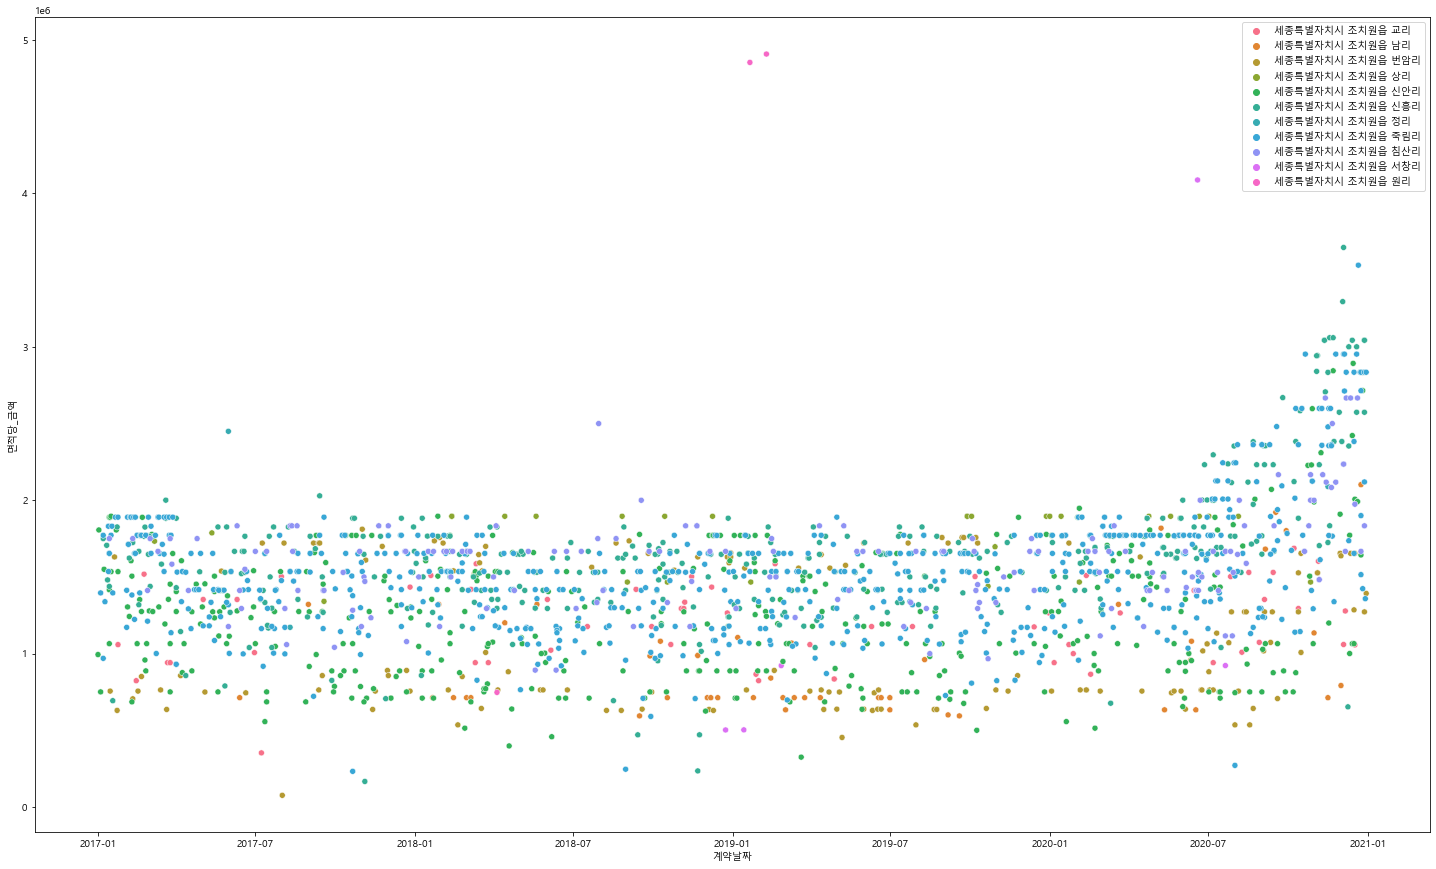

In [91]:
plt.figure(figsize=(25,15))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=아파트_전세)

plt.legend(fontsize=10, loc='best')

/opt/app-root/lib/python3.6/site-packages/seaborn/distributions.py:1639: FutureWarning:

Use `x` and `y` rather than `data` `and `data2`



Text(0.5, 1.0, '조치원읍 면적당 금액')

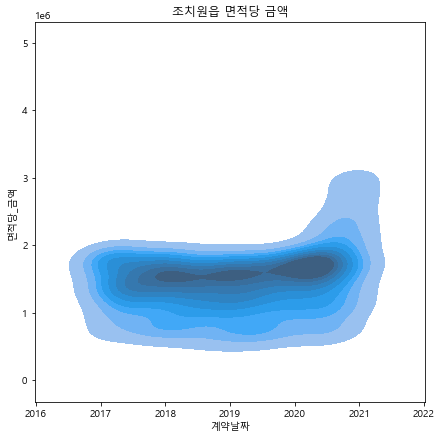

In [92]:
figure, ((ax1)) = plt.subplots(nrows = 1, ncols =1 ) 
figure.set_size_inches(7,7) 

sns.kdeplot(data=아파트_전세['계약날짜'],data2=아파트_전세['면적당_금액'],shade=True, ax=ax1) # shade=True 
ax1.set_title('조치원읍 면적당 금액')

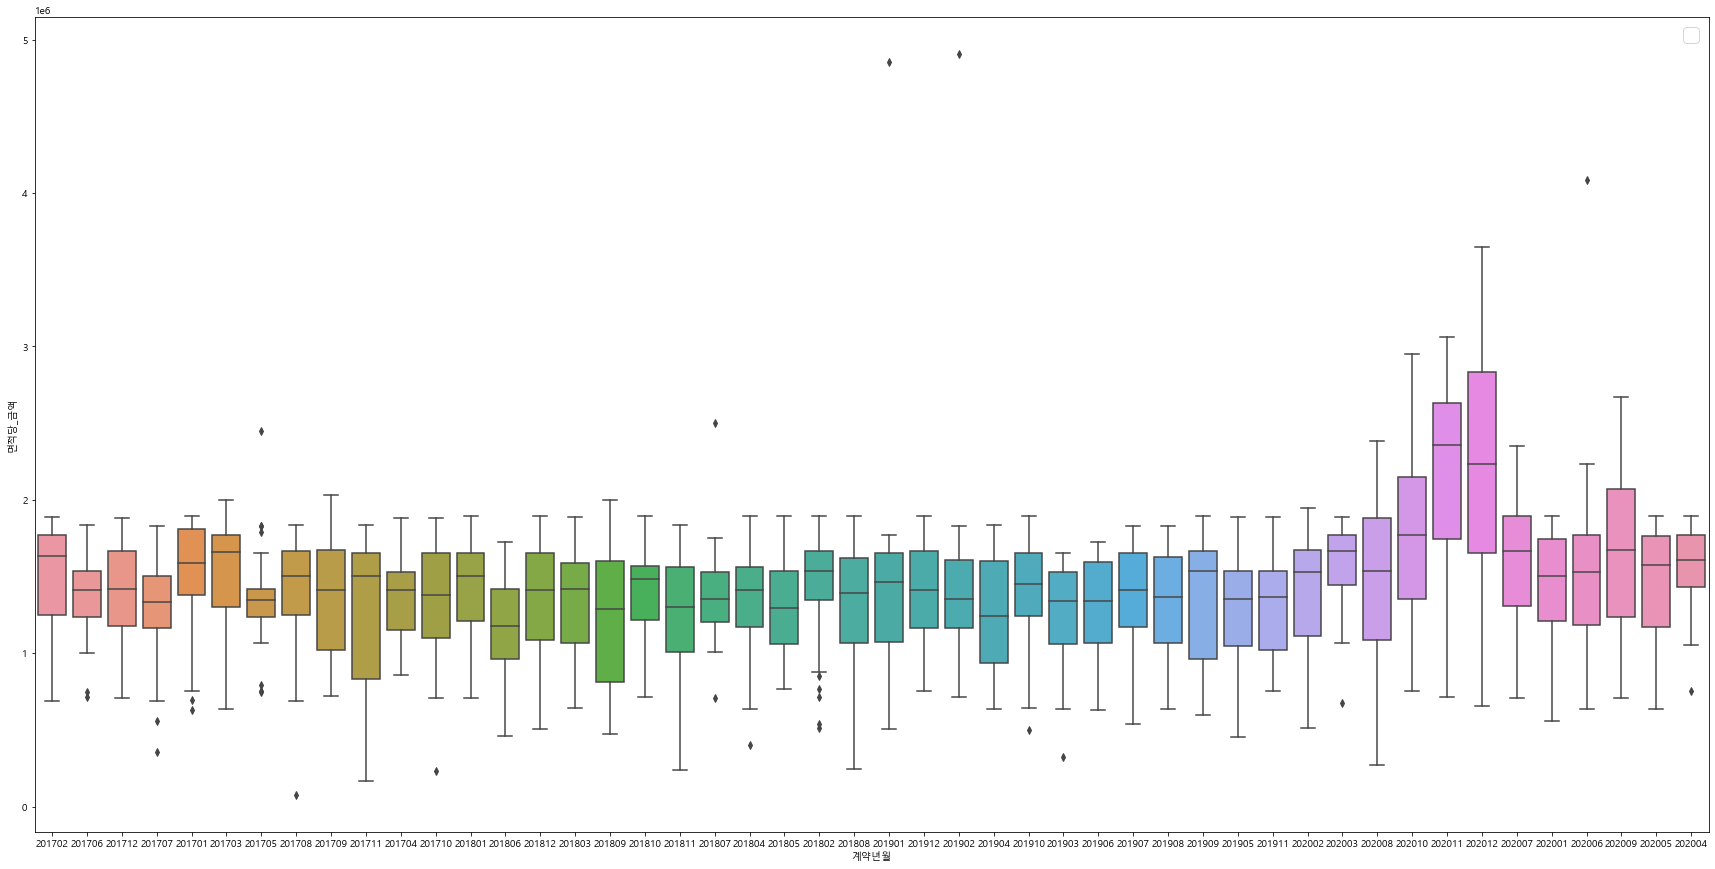

In [93]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(x="계약년월", y="면적당_금액",
                data=아파트_전세)

plt.legend(fontsize=20, loc='best')

## 연립다세대 매매

In [94]:
연립다세대_매매=pd.read_csv('4.세종시_연립다세대(매매)_실거래가.csv',thousands=",")
연립다세대_매매

계약년월  계약일               시군구   본번  부번          건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701    3   세종특별자치시 조치원읍 원리  132   7         고려1동  62.0800     36.31   
1    201701   13  세종특별자치시 조치원읍 침산리  167   6         용성빌라  64.2300     42.25   
2    201701   18   세종특별자치시 전의면 관정리  262   6       홍성맨션3차  53.9650     77.15   
3    201701   26  세종특별자치시 조치원읍 서창리  140  11         삼현빌라  48.5300     37.30   
4    201702    1  세종특별자치시 조치원읍 신흥리  106   0         주공연립  67.9000    133.43   
..      ...  ...               ...  ...  ..          ...      ...       ...   
616  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
617  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
618  202012   28   세종특별자치시 연서면 월하리  618   1           삼풍  54.0900     35.13   
619  202012   29   세종특별자치시 부강면 부강리  526   0      (526-0)  64.8200    121.64   
620  202012   29   세종특별자치시 연기면 연기리  601   2  수정다세대주택(1동)  55.2900     41.08   

     거래금액(만원)  층  건축년도  해제사유발생일  
0        4700  2  1983      NaN  
1        6500  2  1991      NaN  
2        4300  4  2002      NaN  
3        4000  2  1989      NaN  
4       12800  1  1984      NaN  
..        ... ..   ...      ...  
616      9500  5  2016      NaN  
617      9500  5  2016      NaN  
618      5500  1  1991      NaN  
619     13400  3  2012      NaN  
620      4200  1  1994      NaN  

[621 rows x 12 columns]

In [95]:
연립다세대_매매['읍면동']=연립다세대_매매['시군구'].str.split(" ").str[1]
연립다세대_매매

계약년월  계약일               시군구   본번  부번          건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701    3   세종특별자치시 조치원읍 원리  132   7         고려1동  62.0800     36.31   
1    201701   13  세종특별자치시 조치원읍 침산리  167   6         용성빌라  64.2300     42.25   
2    201701   18   세종특별자치시 전의면 관정리  262   6       홍성맨션3차  53.9650     77.15   
3    201701   26  세종특별자치시 조치원읍 서창리  140  11         삼현빌라  48.5300     37.30   
4    201702    1  세종특별자치시 조치원읍 신흥리  106   0         주공연립  67.9000    133.43   
..      ...  ...               ...  ...  ..          ...      ...       ...   
616  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
617  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
618  202012   28   세종특별자치시 연서면 월하리  618   1           삼풍  54.0900     35.13   
619  202012   29   세종특별자치시 부강면 부강리  526   0      (526-0)  64.8200    121.64   
620  202012   29   세종특별자치시 연기면 연기리  601   2  수정다세대주택(1동)  55.2900     41.08   

     거래금액(만원)  층  건축년도  해제사유발생일   읍면동  
0        4700  2  1983      NaN  조치원읍  
1        6500  2  1991      NaN  조치원읍  
2        4300  4  2002      NaN   전의면  
3        4000  2  1989      NaN  조치원읍  
4       12800  1  1984      NaN  조치원읍  
..        ... ..   ...      ...   ...  
616      9500  5  2016      NaN   보람동  
617      9500  5  2016      NaN   보람동  
618      5500  1  1991      NaN   연서면  
619     13400  3  2012      NaN   부강면  
620      4200  1  1994      NaN   연기면  

[621 rows x 13 columns]

In [96]:
연립다세대_매매['면적당_금액']=pd.to_numeric((연립다세대_매매['거래금액(만원)'])/pd.to_numeric(연립다세대_매매['전용면적(㎡)'])*10000).round()
연립다세대_매매

계약년월  계약일               시군구   본번  부번          건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701    3   세종특별자치시 조치원읍 원리  132   7         고려1동  62.0800     36.31   
1    201701   13  세종특별자치시 조치원읍 침산리  167   6         용성빌라  64.2300     42.25   
2    201701   18   세종특별자치시 전의면 관정리  262   6       홍성맨션3차  53.9650     77.15   
3    201701   26  세종특별자치시 조치원읍 서창리  140  11         삼현빌라  48.5300     37.30   
4    201702    1  세종특별자치시 조치원읍 신흥리  106   0         주공연립  67.9000    133.43   
..      ...  ...               ...  ...  ..          ...      ...       ...   
616  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
617  202012   28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
618  202012   28   세종특별자치시 연서면 월하리  618   1           삼풍  54.0900     35.13   
619  202012   29   세종특별자치시 부강면 부강리  526   0      (526-0)  64.8200    121.64   
620  202012   29   세종특별자치시 연기면 연기리  601   2  수정다세대주택(1동)  55.2900     41.08   

     거래금액(만원)  층  건축년도  해제사유발생일   읍면동     면적당_금액  
0        4700  2  1983      NaN  조치원읍   757088.0  
1        6500  2  1991      NaN  조치원읍  1011988.0  
2        4300  4  2002      NaN   전의면   796813.0  
3        4000  2  1989      NaN  조치원읍   824232.0  
4       12800  1  1984      NaN  조치원읍  1885125.0  
..        ... ..   ...      ...   ...        ...  
616      9500  5  2016      NaN   보람동  4391053.0  
617      9500  5  2016      NaN   보람동  4391053.0  
618      5500  1  1991      NaN   연서면  1016824.0  
619     13400  3  2012      NaN   부강면  2067263.0  
620      4200  1  1994      NaN   연기면   759631.0  

[621 rows x 14 columns]

In [97]:
# 날짜형식으로 데이터 변환

연립다세대_매매['계약날짜']=연립다세대_매매['계약일']

for i in range(0,621):
    
    if int(연립다세대_매매["계약일"][i]) <10 :
        연립다세대_매매[['계약년월','계약일']]=연립다세대_매매[['계약년월','계약일']].astype(str)
        연립다세대_매매["계약날짜"][i] = 연립다세대_매매["계약년월"][i] + "0" +연립다세대_매매["계약일"][i]
    else:
        연립다세대_매매[['계약년월','계약일']]=연립다세대_매매[['계약년월','계약일']].astype(str)
        연립다세대_매매["계약날짜"][i] = 연립다세대_매매["계약년월"][i] +연립다세대_매매["계약일"][i]


연립다세대_매매

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일               시군구   본번  부번          건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701   3   세종특별자치시 조치원읍 원리  132   7         고려1동  62.0800     36.31   
1    201701  13  세종특별자치시 조치원읍 침산리  167   6         용성빌라  64.2300     42.25   
2    201701  18   세종특별자치시 전의면 관정리  262   6       홍성맨션3차  53.9650     77.15   
3    201701  26  세종특별자치시 조치원읍 서창리  140  11         삼현빌라  48.5300     37.30   
4    201702   1  세종특별자치시 조치원읍 신흥리  106   0         주공연립  67.9000    133.43   
..      ...  ..               ...  ...  ..          ...      ...       ...   
616  202012  28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
617  202012  28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
618  202012  28   세종특별자치시 연서면 월하리  618   1           삼풍  54.0900     35.13   
619  202012  29   세종특별자치시 부강면 부강리  526   0      (526-0)  64.8200    121.64   
620  202012  29   세종특별자치시 연기면 연기리  601   2  수정다세대주택(1동)  55.2900     41.08   

     거래금액(만원)  층  건축년도  해제사유발생일   읍면동     면적당_금액      계약날짜  
0        4700  2  1983      NaN  조치원읍   757088.0  20170103  
1        6500  2  1991      NaN  조치원읍  1011988.0  20170113  
2        4300  4  2002      NaN   전의면   796813.0  20170118  
3        4000  2  1989      NaN  조치원읍   824232.0  20170126  
4       12800  1  1984      NaN  조치원읍  1885125.0  20170201  
..        ... ..   ...      ...   ...        ...       ...  
616      9500  5  2016      NaN   보람동  4391053.0  20201228  
617      9500  5  2016      NaN   보람동  4391053.0  20201228  
618      5500  1  1991      NaN   연서면  1016824.0  20201228  
619     13400  3  2012      NaN   부강면  2067263.0  20201229  
620      4200  1  1994      NaN   연기면   759631.0  20201229  

[621 rows x 15 columns]

In [99]:
연립다세대_매매['계약날짜']=연립다세대_매매['계약날짜'].astype('str')
연립다세대_매매['계약날짜']=pd.to_datetime(연립다세대_매매['계약날짜'])
연립다세대_매매

계약년월 계약일               시군구   본번  부번          건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701   3   세종특별자치시 조치원읍 원리  132   7         고려1동  62.0800     36.31   
1    201701  13  세종특별자치시 조치원읍 침산리  167   6         용성빌라  64.2300     42.25   
2    201701  18   세종특별자치시 전의면 관정리  262   6       홍성맨션3차  53.9650     77.15   
3    201701  26  세종특별자치시 조치원읍 서창리  140  11         삼현빌라  48.5300     37.30   
4    201702   1  세종특별자치시 조치원읍 신흥리  106   0         주공연립  67.9000    133.43   
..      ...  ..               ...  ...  ..          ...      ...       ...   
616  202012  28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
617  202012  28       세종특별자치시 보람동  743   0       스타힐타워Ⅰ  21.6349      6.44   
618  202012  28   세종특별자치시 연서면 월하리  618   1           삼풍  54.0900     35.13   
619  202012  29   세종특별자치시 부강면 부강리  526   0      (526-0)  64.8200    121.64   
620  202012  29   세종특별자치시 연기면 연기리  601   2  수정다세대주택(1동)  55.2900     41.08   

     거래금액(만원)  층  건축년도  해제사유발생일   읍면동     면적당_금액       계약날짜  
0        4700  2  1983      NaN  조치원읍   757088.0 2017-01-03  
1        6500  2  1991      NaN  조치원읍  1011988.0 2017-01-13  
2        4300  4  2002      NaN   전의면   796813.0 2017-01-18  
3        4000  2  1989      NaN  조치원읍   824232.0 2017-01-26  
4       12800  1  1984      NaN  조치원읍  1885125.0 2017-02-01  
..        ... ..   ...      ...   ...        ...        ...  
616      9500  5  2016      NaN   보람동  4391053.0 2020-12-28  
617      9500  5  2016      NaN   보람동  4391053.0 2020-12-28  
618      5500  1  1991      NaN   연서면  1016824.0 2020-12-28  
619     13400  3  2012      NaN   부강면  2067263.0 2020-12-29  
620      4200  1  1994      NaN   연기면   759631.0 2020-12-29  

[621 rows x 15 columns]

In [102]:
연립다세대_매매=연립다세대_매매[연립다세대_매매['읍면동']=='조치원읍']
연립다세대_매매

계약년월 계약일               시군구   본번  부번      건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701   3   세종특별자치시 조치원읍 원리  132   7     고려1동    62.08     36.31   
1    201701  13  세종특별자치시 조치원읍 침산리  167   6     용성빌라    64.23     42.25   
3    201701  26  세종특별자치시 조치원읍 서창리  140  11     삼현빌라    48.53     37.30   
4    201702   1  세종특별자치시 조치원읍 신흥리  106   0     주공연립    67.90    133.43   
5    201703  13  세종특별자치시 조치원읍 죽림리    4   9  동진빌라(나)    48.41     30.34   
..      ...  ..               ...  ...  ..      ...      ...       ...   
599  202012  13   세종특별자치시 조치원읍 남리   69  17    남동연립B    38.77     13.49   
604  202012  16  세종특별자치시 조치원읍 서창리  140  11     삼현빌라    48.53     37.30   
605  202012  16  세종특별자치시 조치원읍 신흥리    8   7     강람빌라    48.96     41.00   
606  202012  16  세종특별자치시 조치원읍 신흥리  106   0     주공연립    67.90    133.43   
611  202012  22  세종특별자치시 조치원읍 번암리   74   0     로얄빌라    76.26     86.56   

     거래금액(만원)  층  건축년도     해제사유발생일   읍면동     면적당_금액       계약날짜  
0        4700  2  1983         NaN  조치원읍   757088.0 2017-01-03  
1        6500  2  1991         NaN  조치원읍  1011988.0 2017-01-13  
3        4000  2  1989         NaN  조치원읍   824232.0 2017-01-26  
4       12800  1  1984         NaN  조치원읍  1885125.0 2017-02-01  
5        5000  2  1990         NaN  조치원읍  1032844.0 2017-03-13  
..        ... ..   ...         ...   ...        ...        ...  
599      5500  3  1993         NaN  조치원읍  1418623.0 2020-12-13  
604      6000  2  1989         NaN  조치원읍  1236349.0 2020-12-16  
605      4000  1  1990         NaN  조치원읍   816993.0 2020-12-16  
606     28500  2  1984  20210210.0  조치원읍  4197349.0 2020-12-16  
611      8500  4  1991         NaN  조치원읍  1114608.0 2020-12-22  

[357 rows x 15 columns]

In [110]:
선그래프용=연립다세대_매매.groupby(['계약년월'],as_index=False).mean().round()[['계약년월','면적당_금액']]
선그래프용

계약년월     면적당_금액
0   201701   864436.0
1   201702  1885125.0
2   201703  1075015.0
3   201704  1125578.0
4   201705  1491517.0
5   201706  2655773.0
6   201707  2356733.0
7   201708  1532694.0
8   201709  1450537.0
9   201710  1811487.0
10  201711  1475718.0
11  201712  1933153.0
12  201801  1432785.0
13  201802  1241164.0
14  201803  1949395.0
15  201804  1079882.0
16  201805  1578926.0
17  201806   821288.0
18  201808  1636971.0
19  201810  1105583.0
20  201811   538213.0
21  201812   893529.0
22  201901  1616597.0
23  201902   829646.0
24  201903  1382308.0
25  201904  1060941.0
26  201905  1299064.0
27  201906  1055901.0
28  201907   699386.0
29  201909   799966.0
30  201910  1170171.0
31  201911  1504313.0
32  201912  1988218.0
33  202001  1425325.0
34  202002  1570676.0
35  202003  1113116.0
36  202004  2095809.0
37  202005  1085247.0
38  202006  1441534.0
39  202007  2690862.0
40  202008  3681885.0
41  202009  1989786.0
42  202010  1853411.0
43  202011  2485922.0
44  202012  2573397.0

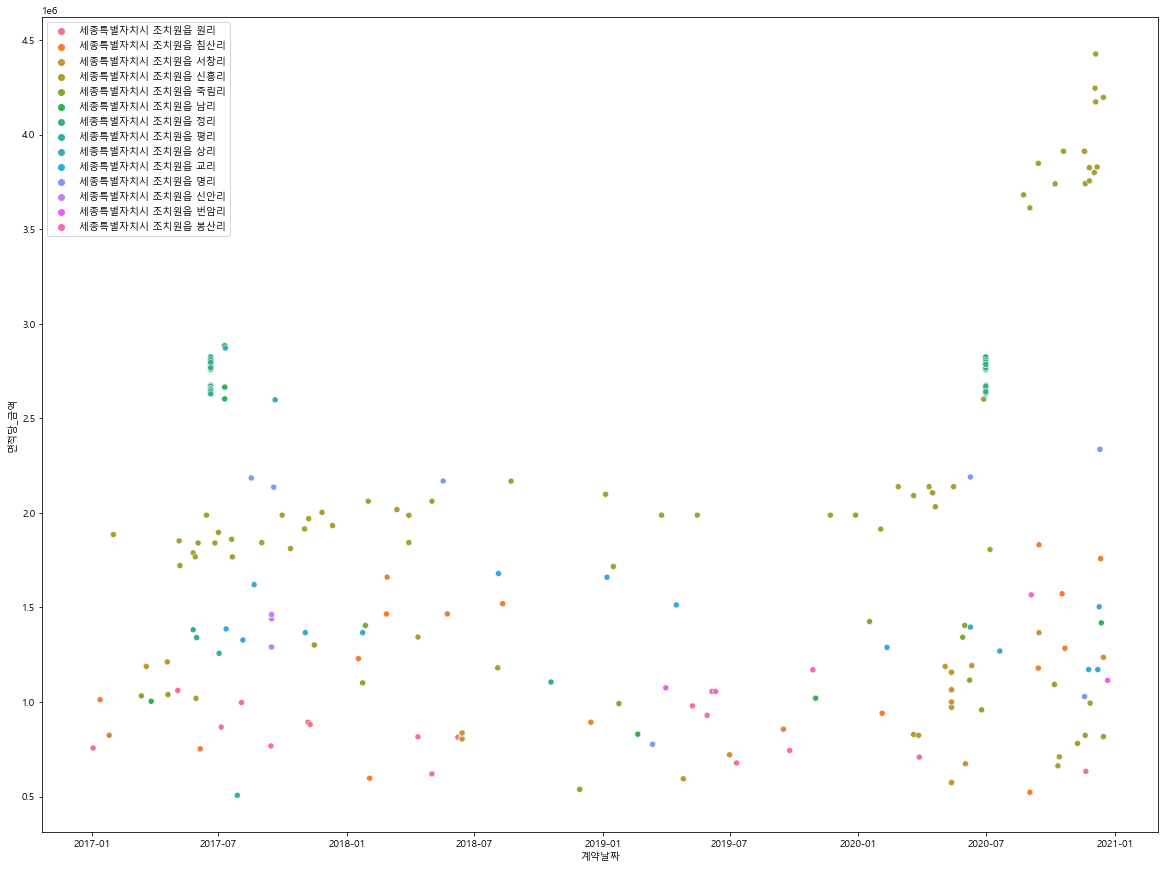

In [103]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=연립다세대_매매)

plt.legend(fontsize=10, loc='best')

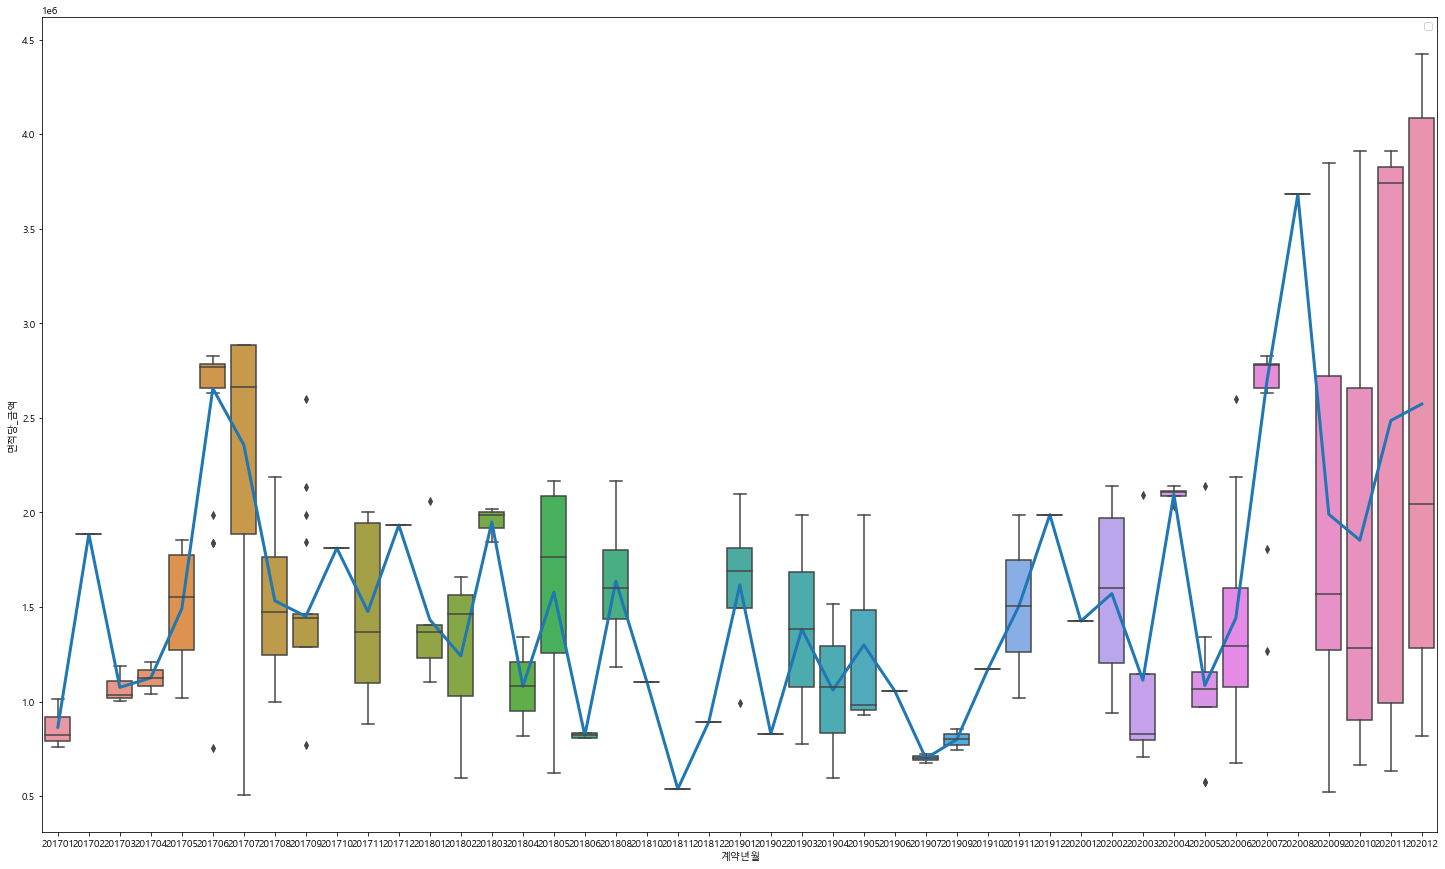

In [112]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x="계약년월", y="면적당_금액",
                data=연립다세대_매매)
ax = sns.lineplot(x="계약년월", y="면적당_금액",
                data=선그래프용,linewidth='3')

plt.legend(fontsize=10, loc='best')

## 단독다가구 매매

In [124]:
단독다가구=pd.read_csv('5.세종시_단독다가구(매매)_실거래가.csv',thousands=",")
단독다가구

계약년월  계약일               시군구 주택유형  도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
0     201701    2   세종특별자치시 전의면 다방리   단독  8m미만   67.32    294.0      2000   
1     201701    4  세종특별자치시 조치원읍 서창리   단독  8m미만  581.25    415.0     54500   
2     201701    4  세종특별자치시 조치원읍 죽림리   단독  8m미만   63.89    175.0     16000   
3     201701    6   세종특별자치시 금남면 용담리   단독  8m미만   95.76    537.0     26000   
4     201701    6  세종특별자치시 조치원읍 서창리  다가구  8m미만  375.36    222.7     53700   
...      ...  ...               ...  ...   ...     ...      ...       ...   
1139  202012   28   세종특별자치시 전동면 노장리   단독  8m미만  191.34    660.0     16000   
1140  202012   29   세종특별자치시 장군면 도계리   단독  8m미만  235.71    950.0     47100   
1141  202012   29   세종특별자치시 전동면 미곡리   단독  8m미만  129.96   1482.0     35000   
1142  202012   30   세종특별자치시 조치원읍 원리   단독  8m미만  205.05    142.8     30000   
1143  202012   31   세종특별자치시 전의면 동교리   단독  8m미만  120.69    274.0     10000   

        건축년도  해제사유발생일  
0     1991.0      NaN  
1     1997.0      NaN  
2     1983.0      NaN  
3     1977.0      NaN  
4     2011.0      NaN  
...      ...      ...  
1139  1998.0      NaN  
1140  1990.0      NaN  
1141  2014.0      NaN  
1142  1977.0      NaN  
1143  1993.0      NaN  

[1144 rows x 10 columns]

In [125]:
단독다가구['읍면동']=단독다가구['시군구'].str.split(" ").str[1]
단독다가구

계약년월  계약일               시군구 주택유형  도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
0     201701    2   세종특별자치시 전의면 다방리   단독  8m미만   67.32    294.0      2000   
1     201701    4  세종특별자치시 조치원읍 서창리   단독  8m미만  581.25    415.0     54500   
2     201701    4  세종특별자치시 조치원읍 죽림리   단독  8m미만   63.89    175.0     16000   
3     201701    6   세종특별자치시 금남면 용담리   단독  8m미만   95.76    537.0     26000   
4     201701    6  세종특별자치시 조치원읍 서창리  다가구  8m미만  375.36    222.7     53700   
...      ...  ...               ...  ...   ...     ...      ...       ...   
1139  202012   28   세종특별자치시 전동면 노장리   단독  8m미만  191.34    660.0     16000   
1140  202012   29   세종특별자치시 장군면 도계리   단독  8m미만  235.71    950.0     47100   
1141  202012   29   세종특별자치시 전동면 미곡리   단독  8m미만  129.96   1482.0     35000   
1142  202012   30   세종특별자치시 조치원읍 원리   단독  8m미만  205.05    142.8     30000   
1143  202012   31   세종특별자치시 전의면 동교리   단독  8m미만  120.69    274.0     10000   

        건축년도  해제사유발생일   읍면동  
0     1991.0      NaN   전의면  
1     1997.0      NaN  조치원읍  
2     1983.0      NaN  조치원읍  
3     1977.0      NaN   금남면  
4     2011.0      NaN  조치원읍  
...      ...      ...   ...  
1139  1998.0      NaN   전동면  
1140  1990.0      NaN   장군면  
1141  2014.0      NaN   전동면  
1142  1977.0      NaN  조치원읍  
1143  1993.0      NaN   전의면  

[1144 rows x 11 columns]

In [126]:
# 날짜형식으로 데이터 변환

단독다가구['계약날짜']=단독다가구['계약일']

for i in range(0,1144):
    
    if int(단독다가구["계약일"][i]) <10 :
        단독다가구[['계약년월','계약일']]=단독다가구[['계약년월','계약일']].astype(str)
        단독다가구["계약날짜"][i] = 단독다가구["계약년월"][i] + "0" +단독다가구["계약일"][i]
    else:
        단독다가구[['계약년월','계약일']]=단독다가구[['계약년월','계약일']].astype(str)
        단독다가구["계약날짜"][i] = 단독다가구["계약년월"][i] +단독다가구["계약일"][i]


단독다가구

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일               시군구 주택유형  도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
0     201701   2   세종특별자치시 전의면 다방리   단독  8m미만   67.32    294.0      2000   
1     201701   4  세종특별자치시 조치원읍 서창리   단독  8m미만  581.25    415.0     54500   
2     201701   4  세종특별자치시 조치원읍 죽림리   단독  8m미만   63.89    175.0     16000   
3     201701   6   세종특별자치시 금남면 용담리   단독  8m미만   95.76    537.0     26000   
4     201701   6  세종특별자치시 조치원읍 서창리  다가구  8m미만  375.36    222.7     53700   
...      ...  ..               ...  ...   ...     ...      ...       ...   
1139  202012  28   세종특별자치시 전동면 노장리   단독  8m미만  191.34    660.0     16000   
1140  202012  29   세종특별자치시 장군면 도계리   단독  8m미만  235.71    950.0     47100   
1141  202012  29   세종특별자치시 전동면 미곡리   단독  8m미만  129.96   1482.0     35000   
1142  202012  30   세종특별자치시 조치원읍 원리   단독  8m미만  205.05    142.8     30000   
1143  202012  31   세종특별자치시 전의면 동교리   단독  8m미만  120.69    274.0     10000   

        건축년도  해제사유발생일   읍면동      계약날짜  
0     1991.0      NaN   전의면  20170102  
1     1997.0      NaN  조치원읍  20170104  
2     1983.0      NaN  조치원읍  20170104  
3     1977.0      NaN   금남면  20170106  
4     2011.0      NaN  조치원읍  20170106  
...      ...      ...   ...       ...  
1139  1998.0      NaN   전동면  20201228  
1140  1990.0      NaN   장군면  20201229  
1141  2014.0      NaN   전동면  20201229  
1142  1977.0      NaN  조치원읍  20201230  
1143  1993.0      NaN   전의면  20201231  

[1144 rows x 12 columns]

In [127]:
단독다가구['계약날짜']=단독다가구['계약날짜'].astype('str')
단독다가구['계약날짜']=pd.to_datetime(단독다가구['계약날짜'])
단독다가구

계약년월 계약일               시군구 주택유형  도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
0     201701   2   세종특별자치시 전의면 다방리   단독  8m미만   67.32    294.0      2000   
1     201701   4  세종특별자치시 조치원읍 서창리   단독  8m미만  581.25    415.0     54500   
2     201701   4  세종특별자치시 조치원읍 죽림리   단독  8m미만   63.89    175.0     16000   
3     201701   6   세종특별자치시 금남면 용담리   단독  8m미만   95.76    537.0     26000   
4     201701   6  세종특별자치시 조치원읍 서창리  다가구  8m미만  375.36    222.7     53700   
...      ...  ..               ...  ...   ...     ...      ...       ...   
1139  202012  28   세종특별자치시 전동면 노장리   단독  8m미만  191.34    660.0     16000   
1140  202012  29   세종특별자치시 장군면 도계리   단독  8m미만  235.71    950.0     47100   
1141  202012  29   세종특별자치시 전동면 미곡리   단독  8m미만  129.96   1482.0     35000   
1142  202012  30   세종특별자치시 조치원읍 원리   단독  8m미만  205.05    142.8     30000   
1143  202012  31   세종특별자치시 전의면 동교리   단독  8m미만  120.69    274.0     10000   

        건축년도  해제사유발생일   읍면동       계약날짜  
0     1991.0      NaN   전의면 2017-01-02  
1     1997.0      NaN  조치원읍 2017-01-04  
2     1983.0      NaN  조치원읍 2017-01-04  
3     1977.0      NaN   금남면 2017-01-06  
4     2011.0      NaN  조치원읍 2017-01-06  
...      ...      ...   ...        ...  
1139  1998.0      NaN   전동면 2020-12-28  
1140  1990.0      NaN   장군면 2020-12-29  
1141  2014.0      NaN   전동면 2020-12-29  
1142  1977.0      NaN  조치원읍 2020-12-30  
1143  1993.0      NaN   전의면 2020-12-31  

[1144 rows x 12 columns]

In [128]:
단독다가구['면적당_금액']=pd.to_numeric((단독다가구['거래금액(만원)'])/pd.to_numeric(단독다가구['연면적(㎡)'])*10000).round()
단독다가구

계약년월 계약일               시군구 주택유형  도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
0     201701   2   세종특별자치시 전의면 다방리   단독  8m미만   67.32    294.0      2000   
1     201701   4  세종특별자치시 조치원읍 서창리   단독  8m미만  581.25    415.0     54500   
2     201701   4  세종특별자치시 조치원읍 죽림리   단독  8m미만   63.89    175.0     16000   
3     201701   6   세종특별자치시 금남면 용담리   단독  8m미만   95.76    537.0     26000   
4     201701   6  세종특별자치시 조치원읍 서창리  다가구  8m미만  375.36    222.7     53700   
...      ...  ..               ...  ...   ...     ...      ...       ...   
1139  202012  28   세종특별자치시 전동면 노장리   단독  8m미만  191.34    660.0     16000   
1140  202012  29   세종특별자치시 장군면 도계리   단독  8m미만  235.71    950.0     47100   
1141  202012  29   세종특별자치시 전동면 미곡리   단독  8m미만  129.96   1482.0     35000   
1142  202012  30   세종특별자치시 조치원읍 원리   단독  8m미만  205.05    142.8     30000   
1143  202012  31   세종특별자치시 전의면 동교리   단독  8m미만  120.69    274.0     10000   

        건축년도  해제사유발생일   읍면동       계약날짜     면적당_금액  
0     1991.0      NaN   전의면 2017-01-02   297089.0  
1     1997.0      NaN  조치원읍 2017-01-04   937634.0  
2     1983.0      NaN  조치원읍 2017-01-04  2504304.0  
3     1977.0      NaN   금남면 2017-01-06  2715121.0  
4     2011.0      NaN  조치원읍 2017-01-06  1430627.0  
...      ...      ...   ...        ...        ...  
1139  1998.0      NaN   전동면 2020-12-28   836208.0  
1140  1990.0      NaN   장군면 2020-12-29  1998218.0  
1141  2014.0      NaN   전동면 2020-12-29  2693136.0  
1142  1977.0      NaN  조치원읍 2020-12-30  1463058.0  
1143  1993.0      NaN   전의면 2020-12-31   828569.0  

[1144 rows x 13 columns]

In [132]:
단독다가구=단독다가구[단독다가구['읍면동']=='조치원읍']
단독다가구

계약년월 계약일               시군구 주택유형   도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
1     201701   4  세종특별자치시 조치원읍 서창리   단독   8m미만  581.25    415.0     54500   
2     201701   4  세종특별자치시 조치원읍 죽림리   단독   8m미만   63.89    175.0     16000   
4     201701   6  세종특별자치시 조치원읍 서창리  다가구   8m미만  375.36    222.7     53700   
5     201701   7  세종특별자치시 조치원읍 신안리  다가구   8m미만  493.21    322.0     37000   
10    201701  10  세종특별자치시 조치원읍 서창리   단독   8m미만   45.99    164.0     20050   
...      ...  ..               ...  ...    ...     ...      ...       ...   
1116  202012   4  세종특별자치시 조치원읍 서창리   단독  25m미만   93.00    231.0      8060   
1119  202012   7  세종특별자치시 조치원읍 신흥리   단독  12m미만   53.46    113.0     12000   
1123  202012  10  세종특별자치시 조치원읍 신안리  다가구   8m미만  189.12    150.0     17700   
1129  202012  14   세종특별자치시 조치원읍 평리   단독   8m미만   55.32    132.0     10500   
1142  202012  30   세종특별자치시 조치원읍 원리   단독   8m미만  205.05    142.8     30000   

        건축년도  해제사유발생일   읍면동       계약날짜     면적당_금액  
1     1997.0      NaN  조치원읍 2017-01-04   937634.0  
2     1983.0      NaN  조치원읍 2017-01-04  2504304.0  
4     2011.0      NaN  조치원읍 2017-01-06  1430627.0  
5     2004.0      NaN  조치원읍 2017-01-07   750188.0  
10    1987.0      NaN  조치원읍 2017-01-10  4359643.0  
...      ...      ...   ...        ...        ...  
1116  1959.0      NaN  조치원읍 2020-12-04   866667.0  
1119  1974.0      NaN  조치원읍 2020-12-07  2244669.0  
1123  1999.0      NaN  조치원읍 2020-12-10   935914.0  
1129  1975.0      NaN  조치원읍 2020-12-14  1898048.0  
1142  1977.0      NaN  조치원읍 2020-12-30  1463058.0  

[346 rows x 13 columns]

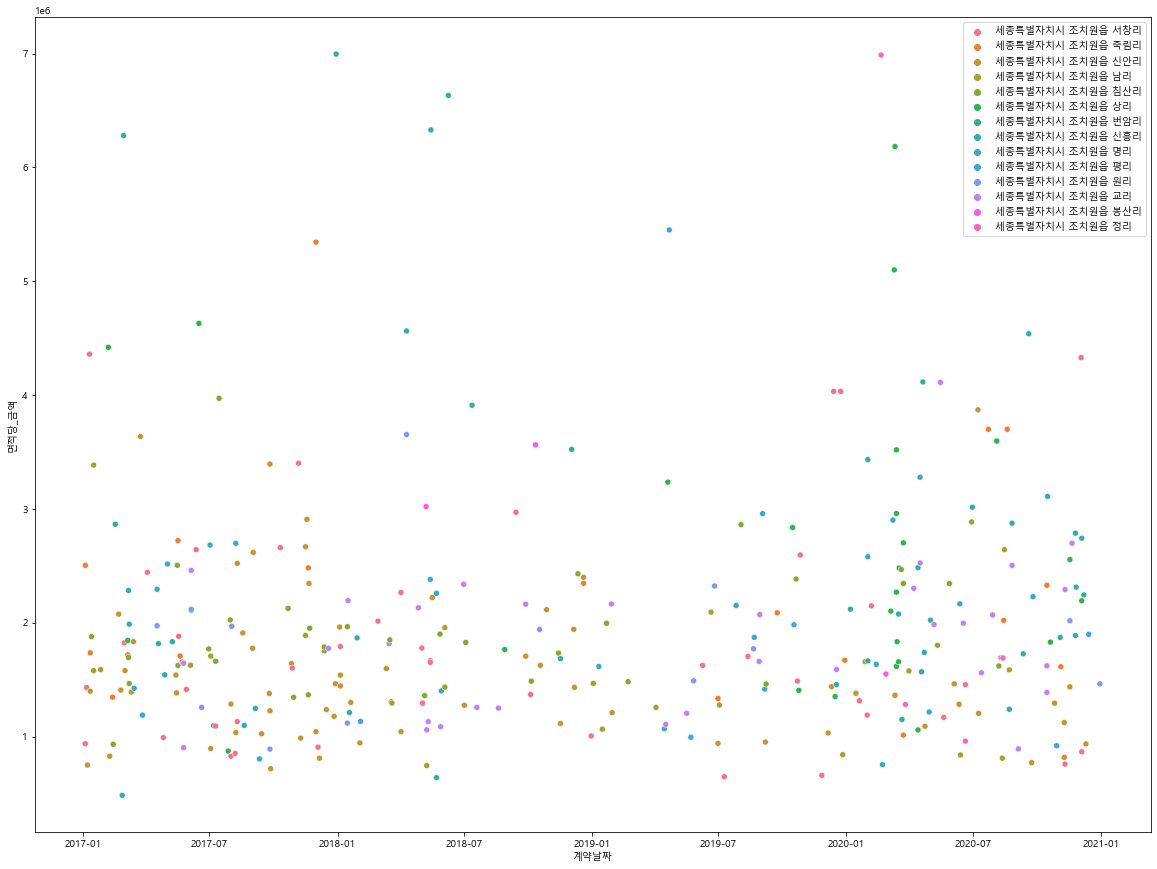

In [133]:
plt.figure(figsize=(20,15))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=단독다가구)

plt.legend(fontsize=10, loc='best')

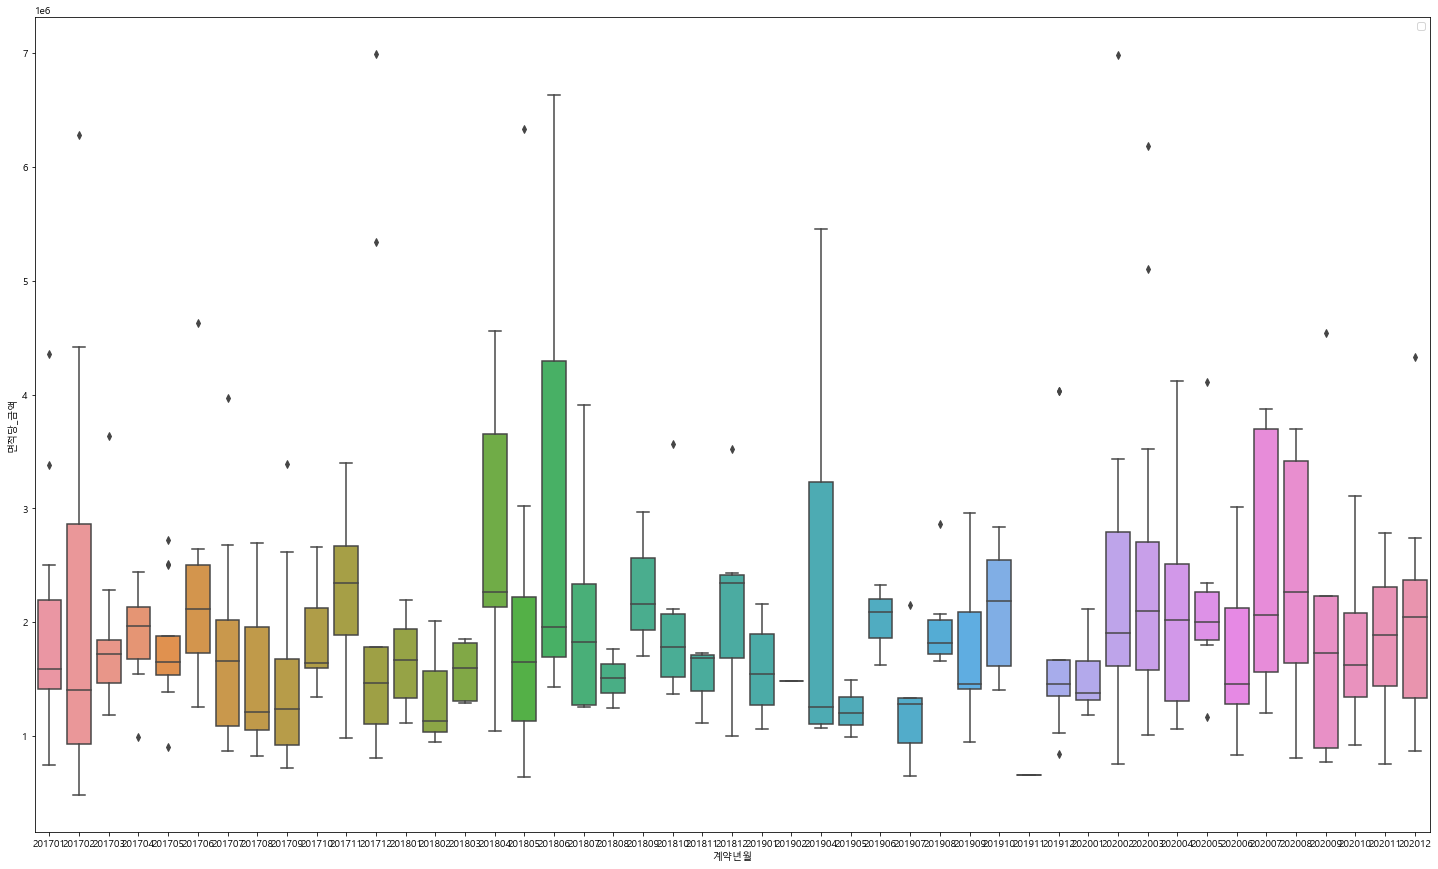

In [134]:
plt.figure(figsize=(25,15))
ax = sns.boxplot(x="계약년월", y="면적당_금액",
                data=단독다가구)
plt.legend(fontsize=10, loc='best')

## 오피스텔 매매

In [140]:
오피스텔=pd.read_csv('6.세종시_오피스텔(매매)_실거래가.csv', thousands=",")
오피스텔

계약년월  계약일          시군구   본번  부번       단지명  전용면적(㎡)  거래금액(만원)   층  건축년도  \
0    201701    4  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000  14  2014   
1    201701    6  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500  11  2014   
2    201702    5  세종특별자치시 나성동  713   0    세진이너스빌    34.15     13000   8  2013   
3    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500   4  2014   
4    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000   4  2014   
..      ...  ...          ...  ...  ..       ...      ...       ...  ..   ...   
340  202012   20  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     16410   6  2020   
341  202012   21  세종특별자치시 어진동    0   0    푸르지오시티    24.22      8600  18  2014   
342  202012   23  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     15340   7  2020   
343  202012   23  세종특별자치시 어진동    0   0  2차푸르지오시티    30.48     11500   9  2014   
344  202012   24  세종특별자치시 어진동    0   0    푸르지오시티    44.84     15600  18  2014   

        해제사유발생일  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
..          ...  
340         NaN  
341         NaN  
342  20210118.0  
343         NaN  
344         NaN  

[345 rows x 11 columns]

In [141]:
오피스텔['읍면동']=오피스텔['시군구'].str.split(" ").str[1]
오피스텔

계약년월  계약일          시군구   본번  부번       단지명  전용면적(㎡)  거래금액(만원)   층  건축년도  \
0    201701    4  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000  14  2014   
1    201701    6  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500  11  2014   
2    201702    5  세종특별자치시 나성동  713   0    세진이너스빌    34.15     13000   8  2013   
3    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500   4  2014   
4    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000   4  2014   
..      ...  ...          ...  ...  ..       ...      ...       ...  ..   ...   
340  202012   20  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     16410   6  2020   
341  202012   21  세종특별자치시 어진동    0   0    푸르지오시티    24.22      8600  18  2014   
342  202012   23  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     15340   7  2020   
343  202012   23  세종특별자치시 어진동    0   0  2차푸르지오시티    30.48     11500   9  2014   
344  202012   24  세종특별자치시 어진동    0   0    푸르지오시티    44.84     15600  18  2014   

        해제사유발생일  읍면동  
0           NaN  어진동  
1           NaN  어진동  
2           NaN  나성동  
3           NaN  어진동  
4           NaN  어진동  
..          ...  ...  
340         NaN  나성동  
341         NaN  어진동  
342  20210118.0  나성동  
343         NaN  어진동  
344         NaN  어진동  

[345 rows x 12 columns]

In [142]:
오피스텔['면적당_금액']=pd.to_numeric((오피스텔['거래금액(만원)'])/pd.to_numeric(오피스텔['전용면적(㎡)'])*10000).round()
오피스텔

계약년월  계약일          시군구   본번  부번       단지명  전용면적(㎡)  거래금액(만원)   층  건축년도  \
0    201701    4  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000  14  2014   
1    201701    6  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500  11  2014   
2    201702    5  세종특별자치시 나성동  713   0    세진이너스빌    34.15     13000   8  2013   
3    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500   4  2014   
4    201702    7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000   4  2014   
..      ...  ...          ...  ...  ..       ...      ...       ...  ..   ...   
340  202012   20  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     16410   6  2020   
341  202012   21  세종특별자치시 어진동    0   0    푸르지오시티    24.22      8600  18  2014   
342  202012   23  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     15340   7  2020   
343  202012   23  세종특별자치시 어진동    0   0  2차푸르지오시티    30.48     11500   9  2014   
344  202012   24  세종특별자치시 어진동    0   0    푸르지오시티    44.84     15600  18  2014   

        해제사유발생일  읍면동     면적당_금액  
0           NaN  어진동  3791070.0  
1           NaN  어진동  4001685.0  
2           NaN  나성동  3806735.0  
3           NaN  어진동  4001685.0  
4           NaN  어진동  3791070.0  
..          ...  ...        ...  
340         NaN  나성동  6268144.0  
341         NaN  어진동  3550784.0  
342  20210118.0  나성동  5859435.0  
343         NaN  어진동  3772966.0  
344         NaN  어진동  3479037.0  

[345 rows x 13 columns]

In [144]:
# 날짜형식으로 데이터 변환

오피스텔['계약날짜']=오피스텔['계약일']

for i in range(0,345):
    
    if int(오피스텔["계약일"][i]) <10 :
        오피스텔[['계약년월','계약일']]=오피스텔[['계약년월','계약일']].astype(str)
        오피스텔["계약날짜"][i] = 오피스텔["계약년월"][i] + "0" +오피스텔["계약일"][i]
    else:
        오피스텔[['계약년월','계약일']]=오피스텔[['계약년월','계약일']].astype(str)
        오피스텔["계약날짜"][i] = 오피스텔["계약년월"][i] +오피스텔["계약일"][i]


오피스텔

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



계약년월 계약일          시군구   본번  부번       단지명  전용면적(㎡)  거래금액(만원)   층  건축년도  \
0    201701   4  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000  14  2014   
1    201701   6  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500  11  2014   
2    201702   5  세종특별자치시 나성동  713   0    세진이너스빌    34.15     13000   8  2013   
3    201702   7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500   4  2014   
4    201702   7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000   4  2014   
..      ...  ..          ...  ...  ..       ...      ...       ...  ..   ...   
340  202012  20  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     16410   6  2020   
341  202012  21  세종특별자치시 어진동    0   0    푸르지오시티    24.22      8600  18  2014   
342  202012  23  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     15340   7  2020   
343  202012  23  세종특별자치시 어진동    0   0  2차푸르지오시티    30.48     11500   9  2014   
344  202012  24  세종특별자치시 어진동    0   0    푸르지오시티    44.84     15600  18  2014   

        해제사유발생일  읍면동     면적당_금액      계약날짜  
0           NaN  어진동  3791070.0  20170104  
1           NaN  어진동  4001685.0  20170106  
2           NaN  나성동  3806735.0  20170205  
3           NaN  어진동  4001685.0  20170207  
4           NaN  어진동  3791070.0  20170207  
..          ...  ...        ...       ...  
340         NaN  나성동  6268144.0  20201220  
341         NaN  어진동  3550784.0  20201221  
342  20210118.0  나성동  5859435.0  20201223  
343         NaN  어진동  3772966.0  20201223  
344         NaN  어진동  3479037.0  20201224  

[345 rows x 14 columns]

In [145]:
오피스텔['계약날짜']=오피스텔['계약날짜'].astype('str')
오피스텔['계약날짜']=pd.to_datetime(오피스텔['계약날짜'])
오피스텔

계약년월 계약일          시군구   본번  부번       단지명  전용면적(㎡)  거래금액(만원)   층  건축년도  \
0    201701   4  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000  14  2014   
1    201701   6  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500  11  2014   
2    201702   5  세종특별자치시 나성동  713   0    세진이너스빌    34.15     13000   8  2013   
3    201702   7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9500   4  2014   
4    201702   7  세종특별자치시 어진동    0   0    푸르지오시티    23.74      9000   4  2014   
..      ...  ..          ...  ...  ..       ...      ...       ...  ..   ...   
340  202012  20  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     16410   6  2020   
341  202012  21  세종특별자치시 어진동    0   0    푸르지오시티    24.22      8600  18  2014   
342  202012  23  세종특별자치시 나성동  756   0  리치먼드시티세종    26.18     15340   7  2020   
343  202012  23  세종특별자치시 어진동    0   0  2차푸르지오시티    30.48     11500   9  2014   
344  202012  24  세종특별자치시 어진동    0   0    푸르지오시티    44.84     15600  18  2014   

        해제사유발생일  읍면동     면적당_금액       계약날짜  
0           NaN  어진동  3791070.0 2017-01-04  
1           NaN  어진동  4001685.0 2017-01-06  
2           NaN  나성동  3806735.0 2017-02-05  
3           NaN  어진동  4001685.0 2017-02-07  
4           NaN  어진동  3791070.0 2017-02-07  
..          ...  ...        ...        ...  
340         NaN  나성동  6268144.0 2020-12-20  
341         NaN  어진동  3550784.0 2020-12-21  
342  20210118.0  나성동  5859435.0 2020-12-23  
343         NaN  어진동  3772966.0 2020-12-23  
344         NaN  어진동  3479037.0 2020-12-24  

[345 rows x 14 columns]

In [148]:
오피스텔=오피스텔[오피스텔['읍면동']=='조치원읍']
오피스텔

계약년월 계약일              시군구  본번  부번            단지명  전용면적(㎡)  거래금액(만원)  층  \
25   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    22.09      5200  6   
26   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    21.22      4500  6   
27   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    26.75      5500  6   
28   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    59.20      9200  7   
113  201909   4  세종특별자치시 조치원읍 명리  23   3  주건축물제1동(23-3)    68.21     12100  7   

     건축년도  해제사유발생일   읍면동     면적당_금액       계약날짜  
25   2013      NaN  조치원읍  2354006.0 2017-07-10  
26   2013      NaN  조치원읍  2120641.0 2017-07-10  
27   2013      NaN  조치원읍  2056075.0 2017-07-10  
28   2013      NaN  조치원읍  1554054.0 2017-07-10  
113  2013      NaN  조치원읍  1773933.0 2019-09-04

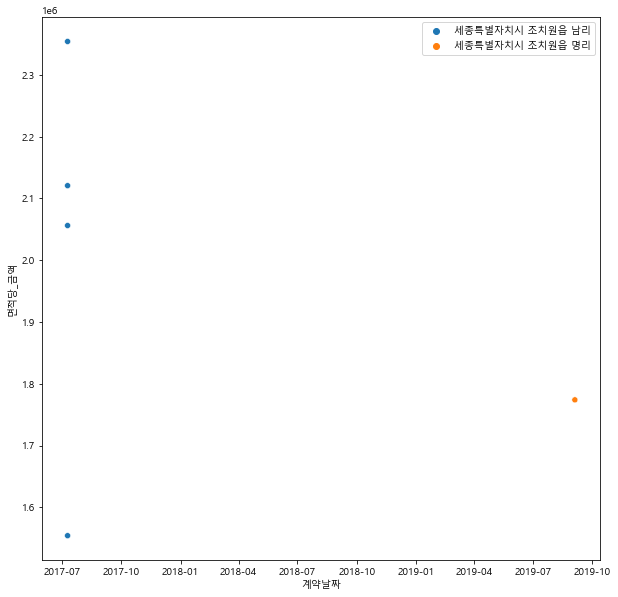

In [150]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=오피스텔)

plt.legend(fontsize=10, loc='best')

## 상업업무용 매매

In [153]:
상업업무용=pd.read_csv('11.세종시_상업업무용(매매)_실거래가.csv', thousands=",")
상업업무용

시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
0     세종특별자치시 고운동  집합   마음로     근린상업  제1종근린생활  25m미만     108.98           
1     세종특별자치시 고운동  집합  고운서길     근린상업  제2종근린생활  25m미만      67.90           
2     세종특별자치시 고운동  집합  마음안로  제2종일반주거  제2종근린생활  25m미만      32.18           
3     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      69.75           
4     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      72.75           
...           ...  ..   ...      ...      ...    ...        ...     ...   
1200  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     132.60           
1201  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     198.56           
1202  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      44.69           
1203  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      40.97           
1204  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만      61.87           

      거래금액(만원)    층    계약년월  계약일 지분구분    건축년도  해제사유발생일  
0        49000  2.0  201801    6       2015.0      NaN  
1        16900  7.0  201801   18       2015.0      NaN  
2        40000  1.0  201801   20       2015.0      NaN  
3        27963  3.0  201802    7       2015.0      NaN  
4        29165  3.0  201802   23       2015.0      NaN  
...        ...  ...     ...  ...  ...     ...      ...  
1200     52830  2.0  201701   22       2013.0      NaN  
1201     74500  2.0  201702   24       2013.0      NaN  
1202     15000  2.0  201708   28       2012.0      NaN  
1203     20000  1.0  201709   29       2012.0      NaN  
1204     31800  1.0  201711   22       2011.0      NaN  

[1205 rows x 15 columns]

In [154]:
상업업무용['읍면동']=상업업무용['시군구'].str.split(" ").str[1]
상업업무용

시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
0     세종특별자치시 고운동  집합   마음로     근린상업  제1종근린생활  25m미만     108.98           
1     세종특별자치시 고운동  집합  고운서길     근린상업  제2종근린생활  25m미만      67.90           
2     세종특별자치시 고운동  집합  마음안로  제2종일반주거  제2종근린생활  25m미만      32.18           
3     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      69.75           
4     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      72.75           
...           ...  ..   ...      ...      ...    ...        ...     ...   
1200  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     132.60           
1201  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     198.56           
1202  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      44.69           
1203  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      40.97           
1204  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만      61.87           

      거래금액(만원)    층    계약년월  계약일 지분구분    건축년도  해제사유발생일  읍면동  
0        49000  2.0  201801    6       2015.0      NaN  고운동  
1        16900  7.0  201801   18       2015.0      NaN  고운동  
2        40000  1.0  201801   20       2015.0      NaN  고운동  
3        27963  3.0  201802    7       2015.0      NaN  고운동  
4        29165  3.0  201802   23       2015.0      NaN  고운동  
...        ...  ...     ...  ...  ...     ...      ...  ...  
1200     52830  2.0  201701   22       2013.0      NaN  한솔동  
1201     74500  2.0  201702   24       2013.0      NaN  한솔동  
1202     15000  2.0  201708   28       2012.0      NaN  한솔동  
1203     20000  1.0  201709   29       2012.0      NaN  한솔동  
1204     31800  1.0  201711   22       2011.0      NaN  한솔동  

[1205 rows x 16 columns]

In [155]:
상업업무용['면적당_금액']=pd.to_numeric((상업업무용['거래금액(만원)'])/pd.to_numeric(상업업무용['전용/연면적(㎡)'])*10000).round()
상업업무용

시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
0     세종특별자치시 고운동  집합   마음로     근린상업  제1종근린생활  25m미만     108.98           
1     세종특별자치시 고운동  집합  고운서길     근린상업  제2종근린생활  25m미만      67.90           
2     세종특별자치시 고운동  집합  마음안로  제2종일반주거  제2종근린생활  25m미만      32.18           
3     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      69.75           
4     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      72.75           
...           ...  ..   ...      ...      ...    ...        ...     ...   
1200  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     132.60           
1201  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     198.56           
1202  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      44.69           
1203  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      40.97           
1204  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만      61.87           

      거래금액(만원)    층    계약년월  계약일 지분구분    건축년도  해제사유발생일  읍면동      면적당_금액  
0        49000  2.0  201801    6       2015.0      NaN  고운동   4496238.0  
1        16900  7.0  201801   18       2015.0      NaN  고운동   2488954.0  
2        40000  1.0  201801   20       2015.0      NaN  고운동  12430081.0  
3        27963  3.0  201802    7       2015.0      NaN  고운동   4009032.0  
4        29165  3.0  201802   23       2015.0      NaN  고운동   4008935.0  
...        ...  ...     ...  ...  ...     ...      ...  ...         ...  
1200     52830  2.0  201701   22       2013.0      NaN  한솔동   3984163.0  
1201     74500  2.0  201702   24       2013.0      NaN  한솔동   3752015.0  
1202     15000  2.0  201708   28       2012.0      NaN  한솔동   3356456.0  
1203     20000  1.0  201709   29       2012.0      NaN  한솔동   4881621.0  
1204     31800  1.0  201711   22       2011.0      NaN  한솔동   5139809.0  

[1205 rows x 17 columns]

In [158]:
# 날짜형식으로 데이터 변환

상업업무용['계약날짜']=상업업무용['계약일']

for i in range(0,1205):
    
    if int(상업업무용["계약일"][i]) <10 :
        상업업무용[['계약년월','계약일']]=상업업무용[['계약년월','계약일']].astype(str)
        상업업무용["계약날짜"][i] = 상업업무용["계약년월"][i] + "0" +상업업무용["계약일"][i]
    else:
        상업업무용[['계약년월','계약일']]=상업업무용[['계약년월','계약일']].astype(str)
        상업업무용["계약날짜"][i] = 상업업무용["계약년월"][i] +상업업무용["계약일"][i]


상업업무용

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/app-root/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
0     세종특별자치시 고운동  집합   마음로     근린상업  제1종근린생활  25m미만     108.98           
1     세종특별자치시 고운동  집합  고운서길     근린상업  제2종근린생활  25m미만      67.90           
2     세종특별자치시 고운동  집합  마음안로  제2종일반주거  제2종근린생활  25m미만      32.18           
3     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      69.75           
4     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      72.75           
...           ...  ..   ...      ...      ...    ...        ...     ...   
1200  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     132.60           
1201  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     198.56           
1202  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      44.69           
1203  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      40.97           
1204  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만      61.87           

      거래금액(만원)    층    계약년월 계약일 지분구분    건축년도  해제사유발생일  읍면동      면적당_금액  \
0        49000  2.0  201801   6       2015.0      NaN  고운동   4496238.0   
1        16900  7.0  201801  18       2015.0      NaN  고운동   2488954.0   
2        40000  1.0  201801  20       2015.0      NaN  고운동  12430081.0   
3        27963  3.0  201802   7       2015.0      NaN  고운동   4009032.0   
4        29165  3.0  201802  23       2015.0      NaN  고운동   4008935.0   
...        ...  ...     ...  ..  ...     ...      ...  ...         ...   
1200     52830  2.0  201701  22       2013.0      NaN  한솔동   3984163.0   
1201     74500  2.0  201702  24       2013.0      NaN  한솔동   3752015.0   
1202     15000  2.0  201708  28       2012.0      NaN  한솔동   3356456.0   
1203     20000  1.0  201709  29       2012.0      NaN  한솔동   4881621.0   
1204     31800  1.0  201711  22       2011.0      NaN  한솔동   5139809.0   

          계약날짜  
0     20180106  
1     20180118  
2     20180120  
3     20180207  
4     20180223  
...        ...  
1200  20170122  
1201  20170224  
1202  20170828  
1203  20170929  
1204  20171122  

[1205 rows x 18 columns]

In [159]:
상업업무용['계약날짜']=상업업무용['계약날짜'].astype('str')
상업업무용['계약날짜']=pd.to_datetime(상업업무용['계약날짜'])
상업업무용

시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
0     세종특별자치시 고운동  집합   마음로     근린상업  제1종근린생활  25m미만     108.98           
1     세종특별자치시 고운동  집합  고운서길     근린상업  제2종근린생활  25m미만      67.90           
2     세종특별자치시 고운동  집합  마음안로  제2종일반주거  제2종근린생활  25m미만      32.18           
3     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      69.75           
4     세종특별자치시 고운동  집합   마음로     근린상업  제2종근린생활  25m미만      72.75           
...           ...  ..   ...      ...      ...    ...        ...     ...   
1200  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     132.60           
1201  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만     198.56           
1202  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      44.69           
1203  세종특별자치시 한솔동  집합   누리로  제2종일반주거  제2종근린생활  25m이상      40.97           
1204  세종특별자치시 한솔동  집합  노을3로      준주거  제2종근린생활  25m미만      61.87           

      거래금액(만원)    층    계약년월 계약일 지분구분    건축년도  해제사유발생일  읍면동      면적당_금액  \
0        49000  2.0  201801   6       2015.0      NaN  고운동   4496238.0   
1        16900  7.0  201801  18       2015.0      NaN  고운동   2488954.0   
2        40000  1.0  201801  20       2015.0      NaN  고운동  12430081.0   
3        27963  3.0  201802   7       2015.0      NaN  고운동   4009032.0   
4        29165  3.0  201802  23       2015.0      NaN  고운동   4008935.0   
...        ...  ...     ...  ..  ...     ...      ...  ...         ...   
1200     52830  2.0  201701  22       2013.0      NaN  한솔동   3984163.0   
1201     74500  2.0  201702  24       2013.0      NaN  한솔동   3752015.0   
1202     15000  2.0  201708  28       2012.0      NaN  한솔동   3356456.0   
1203     20000  1.0  201709  29       2012.0      NaN  한솔동   4881621.0   
1204     31800  1.0  201711  22       2011.0      NaN  한솔동   5139809.0   

           계약날짜  
0    2018-01-06  
1    2018-01-18  
2    2018-01-20  
3    2018-02-07  
4    2018-02-23  
...         ...  
1200 2017-01-22  
1201 2017-02-24  
1202 2017-08-28  
1203 2017-09-29  
1204 2017-11-22  

[1205 rows x 18 columns]

In [162]:
상업업무용=상업업무용[상업업무용['읍면동']=='조치원읍']
상업업무용

시군구  유형   도로명     용도지역   건축물주용도   도로조건  전용/연면적(㎡) 대지면적(㎡)  \
193    세종특별자치시 조치원읍 교리  일반   문화로  제2종일반주거     교육연구  25m미만     159.37   132.9   
194    세종특별자치시 조치원읍 남리  일반   으뜸길  제2종일반주거  제1종근린생활  12m미만      45.27      89   
195    세종특별자치시 조치원읍 명리  일반  새내8길  제2종일반주거  제1종근린생활  12m미만     681.71     492   
196   세종특별자치시 조치원읍 번암리  집합   군청로  제2종일반주거  제2종근린생활   8m미만      32.10           
197   세종특별자치시 조치원읍 번암리  집합  허만석로  제2종일반주거  제1종근린생활   8m미만     194.64           
...                ...  ..   ...      ...      ...    ...        ...     ...   
1177  세종특별자치시 조치원읍 침산리  집합  행복3길  제2종일반주거  제2종근린생활  12m미만      85.74           
1178  세종특별자치시 조치원읍 침산리  일반   문화길  제2종일반주거  제2종근린생활  12m미만     197.46   334.5   
1179  세종특별자치시 조치원읍 침산리  일반  행복2길  제2종일반주거  제2종근린생활   8m미만     180.00   311.8   
1180  세종특별자치시 조치원읍 침산리  일반  문화7길  제2종일반주거  제2종근린생활  12m미만     594.00   275.8   
1181   세종특별자치시 조치원읍 평리  일반   문화로  제2종일반주거  제1종근린생활  25m미만     127.35   165.3   

      거래금액(만원)    층    계약년월 계약일 지분구분    건축년도  해제사유발생일   읍면동     면적당_금액  \
193      25511  NaN  201802   6          NaN      NaN  조치원읍  1600740.0   
194       7290  NaN  201805  17       1941.0      NaN  조치원읍  1610338.0   
195     131000  NaN  201804  13       2014.0      NaN  조치원읍  1921638.0   
196      14000  1.0  201802  25       1989.0      NaN  조치원읍  4361371.0   
197      71000  3.0  201807   9       2018.0      NaN  조치원읍  3647760.0   
...        ...  ...     ...  ..  ...     ...      ...   ...        ...   
1177     21000  1.0  201706  15       2003.0      NaN  조치원읍  2449265.0   
1178     59000  NaN  201706  19       2013.0      NaN  조치원읍  2987947.0   
1179     54000  NaN  201709  15       2008.0      NaN  조치원읍  3000000.0   
1180    106000  NaN  201710  21       2014.0      NaN  조치원읍  1784512.0   
1181     21000  NaN  201709   8       1983.0      NaN  조치원읍  1648999.0   

           계약날짜  
193  2018-02-06  
194  2018-05-17  
195  2018-04-13  
196  2018-02-25  
197  2018-07-09  
...         ...  
1177 2017-06-15  
1178 2017-06-19  
1179 2017-09-15  
1180 2017-10-21  
1181 2017-09-08  

[184 rows x 18 columns]

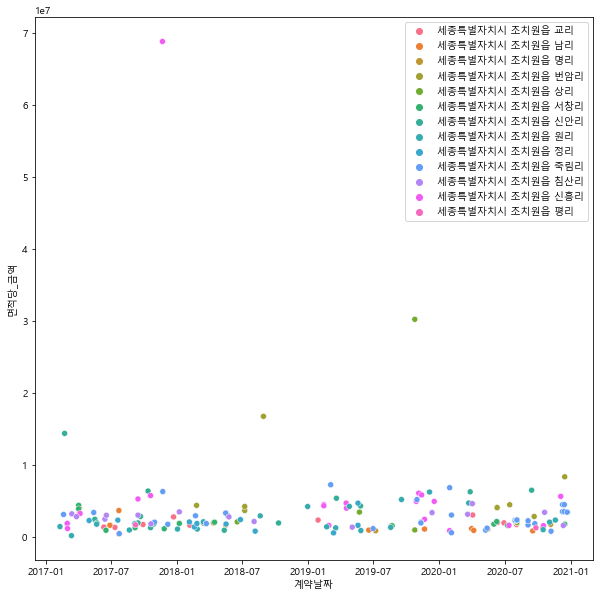

In [163]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="계약날짜", y="면적당_금액",hue="시군구",
                data=상업업무용)

plt.legend(fontsize=10, loc='best')

## 건축년도

### 아파트

In [181]:
조치원읍_아파트

계약년월 계약일               시군구   본번  부번       단지명   전용면적(㎡)  거래금액(만원)  \
7      201701   2  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상   84.7067     19000   
8      201701   2  세종특별자치시 조치원읍 신흥리  398   0  신흥대우푸르지오   84.9228     13000   
9      201701   2  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     22500   
10     201701   2  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이   84.6682     19850   
14     201701   4  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상   99.6514     21400   
...       ...  ..               ...  ...  ..       ...       ...       ...   
23562  202012  29  세종특별자치시 조치원읍 죽림리  389   0  죽림대우푸르지오  104.9044     42700   
23578  202012  30  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     50000   
23591  202012  31  세종특별자치시 조치원읍 신안리  542   0   세종e편한세상  101.6828     34500   
23592  202012  31  세종특별자치시 조치원읍 신흥리  398   0  신흥대우푸르지오  126.6976     50000   
23593  202012  31  세종특별자치시 조치원읍 죽림리  396   0   조치원죽림자이  128.9491     44000   

        층  건축년도  해제사유발생일   읍면동     면적당_금액       계약날짜  
7      11  2013      NaN  조치원읍  2243034.0 2017-01-02  
8       8  2006      NaN  조치원읍  1530802.0 2017-01-02  
9       8  2008      NaN  조치원읍  1744875.0 2017-01-02  
10      4  2008      NaN  조치원읍  2344446.0 2017-01-02  
14      7  2013      NaN  조치원읍  2147486.0 2017-01-04  
...    ..   ...      ...   ...        ...        ...  
23562   9  2007      NaN  조치원읍  4070373.0 2020-12-29  
23578   6  2008      NaN  조치원읍  3877499.0 2020-12-30  
23591   3  2013      NaN  조치원읍  3392904.0 2020-12-31  
23592  10  2006      NaN  조치원읍  3946405.0 2020-12-31  
23593   2  2008      NaN  조치원읍  3412199.0 2020-12-31  

[3889 rows x 14 columns]

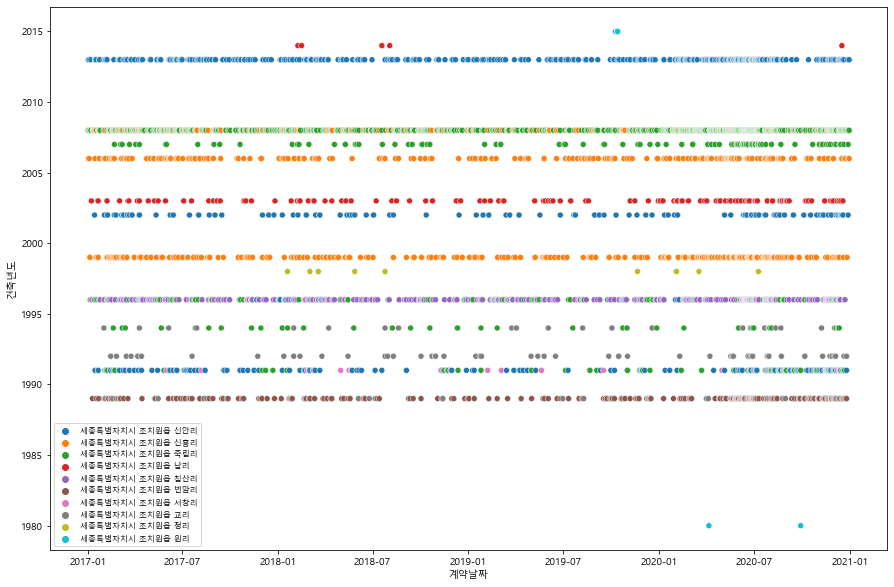

In [186]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="계약날짜", y="건축년도",hue="시군구",
                data=조치원읍_아파트)

plt.legend(fontsize=8, loc='best')

In [191]:
조치원읍_건축년도=조치원읍_아파트.groupby('건축년도')['계약년월'].agg(**{'합계':'count'}).reset_index()
조치원읍_건축년도

건축년도    합계
0   1980     2
1   1989   286
2   1991   254
3   1992    55
4   1994    61
5   1996   578
6   1998    10
7   1999   301
8   2002   127
9   2003   124
10  2006   241
11  2007   104
12  2008  1287
13  2013   437
14  2014     5
15  2015    17

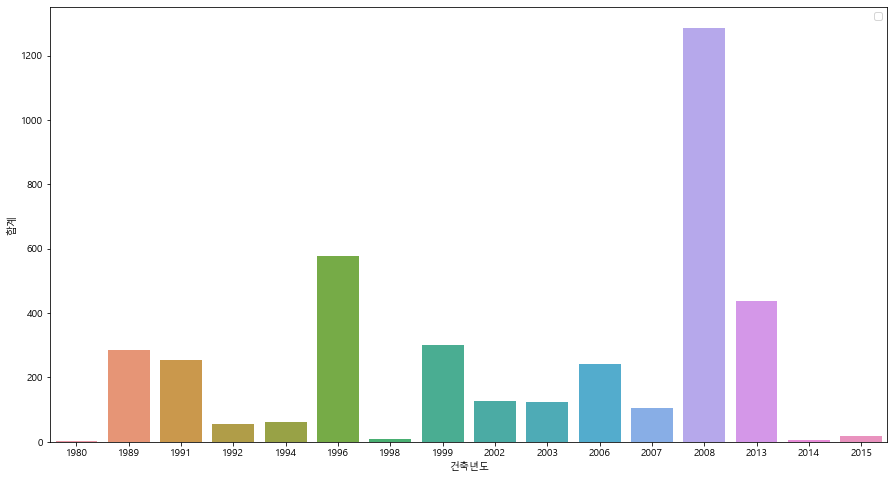

In [196]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="건축년도", y="합계",
                data=조치원읍_건축년도)

plt.legend(fontsize=10, loc='best')

### 연립다세대

In [198]:
연립다세대_매매

계약년월 계약일               시군구   본번  부번      건물명  전용면적(㎡)  대지권면적(㎡)  \
0    201701   3   세종특별자치시 조치원읍 원리  132   7     고려1동    62.08     36.31   
1    201701  13  세종특별자치시 조치원읍 침산리  167   6     용성빌라    64.23     42.25   
3    201701  26  세종특별자치시 조치원읍 서창리  140  11     삼현빌라    48.53     37.30   
4    201702   1  세종특별자치시 조치원읍 신흥리  106   0     주공연립    67.90    133.43   
5    201703  13  세종특별자치시 조치원읍 죽림리    4   9  동진빌라(나)    48.41     30.34   
..      ...  ..               ...  ...  ..      ...      ...       ...   
599  202012  13   세종특별자치시 조치원읍 남리   69  17    남동연립B    38.77     13.49   
604  202012  16  세종특별자치시 조치원읍 서창리  140  11     삼현빌라    48.53     37.30   
605  202012  16  세종특별자치시 조치원읍 신흥리    8   7     강람빌라    48.96     41.00   
606  202012  16  세종특별자치시 조치원읍 신흥리  106   0     주공연립    67.90    133.43   
611  202012  22  세종특별자치시 조치원읍 번암리   74   0     로얄빌라    76.26     86.56   

     거래금액(만원)  층  건축년도     해제사유발생일   읍면동     면적당_금액       계약날짜  
0        4700  2  1983         NaN  조치원읍   757088.0 2017-01-03  
1        6500  2  1991         NaN  조치원읍  1011988.0 2017-01-13  
3        4000  2  1989         NaN  조치원읍   824232.0 2017-01-26  
4       12800  1  1984         NaN  조치원읍  1885125.0 2017-02-01  
5        5000  2  1990         NaN  조치원읍  1032844.0 2017-03-13  
..        ... ..   ...         ...   ...        ...        ...  
599      5500  3  1993         NaN  조치원읍  1418623.0 2020-12-13  
604      6000  2  1989         NaN  조치원읍  1236349.0 2020-12-16  
605      4000  1  1990         NaN  조치원읍   816993.0 2020-12-16  
606     28500  2  1984  20210210.0  조치원읍  4197349.0 2020-12-16  
611      8500  4  1991         NaN  조치원읍  1114608.0 2020-12-22  

[357 rows x 15 columns]

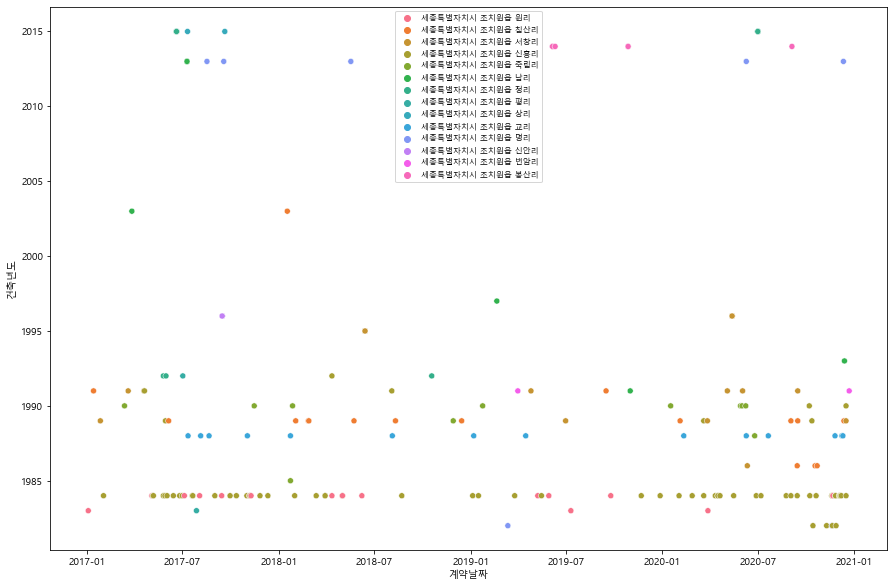

In [199]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="계약날짜", y="건축년도",hue="시군구",
                data=연립다세대_매매)

plt.legend(fontsize=8, loc='best')

In [200]:
조치원읍_건축년도_연립다세대=연립다세대_매매.groupby('건축년도')['계약년월'].agg(**{'합계':'count'}).reset_index()
조치원읍_건축년도_연립다세대

건축년도   합계
0   1982    6
1   1983    4
2   1984   71
3   1985    1
4   1986    4
5   1988   15
6   1989   19
7   1990   10
8   1991   13
9   1992    5
10  1993    1
11  1995   19
12  1996   49
13  1997    1
14  2003    2
15  2013   21
16  2014    6
17  2015  110

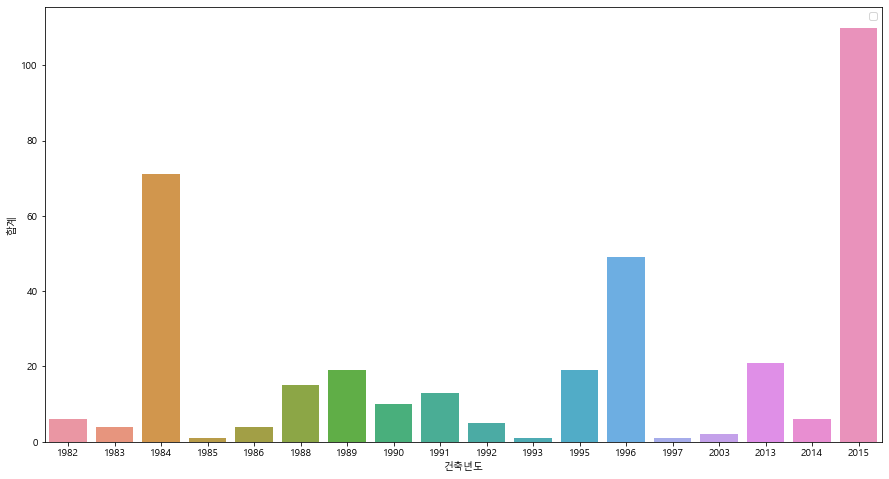

In [201]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="건축년도", y="합계",
                data=조치원읍_건축년도_연립다세대)

plt.legend(fontsize=10, loc='best')

### 단독다가구

In [202]:
단독다가구

계약년월 계약일               시군구 주택유형   도로조건  연면적(㎡)  대지면적(㎡)  거래금액(만원)  \
1     201701   4  세종특별자치시 조치원읍 서창리   단독   8m미만  581.25    415.0     54500   
2     201701   4  세종특별자치시 조치원읍 죽림리   단독   8m미만   63.89    175.0     16000   
4     201701   6  세종특별자치시 조치원읍 서창리  다가구   8m미만  375.36    222.7     53700   
5     201701   7  세종특별자치시 조치원읍 신안리  다가구   8m미만  493.21    322.0     37000   
10    201701  10  세종특별자치시 조치원읍 서창리   단독   8m미만   45.99    164.0     20050   
...      ...  ..               ...  ...    ...     ...      ...       ...   
1116  202012   4  세종특별자치시 조치원읍 서창리   단독  25m미만   93.00    231.0      8060   
1119  202012   7  세종특별자치시 조치원읍 신흥리   단독  12m미만   53.46    113.0     12000   
1123  202012  10  세종특별자치시 조치원읍 신안리  다가구   8m미만  189.12    150.0     17700   
1129  202012  14   세종특별자치시 조치원읍 평리   단독   8m미만   55.32    132.0     10500   
1142  202012  30   세종특별자치시 조치원읍 원리   단독   8m미만  205.05    142.8     30000   

        건축년도  해제사유발생일   읍면동       계약날짜     면적당_금액  
1     1997.0      NaN  조치원읍 2017-01-04   937634.0  
2     1983.0      NaN  조치원읍 2017-01-04  2504304.0  
4     2011.0      NaN  조치원읍 2017-01-06  1430627.0  
5     2004.0      NaN  조치원읍 2017-01-07   750188.0  
10    1987.0      NaN  조치원읍 2017-01-10  4359643.0  
...      ...      ...   ...        ...        ...  
1116  1959.0      NaN  조치원읍 2020-12-04   866667.0  
1119  1974.0      NaN  조치원읍 2020-12-07  2244669.0  
1123  1999.0      NaN  조치원읍 2020-12-10   935914.0  
1129  1975.0      NaN  조치원읍 2020-12-14  1898048.0  
1142  1977.0      NaN  조치원읍 2020-12-30  1463058.0  

[346 rows x 13 columns]

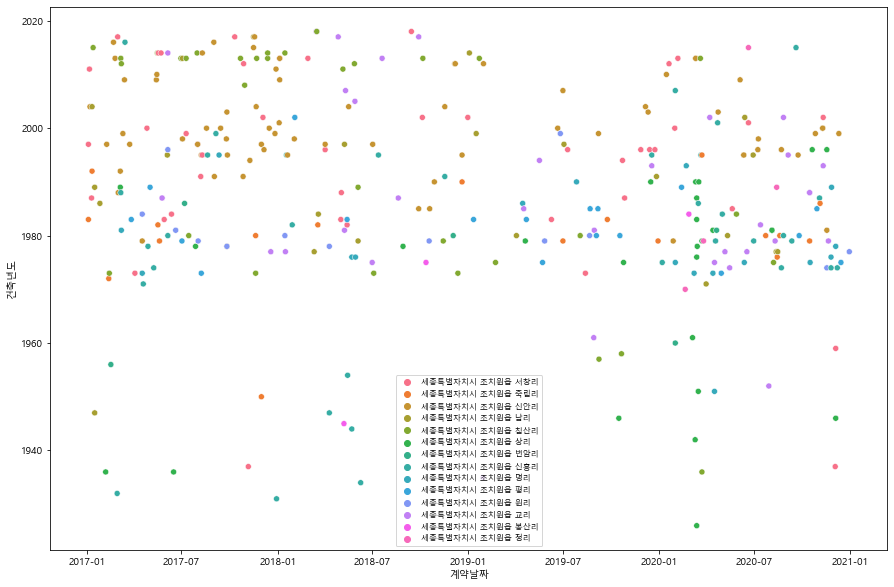

In [203]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(x="계약날짜", y="건축년도",hue="시군구",
                data=단독다가구)

plt.legend(fontsize=8, loc='best')

In [204]:
조치원읍_건축년도_단독다가구=단독다가구.groupby('건축년도')['계약년월'].agg(**{'합계':'count'}).reset_index()
조치원읍_건축년도_단독다가구

건축년도  합계
0   1926.0   1
1   1931.0   1
2   1932.0   1
3   1934.0   1
4   1935.0   1
..     ...  ..
65  2014.0  10
66  2015.0   4
67  2016.0   3
68  2017.0   6
69  2018.0   3

[70 rows x 2 columns]

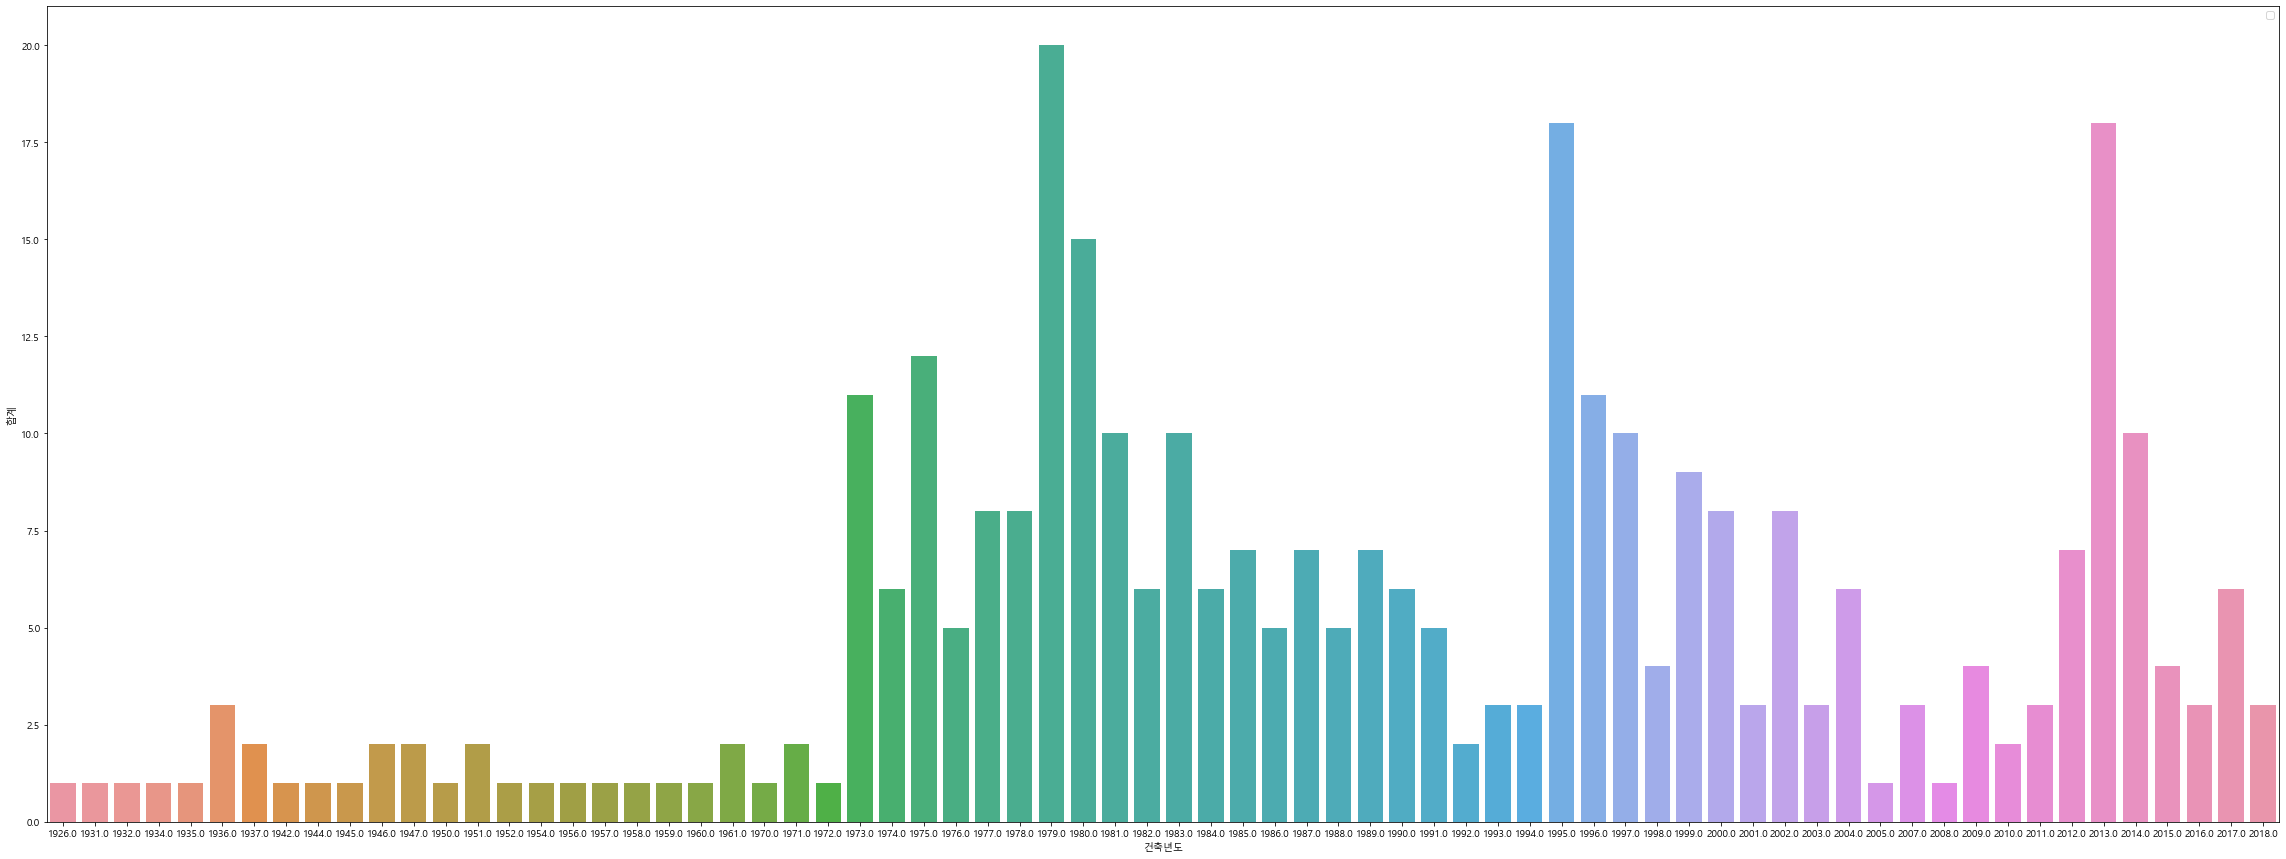

In [208]:
plt.figure(figsize=(40,15))
ax = sns.barplot(x="건축년도", y="합계",
                data=조치원읍_건축년도_단독다가구)

plt.legend(fontsize=10, loc='best')

### 오피스텔

In [209]:
오피스텔

계약년월 계약일              시군구  본번  부번            단지명  전용면적(㎡)  거래금액(만원)  층  \
25   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    22.09      5200  6   
26   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    21.22      4500  6   
27   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    26.75      5500  6   
28   201707  10  세종특별자치시 조치원읍 남리  37   4  주건축물제1동(37-4)    59.20      9200  7   
113  201909   4  세종특별자치시 조치원읍 명리  23   3  주건축물제1동(23-3)    68.21     12100  7   

     건축년도  해제사유발생일   읍면동     면적당_금액 계약날짜  
25   2013      NaN  조치원읍  2354006.0   10  
26   2013      NaN  조치원읍  2120641.0   10  
27   2013      NaN  조치원읍  2056075.0   10  
28   2013      NaN  조치원읍  1554054.0   10  
113  2013      NaN  조치원읍  1773933.0    4

#### 조치원읍의 경우 오피스텔 데이터가 4개밖에 없어 건축년도가 2013년으로 동일함

## 상권정보

In [212]:
상권정보=pd.read_csv("14.세종시_상권정보.csv")
상권정보

상권업종대분류코드  상권업종대분류명 상권업종중분류코드      상권업종중분류명 상권업종소분류코드     상권업종소분류명  \
0             D        소매       D21  철물/난방/건설자재소매    D21A06    철물/건설자재소매   
1             D        소매       D21  철물/난방/건설자재소매    D21A02    보일러/냉난방용품   
2             F     생활서비스       F15          주택수리    F15A03      배관난방보일러   
3             Q        음식       Q04            분식    Q04A01       라면김밥분식   
4             D        소매       D11          유아용품    D11A03       유아용품판매   
...         ...       ...       ...           ...       ...          ...   
10768         D        소매       D23     자동차/자동차용품    D23A04        타이어판매   
10769         L       부동산       L01         부동산중개    L01A01        부동산중개   
10770         Q        음식       Q06            양식    Q06A02       돈가스전문점   
10771         N  관광/여가/오락       N02      무도/유흥/가무    N02A01          노래방   
10772         R     학문/교육       R05     학원-음악미술무용    R05A02  피아노/바이올린/기타   

      표준산업분류코드              표준산업분류명       행정동코드  행정동명  \
0       G47511        철물 및 난방용구 소매업  3611025000  조치원읍   
1       G47511        철물 및 난방용구 소매업  3611037000   전의면   
2       F42201        배관 및 냉·난방 공사업  3611036000   연서면   
3       I56194          분식 및 김밥 전문점  3611034000   금남면   
4       G47599  그외 기타 분류안된 가정용품 소매업  3611025000  조치원읍   
...        ...                  ...         ...   ...   
10768   G45211     자동차 타이어 및 튜브 판매업  3611025000  조치원읍   
10769   L68221         부동산 자문 및 중개업  3611034000   금남면   
10770   I56114             서양식 음식점업  3611055000   고운동   
10771   R91223            노래연습장 운영업  3611056000   보람동   
10772   P85620                예술 학원  3611054000   종촌동   

                                      도로명주소         lon        lat  
0               세종특별자치시 조치원읍 새내로 90-1, (정리)  127.298552  36.599920  
1                세종특별자치시 전의면 왕의물로 40, (동교리)  127.204298  36.682526  
2                세종특별자치시 연서면 당산로 322, (봉암리)  127.280990  36.560523  
3              세종특별자치시 금남면 채나무길 61-3, (국곡리)  127.270561  36.426637  
4         세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)  127.294177  36.602922  
...                                     ...         ...        ...  
10768         세종특별자치시 조치원읍 충현로 48-11, (죽림리)  127.299415  36.593481  
10769          세종특별자치시 금남면 금남구즉로 529, (대박리)  127.333858  36.480396  
10770                 세종특별자치시 만남로 13, (고운동)  127.235897  36.500933  
10771                세종특별자치시 호려울로 51, (보람동)  127.289353  36.477949  
10772  세종특별자치시 도움3로 160, (종촌동, 가재마을센트레빌4단지)  127.243716  36.506156  

[10773 rows x 13 columns]

In [215]:
상권정보=상권정보[상권정보['행정동명']=='조치원읍']
상권정보

상권업종대분류코드 상권업종대분류명 상권업종중분류코드      상권업종중분류명 상권업종소분류코드     상권업종소분류명  \
0             D       소매       D21  철물/난방/건설자재소매    D21A06    철물/건설자재소매   
4             D       소매       D11          유아용품    D11A03       유아용품판매   
5             Q       음식       Q05        닭/오리요리    Q05A08    후라이드/양념치킨   
8             F    생활서비스       F01       이/미용/건강    F01A01        여성미용실   
10            R    학문/교육       R09          학원기타    R09A01       학원(종합)   
...         ...      ...       ...           ...       ...          ...   
10698         Q       음식       Q04            분식    Q04A02    국수/만두/칼국수   
10706         Q       음식       Q01            한식    Q01A04        한정식전문   
10736         F    생활서비스       F02      세탁/가사서비스    F02A05        청소/소독   
10760         Q       음식       Q12        커피점/카페    Q12A01  커피전문점/카페/다방   
10768         D       소매       D23     자동차/자동차용품    D23A04        타이어판매   

      표준산업분류코드              표준산업분류명       행정동코드  행정동명  \
0       G47511        철물 및 난방용구 소매업  3611025000  조치원읍   
4       G47599  그외 기타 분류안된 가정용품 소매업  3611025000  조치원읍   
5       I56193               치킨 전문점  3611025000  조치원읍   
8       S96112                두발미용업  3611025000  조치원읍   
10      P85501             일반 교과 학원  3611025000  조치원읍   
...        ...                  ...         ...   ...   
10698   I56194          분식 및 김밥 전문점  3611025000  조치원읍   
10706   I56111              한식 음식점업  3611025000  조치원읍   
10736      NaN                  NaN  3611025000  조치원읍   
10760   I56220             비알콜 음료점업  3611025000  조치원읍   
10768   G45211     자동차 타이어 및 튜브 판매업  3611025000  조치원읍   

                                   도로명주소         lon        lat  
0            세종특별자치시 조치원읍 새내로 90-1, (정리)  127.298552  36.599920  
4      세종특별자치시 조치원읍 충현로 159, (침산리, 욱일2차)  127.294177  36.602922  
5            세종특별자치시 조치원읍 행복4길 14, (침산리)  127.291404  36.604312  
8           세종특별자치시 조치원읍 조치원로 61-1, (상리)  127.303255  36.602678  
10            세종특별자치시 조치원읍 새내로 133, (교리)  127.297333  36.603752  
...                                  ...         ...        ...  
10698         세종특별자치시 조치원읍 조치원로 26, (원리)  127.299568  36.601314  
10706         세종특별자치시 조치원읍 조치원7길 7, (원리)  127.300390  36.601922  
10736         세종특별자치시 조치원읍 조치원로 47, (상리)  127.301764  36.601957  
10760         세종특별자치시 조치원읍 으뜸길 215, (원리)  127.296329  36.603503  
10768      세종특별자치시 조치원읍 충현로 48-11, (죽림리)  127.299415  36.593481  

[3553 rows x 13 columns]

In [228]:
상권정보_대분류=상권정보.groupby('상권업종대분류명')['행정동명'].agg(**{'합계':'count'}).reset_index()
상권업종_대분류=상권정보_대분류.sort_values(by=['합계'], axis=0,ascending=False)
상권업종_대분류

상권업종대분류명    합계
6        음식  1402
3        소매  1133
2     생활서비스   574
7     학문/교육   203
1       부동산   105
0  관광/여가/오락    97
4        숙박    36
5       스포츠     3

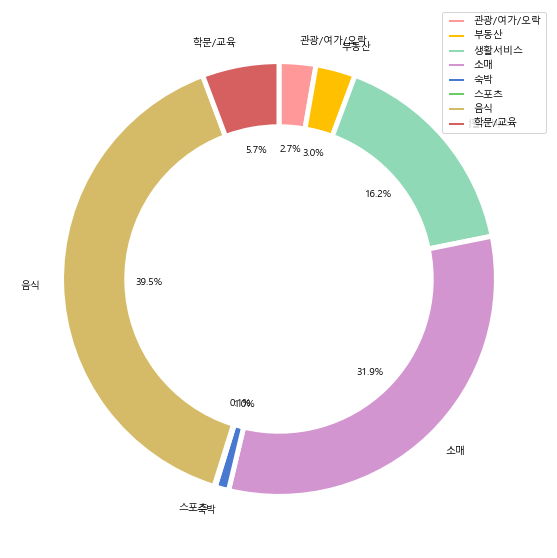

In [236]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','b','g','y','r','grey']
plt.figure(figsize=(10,10))

wedgeprops={'width': 0.30, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(상권정보_대분류['합계'], labels=상권정보_대분류['상권업종대분류명'], autopct='%.1f%%', counterclock=False, wedgeprops=wedgeprops,
        colors=colors, startangle=90)
plt.legend(fontsize=10, loc='best')
plt.show()

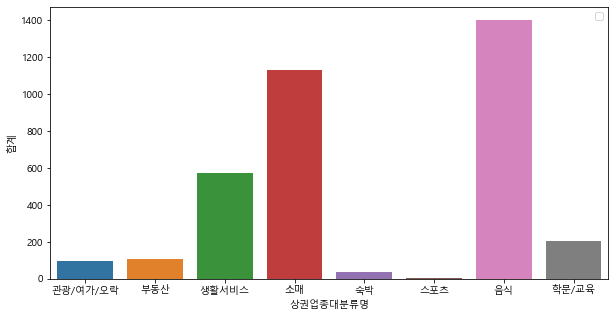

In [243]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="상권업종대분류명", y="합계",
                data=상권정보_대분류)

plt.legend(fontsize=10, loc='best')

## 공시지가

In [245]:
공시지가=pd.read_csv('18.세종시_개별공시지가(2017~2020).csv')
공시지가

id       법정동코드     지번본번부번             법정동명  특수지구분코드 특수지구분명  \
0           123  3611010100  100210003     세종특별자치시  반곡동        1     일반   
1           166  3611010100  100320009     세종특별자치시  반곡동        1     일반   
2           451  3611010100  100500012     세종특별자치시  반곡동        1     일반   
3          2023  3611010100  102340004     세종특별자치시  반곡동        1     일반   
4          2030  3611010100  102340007     세종특별자치시  반곡동        1     일반   
...         ...         ...        ...              ...      ...    ...   
725434  4739413  3611039024  201830004  세종특별자치시 소정면 고등리        2      산   
725435  4739427  3611039024  201830005  세종특별자치시 소정면 고등리        2      산   
725436  4739432  3611039024  201830007  세종특별자치시 소정면 고등리        2      산   
725437  4739463  3611039024  201840001  세종특별자치시 소정면 고등리        2      산   
725438  4739482  3611039024  201840006  세종특별자치시 소정면 고등리        2      산   

           지번  기준년도  기준월   공시지가        공시일자 표준지여부     데이터기준일자  
0        21_3  2017    1  75900  2017-05-31     N  2017-07-20  
1        32_9  2017    1  75900  2017-05-31     N  2017-07-20  
2       50_12  2017    1  75900  2017-05-31     N  2017-07-20  
3       234_4  2017    1  75900  2017-05-31     N  2017-07-20  
4       234_7  2017    1  75900  2017-05-31     N  2017-07-20  
...       ...   ...  ...    ...         ...   ...         ...  
725434  183_4  2020    1  16100  2020-05-29     N  2020-09-26  
725435  183_5  2020    1  24000  2020-05-29     N  2020-09-26  
725436  183_7  2020    1  16100  2020-05-29     N  2020-09-26  
725437  184_1  2020    1  11900  2020-05-29     N  2020-09-26  
725438  184_6  2020    1  24000  2020-05-29     N  2020-09-26  

[725439 rows x 13 columns]

In [246]:
공시지가['읍면동']=공시지가['법정동명'].str.split(" ").str[1]
공시지가

id       법정동코드     지번본번부번             법정동명  특수지구분코드 특수지구분명  \
0           123  3611010100  100210003     세종특별자치시  반곡동        1     일반   
1           166  3611010100  100320009     세종특별자치시  반곡동        1     일반   
2           451  3611010100  100500012     세종특별자치시  반곡동        1     일반   
3          2023  3611010100  102340004     세종특별자치시  반곡동        1     일반   
4          2030  3611010100  102340007     세종특별자치시  반곡동        1     일반   
...         ...         ...        ...              ...      ...    ...   
725434  4739413  3611039024  201830004  세종특별자치시 소정면 고등리        2      산   
725435  4739427  3611039024  201830005  세종특별자치시 소정면 고등리        2      산   
725436  4739432  3611039024  201830007  세종특별자치시 소정면 고등리        2      산   
725437  4739463  3611039024  201840001  세종특별자치시 소정면 고등리        2      산   
725438  4739482  3611039024  201840006  세종특별자치시 소정면 고등리        2      산   

           지번  기준년도  기준월   공시지가        공시일자 표준지여부     데이터기준일자  읍면동  
0        21_3  2017    1  75900  2017-05-31     N  2017-07-20       
1        32_9  2017    1  75900  2017-05-31     N  2017-07-20       
2       50_12  2017    1  75900  2017-05-31     N  2017-07-20       
3       234_4  2017    1  75900  2017-05-31     N  2017-07-20       
4       234_7  2017    1  75900  2017-05-31     N  2017-07-20       
...       ...   ...  ...    ...         ...   ...         ...  ...  
725434  183_4  2020    1  16100  2020-05-29     N  2020-09-26  소정면  
725435  183_5  2020    1  24000  2020-05-29     N  2020-09-26  소정면  
725436  183_7  2020    1  16100  2020-05-29     N  2020-09-26  소정면  
725437  184_1  2020    1  11900  2020-05-29     N  2020-09-26  소정면  
725438  184_6  2020    1  24000  2020-05-29     N  2020-09-26  소정면  

[725439 rows x 14 columns]

In [248]:
공시지가=공시지가[공시지가['읍면동']=='조치원읍']
공시지가

id       법정동코드     지번본번부번              법정동명  특수지구분코드 특수지구분명  \
545887  308610  3611025021  100010001   세종특별자치시 조치원읍 원리        1     일반   
545888  308641  3611025021  100010002   세종특별자치시 조치원읍 원리        1     일반   
545889  308672  3611025021  100010003   세종특별자치시 조치원읍 원리        1     일반   
545890  308704  3611025021  100010005   세종특별자치시 조치원읍 원리        1     일반   
545891  308735  3611025021  100010006   세종특별자치시 조치원읍 원리        1     일반   
...        ...         ...        ...               ...      ...    ...   
561802  670760  3611025034  200120001  세종특별자치시 조치원읍 서창리        2      산   
561803  670797  3611025034  200120005  세종특별자치시 조치원읍 서창리        2      산   
561804  670878  3611025034  200180001  세종특별자치시 조치원읍 서창리        2      산   
561805  670926  3611025034  200180006  세종특별자치시 조치원읍 서창리        2      산   
561806  670985  3611025034  200180010  세종특별자치시 조치원읍 서창리        2      산   

           지번  기준년도  기준월     공시지가        공시일자 표준지여부     데이터기준일자   읍면동  
545887    1_1  2020    1  2169000  2020-05-29     N  2020-09-26  조치원읍  
545888    1_2  2020    1  1760000  2020-05-29     N  2020-09-26  조치원읍  
545889    1_3  2020    1  2067000  2020-05-29     N  2020-09-26  조치원읍  
545890    1_5  2020    1  2067000  2020-05-29     N  2020-09-26  조치원읍  
545891    1_6  2020    1  2067000  2020-05-29     N  2020-09-26  조치원읍  
...       ...   ...  ...      ...         ...   ...         ...   ...  
561802   12_1  2020    1    42600  2020-05-29     N  2020-09-26  조치원읍  
561803   12_5  2020    1    45200  2020-05-29     N  2020-09-26  조치원읍  
561804   18_1  2020    1   124700  2020-05-29     N  2020-09-26  조치원읍  
561805   18_6  2020    1     9400  2020-05-29     N  2020-09-26  조치원읍  
561806  18_10  2020    1    72900  2020-05-29     N  2020-09-26  조치원읍  

[15920 rows x 14 columns]

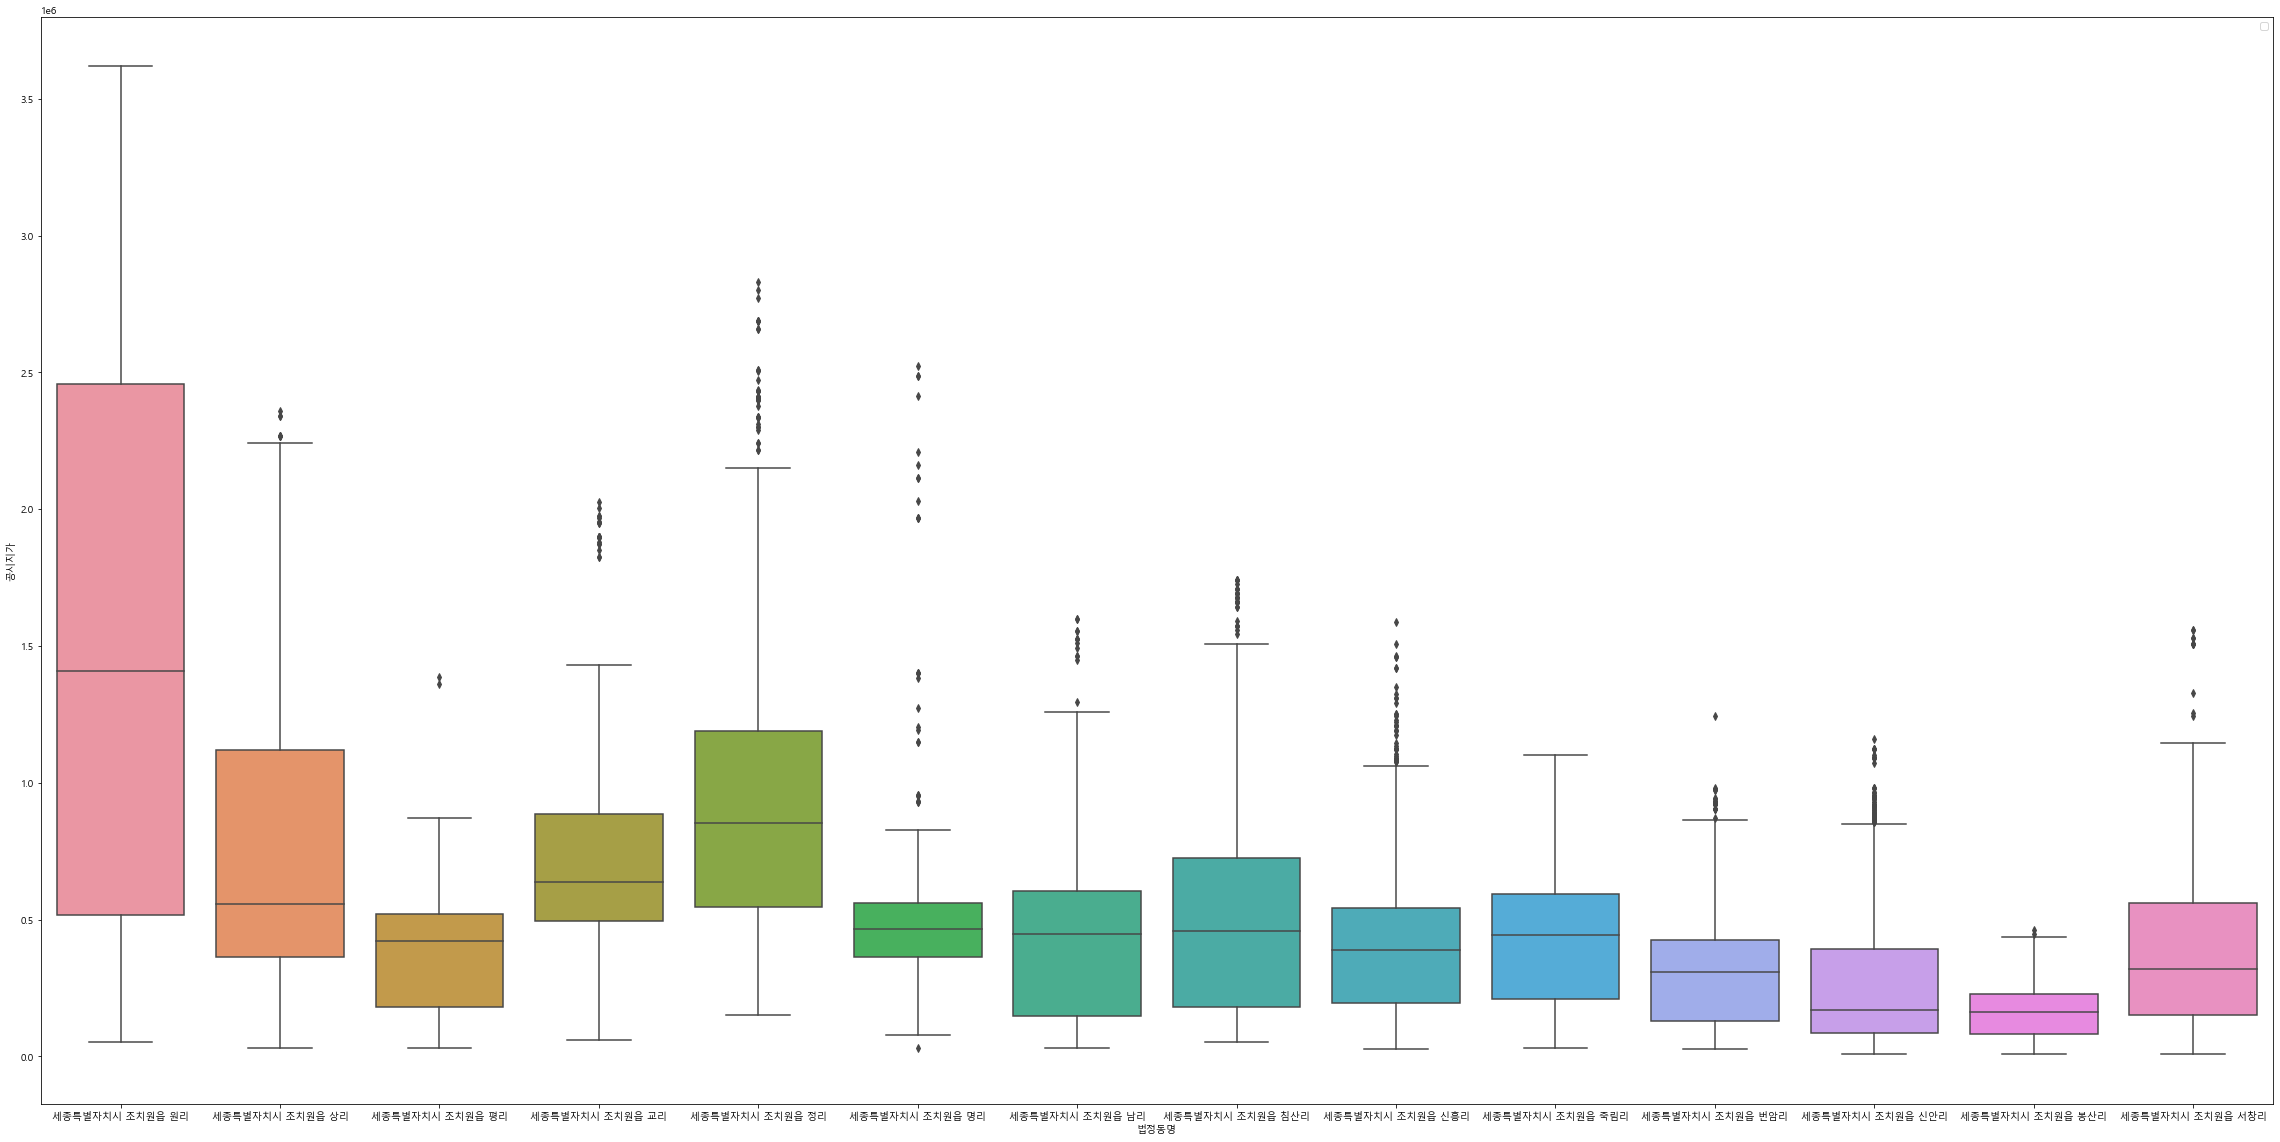

In [256]:
plt.figure(figsize=(40,20))
ax = sns.boxplot(x="법정동명", y="공시지가",
                data=공시지가)

plt.legend(fontsize=10, loc='best')